<a href="https://colab.research.google.com/github/jon-chun/sentiment_cruxes/blob/main/sentimentarcs_cruxes_20211116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SentimentArcs Part 7: Join Norm**

Jon Chun
15 Sep 2021

* https://colab.research.google.com/github/chengjun/mybook/blob/main/11-4-sentiment-classifier.ipynb#scrollTo=c749tKCSZpbw

# **Sandbox Testing**

In [ ]:
!pip install alpha_vantage

In [ ]:
# https://algotrading101.com/learn/python-correlation-guide/

import pandas as pd
from alpha_vantage.timeseries import TimeSeries

In [ ]:
#grab tickers from csv file

# watchlist_df = pd.read_csv('watchlist.csv', header=None)
# watchlist = watchlist_df.iloc[0].tolist()

watchlist = ['AAPL', 'MSFT', 'GLD', 'XOM', 'NFLX']

In [ ]:
%env ALPHAVANTAGE_API_KEY='8BK5HZ2RTSMFHG9U'

In [ ]:
#instantiate TimeSeries class from alpha_vantage library
app = TimeSeries(output_format='pandas')

In [ ]:
#itter through watchlist and retrieve daily price data
stocks_df = pd.DataFrame()
for ticker in watchlist:
    alphav_df = app.get_daily_adjusted(ticker)
    # print(f'alphav header:\n    {type(alphav_df)}')
    alphav_df = alphav_df[0]
    alphav_df.columns = [i.split(' ')[1] for i in alphav_df.columns]

    stocks_df[ticker] = alphav_df['adjusted'].pct_change()

In [ ]:
stocks_df.shape

In [ ]:
stocks_df.iloc[0]['AAPL'] # .isna().all()

In [ ]:
stocks_df[stocks_df.isna().any(axis=1)]

In [ ]:
stocks_df.head()

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.MSFT))

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.NFLX))

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.NFLX, method='spearman'))

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.NFLX, method='kendall'))

In [ ]:
stocks_df.corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(stocks_df.corr())
plt.show()

In [ ]:
ax = sns.heatmap(stocks_df.corr(), cmap='RdYlGn', linewidths=.1)
plt.show()

In [ ]:
nflx_corr_df = stocks_df.corr().NFLX
print(nflx_corr_df.idxmax())

In [ ]:
nflx_corr_df[ nflx_corr_df < 1 ]

In [ ]:
  print(nflx_corr_df[ nflx_corr_df < 1 ].idxmax())

In [ ]:
print(nflx_corr_df.idxmin())

In [ ]:
stocks_df.cov()

In [ ]:
import numpy as np

In [ ]:
print(stocks_df.AAPL.corr(stocks_df.NFLX, method='spearman'))

In [ ]:
print(np.square(stocks_df.AAPL.corr(stocks_df.NFLX, method='spearman')))

# **Install and Load Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

In [2]:
import os
import sys
import io
import glob
import pickle

import re
import string
import copy

In [ ]:
# Skip to Configure Jupyter

In [ ]:
!pip install texthero

In [ ]:
import texthero as hero
from texthero import preprocessing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer, HashingVectorizer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.preprocessing import MinMaxScaler   # To normalize time series
from sklearn.preprocessing import StandardScaler # To Standardize time series: center(sub mean) and rescale within 1 SD (only for well-behaved guassian distributions)
from sklearn.preprocessing import RobustScaler   # To Standardize time series: center(sub median) and rescale within 25%-75% (1st-3rd) IQR (better for noisy, outliers distributions)

minmax_scaler = MinMaxScaler()
mean_std_scaler = StandardScaler()
median_iqr_scaler = RobustScaler()

In [ ]:
from nltk.stem.porter import PorterStemmer

porter=PorterStemmer()

# **Configure Jupyter**

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Configure Jupyter

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from ipywidgets import widgets, interactive

# Configure Google Colab

# %load_ext google.colab.data_table

In [5]:
from IPython.display import Image

In [6]:
# Text wrap

from IPython.display import HTML

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)


In [7]:
# Enlarge matplotlib plot size

plt.rcParams["figure.figsize"] = (20, 40)

# temporarily
# from matplotlib.pyplot import figure
# figure(figsize=(8, 6), dpi=80)

# **Connect to gDrive**

In [8]:
# Connect to Google gDrive

# Flag to indicate first run through code 
flag_first_run = True

from google.colab import drive, files
drive.mount('/gdrive')
%cd /gdrive/MyDrive/

Mounted at /gdrive
/gdrive/MyDrive


In [9]:
%cd ./research/2021/sa_book_code/books_sa/

/gdrive/MyDrive/research/2021/sa_book_code/books_sa


# **Globals**

In [26]:
# List of Corpora

corpora_ls = ['cdickens_achristmascarol',
              'cdickens_greatexpectations',
              'ddefoe_robinsoncrusoe',
              'emforster_howardsend',
              'fbaum_thewonderfulwizardofoz',
              'fdouglass_narrativelifeofaslave',
              'fscottfitzgerald_thegreatgatsby',
              'geliot_middlemarch',
              'hjames_portraitofalady',
              'homer-ewilson_odyssey',
              'imcewan_machineslikeme',
              'jausten_prideandprejudice', # missing RoBERTaXML8lang
              'jconrad_heartofdarkness',
              'jjoyce_portraitoftheartist',
              'jkrowling_1sorcerersstone',  
              'mproust-mtreharne_3guermantesway', # missing all Transformers
              'mshelley_frankenstein',
              'mtwain_huckleberryfinn',
              'staugustine_confessions9end',
              'tmorrison_beloved',
              'vnabokov_palefire',
              'vwoolf_mrsdalloway',
              'vwoolf_orlando',
              'vwoolf_thewaves',
              'vwoolf_tothelighthouse']

In [27]:
# Taxonomy of Models 

groups_ls = ['models_baseline_ls',
                'models_sentimentr_ls',
                'models_syuzhetr_ls',
                'models_transformer_ls']

# Could add suffix '_sst2' if classifiers trained on SST2 (currently requires 30m on Colab Pro/GPU+RAM)
models_supervised_ls = ['linreg_imdb50k',
                   'svc_imdb50k',
                   'logreg_imdb50k',
                   'dforest_imdb50k',
                   'multinb_imdb50k']

models_baseline_ls = ['sentimentr',
                      'syuzhet',
                      'bing',
                      'sentiword',
                      'senticnet',
                      'nrc',
                      'afinn',
                      'vader',
                      'textblob',
                      'flair',
                      'pattern',
                      'stanza']

models_sentimentr_ls = ['jockers_rinker',
                        'jockers',
                        'huliu',
                        'senticnet',
                        'sentiword',
                        'nrc',
                        'lmcd']

models_syuzhetr_ls = ['syuzhet',
                      'bing',
                      'afinn',
                      'nrc']

models_transformer_ls = ['roberta15lg', 
                         'nlptown', 
                         'yelp', 
                         'hinglish',
                         'imdb2way', 
                         'huggingface', 
                         't5imdb50k', 
                         'robertaxml8lang']

models_ml_ls = ['multinb',
             'logreg',
             'logreg_cv',
             'rf',
             'xgb',
             'flaml',
             'autogluon']
             
models_dnn_ls = ['fcn',
              'lstm',
              'cnn']

# Temporarily redefine from English to French Transformer Models
# models_transformer_ls = ['flaubert', 'nlptown', 'robertaxml8lang']

In [28]:
corpora_full_dt = {
    'cdickens_achristmascarol':'A Christmas Carol by Charles Dickens',
    'cdickens_greatexpectations':'Great Expectations by Charles Dickens',
    'ddefoe_robinsoncrusoe':'Robinson Crusoe by Daniel Defoe',
    'emforster_howardsend':'Howards End by E.M.Forster',
    'fbaum_thewonderfulwizardofoz':'The Wonderful Wizard of Oz by Frank Baum',
    'fdouglass_narrativelifeofaslave':'Narrative of the Life of Frederick Douglass, An American Slave',
    'fscottfitzgerald_thegreatgatsby':'The Great Gatsby by F.Scott Fitzgerald',
    'geliot_middlemarch':'Middlemarch by George Eliot',
    'hjames_portraitofalady':'Portrait of a Lady by Henry James',
    'homer-ewilson_odyssey':'The Odyssey by Homer (trans. Emily Wilson)',
    'imcewan_machineslikeme':'Machines Like Me by Ian McEwan',
    'jausten_prideandprejudice':'Pride and Prejudice by Jane Austen',
    'jconrad_heartofdarkness':'Heart of Darkness by Joseph Conrad',
    'jjoyce_portraitoftheartist':'A Portrait of the Artist as a Young Man by James Joyce',
    'jkrowling_1sorcerersstone':'Harry Potter and the Sorcerers Stone by J.K.Rowling',
    'mproust-mtreharne_3guermantesway':'The Guermantes Way by Marcel Proust',
    'mshelley_frankenstein':'Frankenstein by Mary Shelley',
    'mtwain_huckleberryfinn':'Huckleberry Finn by Mark Twain',
    'staugustine_confessions9end':'Confessions (thru Book 9) by St. Augustine',
    'tmorrison_beloved':'Beloved by Toni Morrison',
    'vnabokov_palefire':'Palefire by Vladimir Nabokov',
    'vwoolf_mrsdalloway':'Mrs. Dalloway by Virginia Woolf',
    'vwoolf_orlando':'Orlando by Virginia Woolf',
    'vwoolf_thewaves':'The Waves by Virginia Woolf',
    'vwoolf_tothelighthouse':'To The Lighthouse by Virginia Woolf'}

In [29]:
# Master Dictionary of DataFrames (one per Corpus), each column with raw sentiment polarities from a given model 
#   declare early to minimize accidental clobbering/deletion

corpora_all_dt = {}

# **Custom Functions**

In [ ]:
# https://www.kaggle.com/aditya6040/7-models-on-imdb-dataset-best-score-88-2/notebook

def get_metrics(model,x,y):
    y_pred = model.predict(x)
    acc = accuracy_score(y, y_pred)
    f1=f1_score(y, y_pred)
    cm=confusion_matrix(y, y_pred)
    report=classification_report(y,y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
    plt.xlabel("Predicted",fontsize=16)
    plt.ylabel("Actual",fontsize=16)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))
#     print("\nConfusion Matrix: \n",cm)
    print("\nReport:",report)

# **Read Every Model Sentiment Data**

* https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

In [10]:
import fnmatch

In [11]:
# Get list of files in data subdir

data_dir = './data_corpora_sa'

# filenames_ls = os.listdir(data_dir)

filenames_ls = []

for afilename in os.listdir(data_dir):
  if fnmatch.fnmatch(afilename, 'models_all_*.csv'):
    filenames_ls.append(afilename)

print(filenames_ls)

['models_all_cdickens_achristmascarol.csv', 'models_all_cdickens_greatexpectations.csv', 'models_all_ddefoe_robinsoncrusoe.csv', 'models_all_fbaum_thewonderfulwizardofoz.csv', 'models_all_fdouglass_narrativelifeofaslave.csv', 'models_all_emforster_howardsend.csv', 'models_all_fscottfitzgerald_thegreatgatsby.csv', 'models_all_geliot_middlemarch.csv', 'models_all_hjames_portraitofalady.csv', 'models_all_homer-ewilson_odyssey.csv', 'models_all_imcewan_machineslikeme.csv', 'models_all_jconrad_heartofdarkness.csv', 'models_all_jausten_prideandprejudice.csv', 'models_all_jjoyce_portraitoftheartist.csv', 'models_all_jkrowling_1sorcerersstone.csv', 'models_all_mproust-mtreharne_3guermantesway.csv', 'models_all_mshelley_frankenstein.csv', 'models_all_staugustine_confessions9end.csv', 'models_all_mtwain_huckleberryfinn.csv', 'models_all_tmorrison_beloved.csv', 'models_all_vnabokov_palefire.csv', 'models_all_vwoolf_mrsdalloway.csv', 'models_all_vwoolf_thewaves.csv', 'models_all_vwoolf_orlando.csv

In [12]:
!head -n 3 ./data_corpora_sa/models_all_cdickens_achristmascarol.csv

,sent_no,parag_no,sect_no,sent_raw,sent_clean,char_len,token_len,sentimentr,syuzhet,bing,sentiword,senticnet,nrc,afinn,scores,vader,textblob,pattern,stanza,flair,jockers_rinker,jockers,huliu,lmcd,roberta15lg,yelp,nlptown,huggingface,hinglish,imdb2way,t5imdb50k,robertaxml8lang
0,0,0,0,MARLEY'S GHOST,marley own ghost,14,2,-0.6,-0.6,0.0,-0.125,-0.48700000000000004,0.0,-0.8342981374829667,"{'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.3182}",-0.3182,0.6,0.5412171650386826,2.5028944124489,-0.6499,-0.42426406871192796,-0.42426406871192796,0.0,0.0,-1.962275326251984,0.26237258315086365,4.283848077058792,-0.9485712051391602,0.5611468553543091,0.9922629594802856,1,1.591255784034729
1,1,1,0,MARLEY was dead: to begin with.,marley was dead to begin with,31,6,-1.0,-1.0,-35.819704778381514,-0.25,-0.364,0.0,-1.5858252852960053,"{'neg': 0.462, 'neu': 0.538, 'pos': 0.0, 'compound': -0.6486}",-0.6486,-0.2,-0.11100260795947857,2.643042142160009,-0.9914,-0.40824829046386296,-0.40824829046386296,

## **Read Individual Models [corpora_sa_df]**

In [13]:
%%time

# NOTE: 1m10s

# Read in all models sentiment values in *.csv files located in data_dir
#   into Global Dict (corpora_sa_dt) 
#   with keys=corpora and values=models sentiment values

corpora_sa_dt = {}
model_group_set = set()

def read_csvfiles(folder_path):

  for i,afile in enumerate(filenames_ls):
    print(f'Reading in afile #{i}: {afile}')
    full_path = f'{folder_path}/{afile}'
    print(f'  full_path: {full_path}')
    model_name = '_'.join(afile.split('_')[2:])
    model_name = model_name.split('.')[0]
    print(f'  model_name: {model_name}')
    corpora_sa_dt[model_name] = pd.read_csv(full_path) # .to_dict()
    # model_group = model_name.split('_')[0]
    print(f'  model_group: {model_name}')
    # model_group_set.add(model_group)
    model_group_set.add(model_name)

read_csvfiles(data_dir)

Reading in afile #0: models_all_cdickens_achristmascarol.csv
  full_path: ./data_corpora_sa/models_all_cdickens_achristmascarol.csv
  model_name: cdickens_achristmascarol
  model_group: cdickens_achristmascarol
Reading in afile #1: models_all_cdickens_greatexpectations.csv
  full_path: ./data_corpora_sa/models_all_cdickens_greatexpectations.csv
  model_name: cdickens_greatexpectations
  model_group: cdickens_greatexpectations
Reading in afile #2: models_all_ddefoe_robinsoncrusoe.csv
  full_path: ./data_corpora_sa/models_all_ddefoe_robinsoncrusoe.csv
  model_name: ddefoe_robinsoncrusoe
  model_group: ddefoe_robinsoncrusoe
Reading in afile #3: models_all_fbaum_thewonderfulwizardofoz.csv
  full_path: ./data_corpora_sa/models_all_fbaum_thewonderfulwizardofoz.csv
  model_name: fbaum_thewonderfulwizardofoz
  model_group: fbaum_thewonderfulwizardofoz
Reading in afile #4: models_all_fdouglass_narrativelifeofaslave.csv
  full_path: ./data_corpora_sa/models_all_fdouglass_narrativelifeofaslave.cs

In [14]:
# Show model groups based upon datafile prefix (e.g. 'baseline_' or 'dnn_')

print(f'model_group_set:\n  {model_group_set}')

model_group_set:
  {'fdouglass_narrativelifeofaslave', 'vwoolf_tothelighthouse', 'mshelley_frankenstein', 'mtwain_huckleberryfinn', 'vwoolf_orlando', 'jconrad_heartofdarkness', 'staugustine_confessions9end', 'homer-ewilson_odyssey', 'jjoyce_portraitoftheartist', 'fscottfitzgerald_thegreatgatsby', 'jkrowling_1sorcerersstone', 'cdickens_achristmascarol', 'fbaum_thewonderfulwizardofoz', 'imcewan_machineslikeme', 'cdickens_greatexpectations', 'geliot_middlemarch', 'mproust-mtreharne_3guermantesway', 'vwoolf_thewaves', 'hjames_portraitofalady', 'tmorrison_beloved', 'ddefoe_robinsoncrusoe', 'jausten_prideandprejudice', 'vnabokov_palefire', 'emforster_howardsend', 'vwoolf_mrsdalloway'}


In [15]:
# Verify the number and names of Corpora read

[i for i in corpora_sa_dt.keys()]

print(f'\n\n    Read {len(corpora_sa_dt.keys())} Corpora')

['cdickens_achristmascarol',
 'cdickens_greatexpectations',
 'ddefoe_robinsoncrusoe',
 'fbaum_thewonderfulwizardofoz',
 'fdouglass_narrativelifeofaslave',
 'emforster_howardsend',
 'fscottfitzgerald_thegreatgatsby',
 'geliot_middlemarch',
 'hjames_portraitofalady',
 'homer-ewilson_odyssey',
 'imcewan_machineslikeme',
 'jconrad_heartofdarkness',
 'jausten_prideandprejudice',
 'jjoyce_portraitoftheartist',
 'jkrowling_1sorcerersstone',
 'mproust-mtreharne_3guermantesway',
 'mshelley_frankenstein',
 'staugustine_confessions9end',
 'mtwain_huckleberryfinn',
 'tmorrison_beloved',
 'vnabokov_palefire',
 'vwoolf_mrsdalloway',
 'vwoolf_thewaves',
 'vwoolf_orlando',
 'vwoolf_tothelighthouse']



    Read 25 Corpora


In [16]:
corpora_sa_dt['vwoolf_thewaves'].columns

Index(['Unnamed: 0', 'sent_no', 'parag_no', 'sect_no', 'sent_raw',
       'sent_clean', 'char_len', 'token_len', 'sentimentr', 'syuzhet', 'bing',
       'sentiword', 'senticnet', 'nrc', 'afinn', 'scores', 'vader', 'textblob',
       'pattern', 'stanza', 'flair', 'jockers_rinker', 'jockers', 'huliu',
       'lmcd', 'roberta15lg', 'yelp', 'nlptown', 'huggingface', 'hinglish',
       'imdb2way', 't5imdb50k', 'robertaxml8lang'],
      dtype='object')

In [17]:
corpora_sa_dt['cdickens_achristmascarol'].head(3)
corpora_sa_dt['cdickens_achristmascarol'].info()

Unnamed: 0  sent_no  parag_no  ...  imdb2way t5imdb50k robertaxml8lang
0           0        0         0  ...  0.992263         1        1.591256
1           1        1         1  ... -0.503880        -1       -1.628661
2           2        2         1  ...  0.691824         1        0.560936

[3 rows x 33 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1399 non-null   int64  
 1   sent_no          1399 non-null   int64  
 2   parag_no         1399 non-null   int64  
 3   sect_no          1399 non-null   int64  
 4   sent_raw         1399 non-null   object 
 5   sent_clean       1399 non-null   object 
 6   char_len         1399 non-null   int64  
 7   token_len        1399 non-null   int64  
 8   sentimentr       1399 non-null   float64
 9   syuzhet          1399 non-null   float64
 10  bing             1399 non-null   float64
 11  sentiword        1399 non-null   float64
 12  senticnet        1399 non-null   float64
 13  nrc              1399 non-null   float64
 14  afinn            1399 non-null   float64
 15  scores           1399 non-null   object 
 16  vader            1399 non-null   float64
 17  textblob      

## **Merge all Models together for each Corpus [corpora_all_df]**

In [18]:
filenames_ls[:2]

['models_all_cdickens_achristmascarol.csv',
 'models_all_cdickens_greatexpectations.csv']

In [19]:
# Get common corpus roots 

corpus_root_set = set()

# print(f'\nStarting with {len(filenames_ls)} total corpus x model combinations\n')
for acorpus_model in filenames_ls:
  corpus_model_root = '_'.join(acorpus_model.split('_')[2:])
  corpus_model_root = corpus_model_root.split('.')[0]
  print(f'corpus_model_root: {corpus_model_root}')
  corpus_root_set.add(corpus_model_root)

corpus_root_ls = list(corpus_root_set)
print(f'\nThese {len(filenames_ls)} original (corpus)x(model) combination files\n  were reduced to {len(corpus_root_ls)} unique corpus roots')

corpus_model_root: cdickens_achristmascarol
corpus_model_root: cdickens_greatexpectations
corpus_model_root: ddefoe_robinsoncrusoe
corpus_model_root: fbaum_thewonderfulwizardofoz
corpus_model_root: fdouglass_narrativelifeofaslave
corpus_model_root: emforster_howardsend
corpus_model_root: fscottfitzgerald_thegreatgatsby
corpus_model_root: geliot_middlemarch
corpus_model_root: hjames_portraitofalady
corpus_model_root: homer-ewilson_odyssey
corpus_model_root: imcewan_machineslikeme
corpus_model_root: jconrad_heartofdarkness
corpus_model_root: jausten_prideandprejudice
corpus_model_root: jjoyce_portraitoftheartist
corpus_model_root: jkrowling_1sorcerersstone
corpus_model_root: mproust-mtreharne_3guermantesway
corpus_model_root: mshelley_frankenstein
corpus_model_root: staugustine_confessions9end
corpus_model_root: mtwain_huckleberryfinn
corpus_model_root: tmorrison_beloved
corpus_model_root: vnabokov_palefire
corpus_model_root: vwoolf_mrsdalloway
corpus_model_root: vwoolf_thewaves
corpus_m

In [20]:
corpora_sa_dt.keys()

dict_keys(['cdickens_achristmascarol', 'cdickens_greatexpectations', 'ddefoe_robinsoncrusoe', 'fbaum_thewonderfulwizardofoz', 'fdouglass_narrativelifeofaslave', 'emforster_howardsend', 'fscottfitzgerald_thegreatgatsby', 'geliot_middlemarch', 'hjames_portraitofalady', 'homer-ewilson_odyssey', 'imcewan_machineslikeme', 'jconrad_heartofdarkness', 'jausten_prideandprejudice', 'jjoyce_portraitoftheartist', 'jkrowling_1sorcerersstone', 'mproust-mtreharne_3guermantesway', 'mshelley_frankenstein', 'staugustine_confessions9end', 'mtwain_huckleberryfinn', 'tmorrison_beloved', 'vnabokov_palefire', 'vwoolf_mrsdalloway', 'vwoolf_thewaves', 'vwoolf_orlando', 'vwoolf_tothelighthouse'])

In [21]:
# Verify sample Model features

corpora_sa_dt['fdouglass_narrativelifeofaslave'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1688 non-null   int64  
 1   sent_no          1688 non-null   int64  
 2   parag_no         1688 non-null   int64  
 3   sect_no          1688 non-null   int64  
 4   sent_raw         1688 non-null   object 
 5   sent_clean       1688 non-null   object 
 6   char_len         1688 non-null   int64  
 7   token_len        1688 non-null   int64  
 8   sentimentr       1688 non-null   float64
 9   syuzhet          1688 non-null   float64
 10  bing             1688 non-null   float64
 11  sentiword        1688 non-null   float64
 12  senticnet        1688 non-null   float64
 13  nrc              1688 non-null   float64
 14  afinn            1688 non-null   float64
 15  scores           1688 non-null   object 
 16  vader            1688 non-null   float64
 17  textblob      

In [22]:
corpora_sa_dt.keys()

dict_keys(['cdickens_achristmascarol', 'cdickens_greatexpectations', 'ddefoe_robinsoncrusoe', 'fbaum_thewonderfulwizardofoz', 'fdouglass_narrativelifeofaslave', 'emforster_howardsend', 'fscottfitzgerald_thegreatgatsby', 'geliot_middlemarch', 'hjames_portraitofalady', 'homer-ewilson_odyssey', 'imcewan_machineslikeme', 'jconrad_heartofdarkness', 'jausten_prideandprejudice', 'jjoyce_portraitoftheartist', 'jkrowling_1sorcerersstone', 'mproust-mtreharne_3guermantesway', 'mshelley_frankenstein', 'staugustine_confessions9end', 'mtwain_huckleberryfinn', 'tmorrison_beloved', 'vnabokov_palefire', 'vwoolf_mrsdalloway', 'vwoolf_thewaves', 'vwoolf_orlando', 'vwoolf_tothelighthouse'])

In [23]:
corpora_sa_dt['fdouglass_narrativelifeofaslave'].head(2)

Unnamed: 0  sent_no  parag_no  ...  imdb2way t5imdb50k robertaxml8lang
0           0        0         0  ...  0.929901         1        0.750815
1           1        1         0  ...  0.902930        -1        0.542048

[2 rows x 33 columns]

# **Standardize and Smooth**

## **Get Data**

### **Option (a): Read in zScore/SMA 10% DataFrames**

In [30]:
# ERROR: must get median_z

# Read all models with orignal and zscore values

subdir_all = 'data_corpora_all'

corpora_all_dt = {}

cols_drop_ls = ['fcn', 'lstm', 'cnn', 'multinb', 'logreg', 'logreg_cv', 'rf', 'xgb', 'flaml', 'autogluon',
                'sentimentr', 'syuzhet', 'bing', 'sentiword', 'senticnet', 'nrc',
                'afinn', 'vader', 'textblob', 'pattern', 'stanza', 'flair',
                'jockers_rinker', 'jockers', 'huliu', 'lmcd', 'roberta15lg', 'yelp',
                'nlptown', 'huggingface', 'hinglish', 'imdb2way', 't5imdb50k',
                'robertaxml8lang']

for i, acorpus in enumerate(corpora_ls):

  filepath = f'./{subdir_all}/models_all_{acorpus}.csv'

  print(f'Reading {acorpus} from:\n    {filepath}\n')

  corpora_all_dt[acorpus] = pd.read_csv(filepath, index_col=[0])
  corpora_all_dt[acorpus].drop(columns=cols_drop_ls, axis=1, inplace=True)
  # corpus_all_df = corpus_all_df.loc[:, corpus_all_df.columns.str.contains('_z')]
  


Reading cdickens_achristmascarol from:
    ./data_corpora_all/models_all_cdickens_achristmascarol.csv

Reading cdickens_greatexpectations from:
    ./data_corpora_all/models_all_cdickens_greatexpectations.csv

Reading ddefoe_robinsoncrusoe from:
    ./data_corpora_all/models_all_ddefoe_robinsoncrusoe.csv

Reading emforster_howardsend from:
    ./data_corpora_all/models_all_emforster_howardsend.csv

Reading fbaum_thewonderfulwizardofoz from:
    ./data_corpora_all/models_all_fbaum_thewonderfulwizardofoz.csv

Reading fdouglass_narrativelifeofaslave from:
    ./data_corpora_all/models_all_fdouglass_narrativelifeofaslave.csv

Reading fscottfitzgerald_thegreatgatsby from:
    ./data_corpora_all/models_all_fscottfitzgerald_thegreatgatsby.csv

Reading geliot_middlemarch from:
    ./data_corpora_all/models_all_geliot_middlemarch.csv

Reading hjames_portraitofalady from:
    ./data_corpora_all/models_all_hjames_portraitofalady.csv

Reading homer-ewilson_odyssey from:
    ./data_corpora_all/mode

In [31]:
# Verify a Model columns for both regular and z-Score values

corpora_all_dt['cdickens_achristmascarol'].shape

print('\n')

corpora_all_dt['cdickens_achristmascarol'].columns

(1399, 40)

Index(['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sent_clean', 'flair_z',
       'jockers_rinker_z', 'sentimentr_z', 'nlptown_z', 'hinglish_z',
       'multinb_z', 'pattern_z', 'autogluon_z', 'yelp_z', 'huggingface_z',
       'robertaxml8lang_z', 'rf_z', 'flaml_z', 'fcn_z', 'cnn_z', 'huliu_z',
       'vader_z', 'logreg_z', 'senticnet_z', 'jockers_z', 'logreg_cv_z',
       'nrc_z', 'lstm_z', 'syuzhet_z', 'xgb_z', 'textblob_z', 'roberta15lg_z',
       'sentiword_z', 'afinn_z', 't5imdb50k_z', 'stanza_z', 'imdb2way_z',
       'bing_z', 'lmcd_z', 'median_z'],
      dtype='object')

In [32]:
corpora_all_dt['cdickens_achristmascarol'].head(2)

sent_no  parag_no  sect_no  ...    bing_z    lmcd_z  median_z
0        0         0        0  ... -0.028418  0.010733 -0.288974
1        1         1        0  ... -1.120313  0.010733 -0.978538

[2 rows x 40 columns]

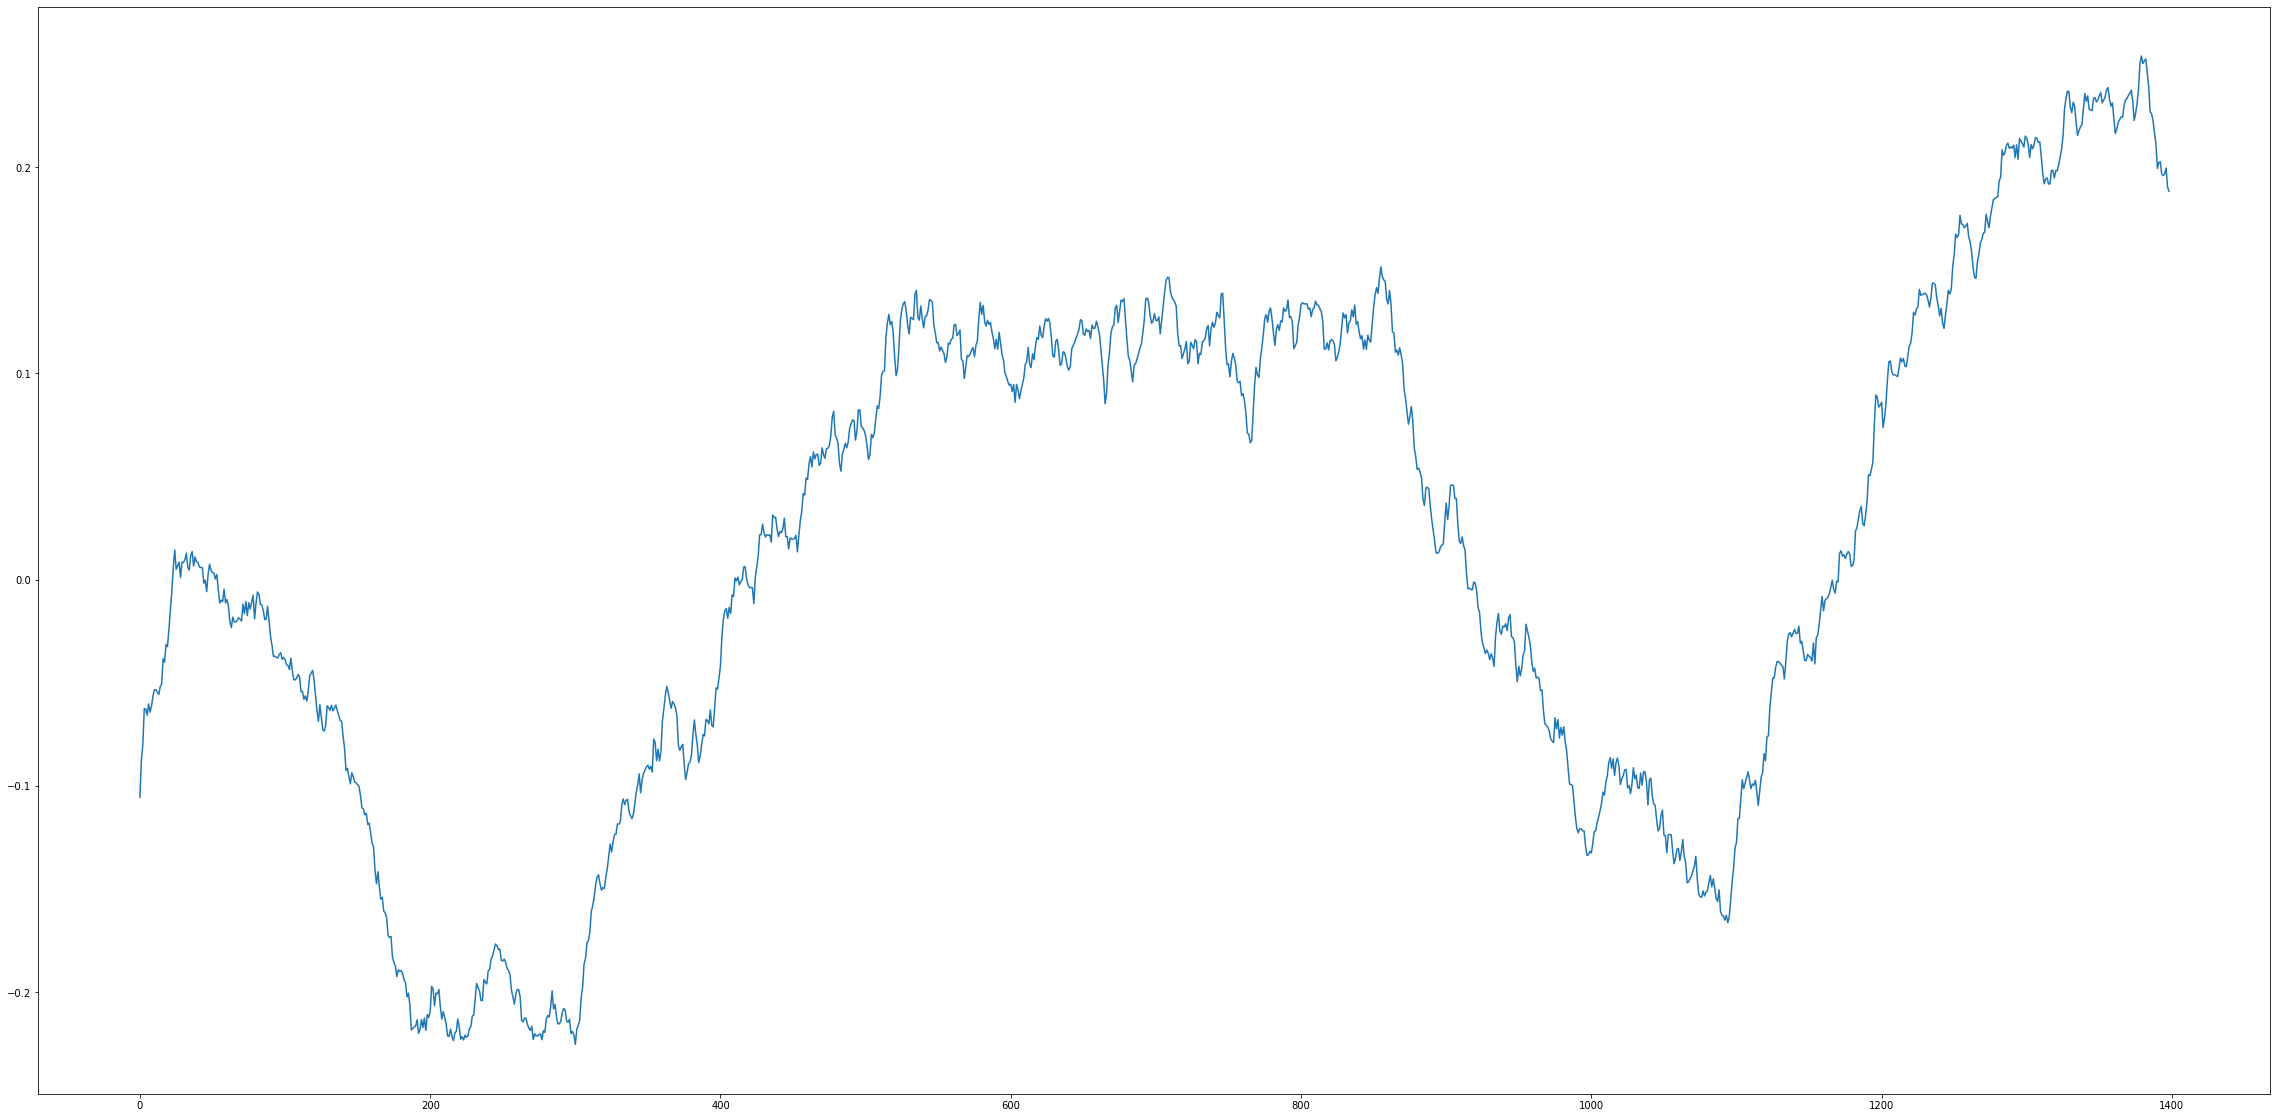

In [33]:
plt.rcParams["figure.figsize"] = (40,20)

win10per = int(0.1*corpora_all_dt['cdickens_achristmascarol'].shape[0])
               
corpora_all_dt['cdickens_achristmascarol']['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot();

### **Execute for both Option (a) and Option (b)**

In [34]:
models_ls = corpora_all_dt.keys()
print(models_ls)
print(f'\nThere are {len(models_ls)} Corpora')

dict_keys(['cdickens_achristmascarol', 'cdickens_greatexpectations', 'ddefoe_robinsoncrusoe', 'emforster_howardsend', 'fbaum_thewonderfulwizardofoz', 'fdouglass_narrativelifeofaslave', 'fscottfitzgerald_thegreatgatsby', 'geliot_middlemarch', 'hjames_portraitofalady', 'homer-ewilson_odyssey', 'imcewan_machineslikeme', 'jausten_prideandprejudice', 'jconrad_heartofdarkness', 'jjoyce_portraitoftheartist', 'jkrowling_1sorcerersstone', 'mproust-mtreharne_3guermantesway', 'mshelley_frankenstein', 'mtwain_huckleberryfinn', 'staugustine_confessions9end', 'tmorrison_beloved', 'vnabokov_palefire', 'vwoolf_mrsdalloway', 'vwoolf_orlando', 'vwoolf_thewaves', 'vwoolf_tothelighthouse'])

There are 25 Corpora


In [35]:
model_all_cols_ls = corpora_all_dt['cdickens_achristmascarol'].columns
print(model_all_cols_ls)

print(f'\nEach Corpus has {len(model_all_cols_ls)} Columns')

model_noncols_ls = ['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sent_clean']
print(f'\n  {len(model_noncols_ls)} Columns are meta-information (not Models)\n  {model_noncols_ls}')


model_cols_ls = list(set(model_all_cols_ls) - set(model_noncols_ls))
print(f'\n  {len(model_cols_ls)} Columns are these Models:\n  {[i for i in model_cols_ls]}')

# Get list of zScore Model Columns in Corpus DataFrame
model_z_cols_ls = [i for i in model_cols_ls if i.endswith('_z')]
print(f'\n  {len(model_z_cols_ls)} zScore Columns are these Models:\n  {[i for i in model_z_cols_ls]}')


Index(['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sent_clean', 'flair_z',
       'jockers_rinker_z', 'sentimentr_z', 'nlptown_z', 'hinglish_z',
       'multinb_z', 'pattern_z', 'autogluon_z', 'yelp_z', 'huggingface_z',
       'robertaxml8lang_z', 'rf_z', 'flaml_z', 'fcn_z', 'cnn_z', 'huliu_z',
       'vader_z', 'logreg_z', 'senticnet_z', 'jockers_z', 'logreg_cv_z',
       'nrc_z', 'lstm_z', 'syuzhet_z', 'xgb_z', 'textblob_z', 'roberta15lg_z',
       'sentiword_z', 'afinn_z', 't5imdb50k_z', 'stanza_z', 'imdb2way_z',
       'bing_z', 'lmcd_z', 'median_z'],
      dtype='object')

Each Corpus has 40 Columns

  5 Columns are meta-information (not Models)
  ['sent_no', 'parag_no', 'sect_no', 'sent_raw', 'sent_clean']

  35 Columns are these Models:
  ['sentimentr_z', 'nlptown_z', 'huggingface_z', 'jockers_z', 'imdb2way_z', 'bing_z', 'flair_z', 'flaml_z', 'multinb_z', 'nrc_z', 't5imdb50k_z', 'hinglish_z', 'stanza_z', 'textblob_z', 'roberta15lg_z', 'yelp_z', 'logreg_z', 'fcn_z', 'logreg_cv

### **Option (b): Generate zScore/SMA 10% DataFrames**

In [ ]:
# Specific types for Corpus columns

print('Before specifying Corpus column types:')
corpora_all_dt['cdickens_achristmascarol'].info()

for i, acorpus in enumerate(corpora_ls):
  print(f'Processing Corpus: {acorpus}')
  for j, amodel in enumerate(model_cols_ls):
    corpora_all_dt[acorpus][amodel] = corpora_all_dt[acorpus][amodel].astype('float')
  corpora_all_dt[acorpus]['sent_raw'] = corpora_all_dt[acorpus]['sent_raw'].astype('string')
  corpora_all_dt[acorpus]['sent_clean'] = corpora_all_dt[acorpus]['sent_clean'].astype('string')


print('After specifying Corpus column types:')
corpora_all_dt['cdickens_achristmascarol'].info()
# corpora_all_dt[acorpus][amodel].astype(np.float64)

In [ ]:
# Setup

from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()

# fit and transform the data
# scaled_data = scaler.fit_transform(X)

In [ ]:
type(stdscaler.fit_transform(np.asarray(corpora_all_dt['cdickens_achristmascarol']['xgb']).reshape(1,-1)))

In [ ]:
# corpora_all_dt['cdickens_achristmascarol']['xgb_stdscaler'] = stdscaler.fit_transform(np.asarray(corpora_all_dt['cdickens_achristmascarol']['xgb']))

In [ ]:
# Setup

from scipy.stats import zscore

In [ ]:
# Test scipy zscore with plot

plt.rcParams["figure.figsize"] = (40,20)

temp_df = pd.DataFrame()

# stats.zscore(a)
temp_np = np.asarray(corpora_all_dt['cdickens_achristmascarol']['vader'])
temp_z_np = zscore(temp_np)

# temp_std_ser = stdscaler.fit_transform(np.asarray(temp_ser).reshape(1,-1)).ravel()
# pd.Series(temp_std_ser)
temp_df['test'] = pd.Series(temp_z_np)
win10per = int(0.1*temp_df.shape[0])
temp_df['test'].rolling(win10per, center=True, min_periods=1).mean().plot()

In [ ]:
# Compute z-scores for all Model Time Series and add to corpora_all_dt[acorpus] DataFrame

# corpora_allz_dt = {}
temp_df = pd.DataFrame()

pattern_z = re.compile(r'_z$')

for i, acorpus in enumerate(corpora_ls):
  print(f'Processing Corpus: {acorpus}')
  for j, amodel in enumerate(model_cols_ls):
    # print(f'Corpus #{i} {acorpus} with Model #{j} {amodel}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    # Skip existing z-Scores
    if not pattern_z.search(amodel): 
      print(f'  processing model: {amodel}')
      temp_np = np.asarray(corpora_all_dt[acorpus][amodel])
      temp_z_np = zscore(temp_np)

      amodel_z = f'{amodel}_z'
      corpora_all_dt[acorpus][amodel_z] = pd.Series(temp_z_np)

In [ ]:
# Verify zScores for all Models are computed

corpora_all_dt[acorpus].loc[:, corpora_all_dt[acorpus].columns.str.contains('_z')].columns

In [ ]:
# Compute the median_z for all individual zScore Models in each Corpus

for i, acorpus in enumerate(corpora_ls):
  print(f'Processing Corpus: {acorpus}')

  if 'median_z' in corpora_all_dt[acorpus].columns:
    print(f'  Skip, median_z already exists')
  else:
    print(f'  Added median_z')
    corpora_all_dt[acorpus]['median_z'] = corpora_all_dt[acorpus].loc[:, corpora_all_dt[acorpus].columns.str.contains('_z')].median(axis=1)

In [ ]:
corpora_all_dt['cdickens_achristmascarol']['median_z']

In [ ]:
# Test median calculation with plot

win10per = int(0.1*temp_df.shape[0])
corpora_all_dt['cdickens_achristmascarol']['median_z'].plot()
win10per = int(0.1*corpora_all_dt['cdickens_achristmascarol'].shape[0]) 
corpora_all_dt['cdickens_achristmascarol']['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot()

In [ ]:
# Test scipy zscore with plot
"""
plt.rcParams["figure.figsize"] = (40,20)

temp_df = pd.DataFrame()

# stats.zscore(a)
temp_np = np.asarray(corpora_all_dt['cdickens_achristmascarol']['median_z'])
temp_z_np = zscore(temp_np)

# temp_std_ser = stdscaler.fit_transform(np.asarray(temp_ser).reshape(1,-1)).ravel()
# pd.Series(temp_std_ser)
temp_df['test'] = pd.Series(temp_z_np)
win10per = int(0.1*temp_df.shape[0])
temp_df['test'].rolling(win10per, center=True).mean().plot()
""";

In [ ]:
corpora_all_dt['cdickens_achristmascarol'].columns

## **Plot zScore/SMA 10%**

In [36]:
corpora_ls

['cdickens_achristmascarol',
 'cdickens_greatexpectations',
 'ddefoe_robinsoncrusoe',
 'emforster_howardsend',
 'fbaum_thewonderfulwizardofoz',
 'fdouglass_narrativelifeofaslave',
 'fscottfitzgerald_thegreatgatsby',
 'geliot_middlemarch',
 'hjames_portraitofalady',
 'homer-ewilson_odyssey',
 'imcewan_machineslikeme',
 'jausten_prideandprejudice',
 'jconrad_heartofdarkness',
 'jjoyce_portraitoftheartist',
 'jkrowling_1sorcerersstone',
 'mproust-mtreharne_3guermantesway',
 'mshelley_frankenstein',
 'mtwain_huckleberryfinn',
 'staugustine_confessions9end',
 'tmorrison_beloved',
 'vnabokov_palefire',
 'vwoolf_mrsdalloway',
 'vwoolf_orlando',
 'vwoolf_thewaves',
 'vwoolf_tothelighthouse']

In [37]:
model_cols_ls

['sentimentr_z',
 'nlptown_z',
 'huggingface_z',
 'jockers_z',
 'imdb2way_z',
 'bing_z',
 'flair_z',
 'flaml_z',
 'multinb_z',
 'nrc_z',
 't5imdb50k_z',
 'hinglish_z',
 'stanza_z',
 'textblob_z',
 'roberta15lg_z',
 'yelp_z',
 'logreg_z',
 'fcn_z',
 'logreg_cv_z',
 'vader_z',
 'lmcd_z',
 'median_z',
 'robertaxml8lang_z',
 'huliu_z',
 'sentiword_z',
 'autogluon_z',
 'xgb_z',
 'senticnet_z',
 'pattern_z',
 'rf_z',
 'cnn_z',
 'syuzhet_z',
 'lstm_z',
 'jockers_rinker_z',
 'afinn_z']

In [ ]:
%whos list

In [ ]:
"""
ax = sns.lineplot(data=france_impact_df[['anglo','north','south']], linewidth=20)
ax.grid(True)
ax.set_title('French Music Charts: Origin of Most Popular Songs (1950-2020)', fontsize=40)
# ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
# ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('Percent of Top Songs (weighted)', fontsize=30)
ax.set_xticklabels(us_impact_df.decade, size=30)
ax.legend(fontsize=20, title='Song Origin', title_fontsize='20');
""";

In [38]:
corpora_all_dt['cdickens_achristmascarol'].head(2)
corpora_all_dt['cdickens_achristmascarol'].shape

sent_no  parag_no  sect_no  ...    bing_z    lmcd_z  median_z
0        0         0        0  ... -0.028418  0.010733 -0.288974
1        1         1        0  ... -1.120313  0.010733 -0.978538

[2 rows x 40 columns]

(1399, 40)

In [39]:
corpora_all_dt['cdickens_achristmascarol'].columns.str.endswith('_z')

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Processing Corpus: cdickens_achristmascarol...
Corpus #0 cdickens_achristmascarol with Model #0 sentimentr_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #1 nlptown_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #2 huggingface_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #3 jockers_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #4 imdb2way_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #5 bing_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #6 flair_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #7 flaml_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #8 multinb_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #9 nrc_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #10 t5imdb50k_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #11 hinglish_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #12 stanza_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #13 textblob_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #14 roberta15lg_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #15 yelp_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #16 logreg_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #17 fcn_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #18 logreg_cv_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #19 vader_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #20 lmcd_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #21 median_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #22 robertaxml8lang_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #23 huliu_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #24 sentiword_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #25 autogluon_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #26 xgb_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #27 senticnet_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #28 pattern_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #29 rf_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #30 cnn_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #31 syuzhet_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #32 lstm_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #33 jockers_rinker_z: has 40 columns but only 35 model columns


Corpus #0 cdickens_achristmascarol with Model #34 afinn_z: has 40 columns but only 35 model columns


Text(0.5, 1.0, 'A Christmas Carol by Charles Dickens\n zScore and SMA 10%')

Text(0.5, 0, 'Line Number')

Text(0, 0.5, 'Standardized Sentiment Value')

Saved plot to filepath: ./data_corpora_plots/plt_sma10_cdickens_achristmascarol.png




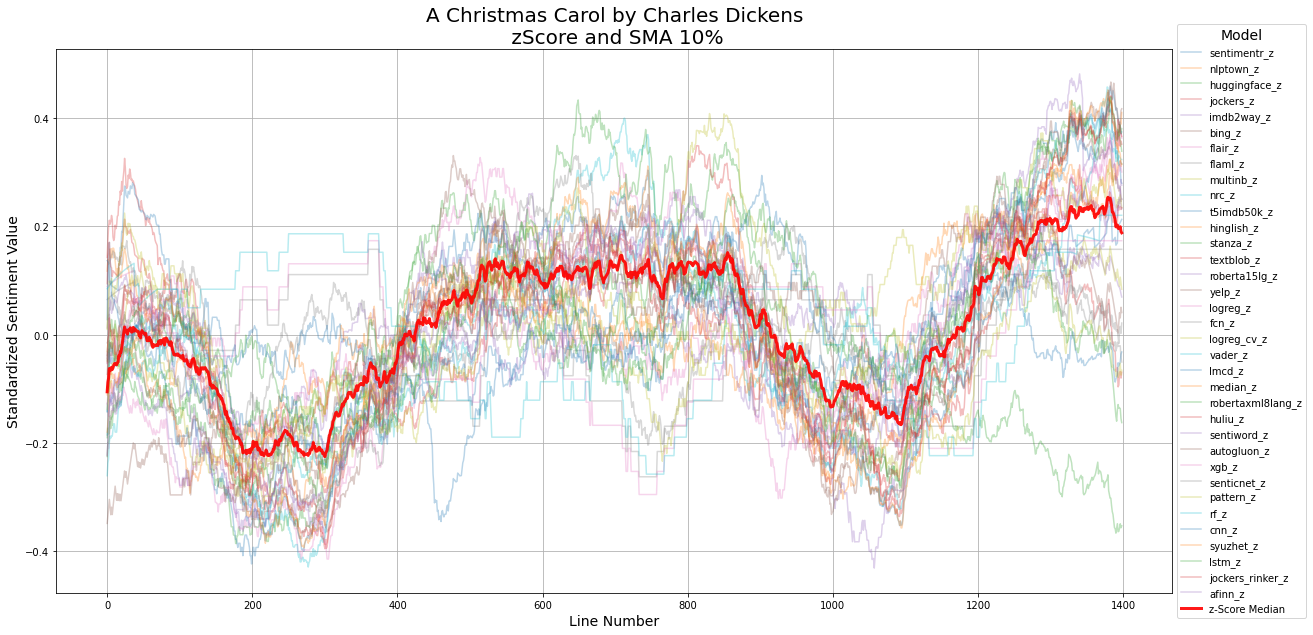

Processing Corpus: cdickens_greatexpectations...
Corpus #1 cdickens_greatexpectations with Model #0 sentimentr_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #1 nlptown_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #2 huggingface_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #3 jockers_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #4 imdb2way_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #5 bing_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #6 flair_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #7 flaml_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #8 multinb_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #9 nrc_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #10 t5imdb50k_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #11 hinglish_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #12 stanza_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #13 textblob_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #14 roberta15lg_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #15 yelp_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #16 logreg_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #17 fcn_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #18 logreg_cv_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #19 vader_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #20 lmcd_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #21 median_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #22 robertaxml8lang_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #23 huliu_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #24 sentiword_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #25 autogluon_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #26 xgb_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #27 senticnet_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #28 pattern_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #29 rf_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #30 cnn_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #31 syuzhet_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #32 lstm_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #33 jockers_rinker_z: has 40 columns but only 35 model columns


Corpus #1 cdickens_greatexpectations with Model #34 afinn_z: has 40 columns but only 35 model columns


Text(0.5, 1.0, 'Great Expectations by Charles Dickens\n zScore and SMA 10%')

Text(0.5, 0, 'Line Number')

Text(0, 0.5, 'Standardized Sentiment Value')

Saved plot to filepath: ./data_corpora_plots/plt_sma10_cdickens_greatexpectations.png




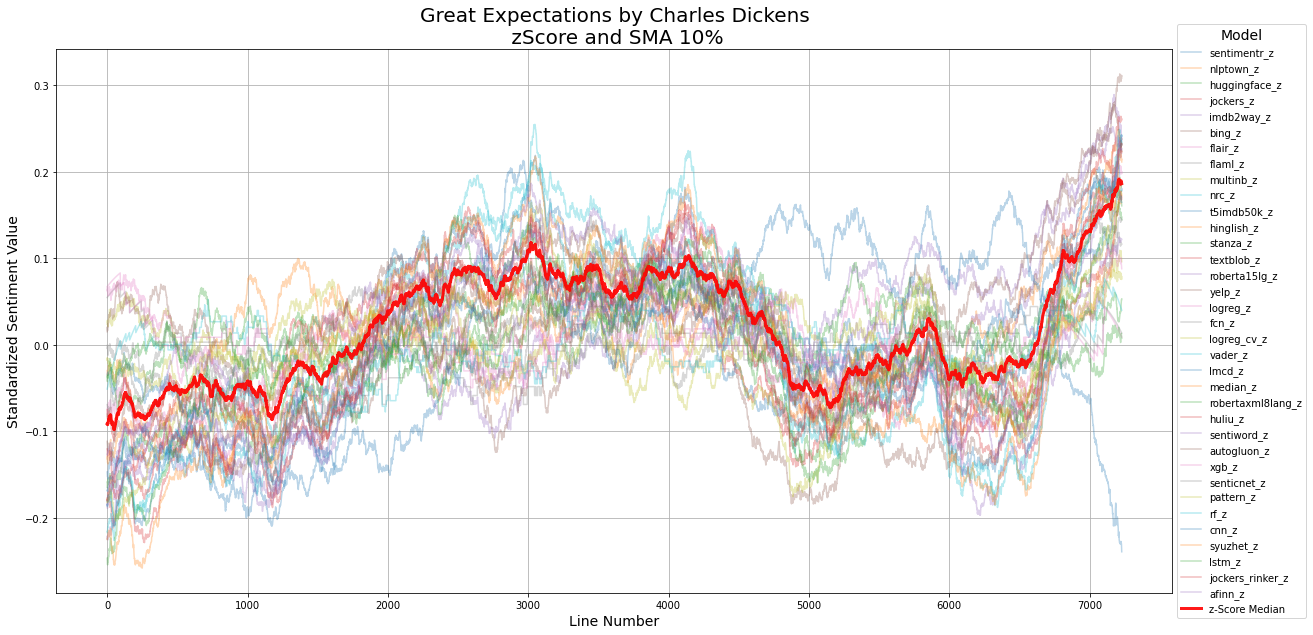

In [40]:
# Plot zScore + SMA 10% for all Models in each Corpus (including bold median_z)


plt.rcParams["figure.figsize"] = (20,10)

save_plot = True

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls[:2]):
  print(f'Processing Corpus: {acorpus}...')
  win10per = int(0.1*corpora_all_dt[acorpus]['median_z'].shape[0])

  for j, amodel_z in enumerate(model_z_cols_ls): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    # amodel_z = f'{amodel}_z'
    # corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().plot(label=f'z-Score {amodel_z}', alpha=0.3) # , style=['r*-'], linewidth=2.0)
    corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().plot(label=f'{amodel_z}', alpha=0.3) # , style=['r*-'], linewidth=2.0)

  # ax = corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=3, alpha=0.9)
  ax = corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=3, alpha=0.9)

  ax.grid(True)
  ax.set_title(f'{corpora_full_dt[acorpus]}\n zScore and SMA 10%', fontsize=20)
  # ax.set(xlabel='Decade', ylabel='Weighted Percent of Top Songs', fontsize=10)
  ax.set_xlabel('Line Number', fontsize=14)
  ax.set_ylabel('Standardized Sentiment Value', fontsize=14)
  # ax.set_xticklabels(us_impact_df.decade, size=30)
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, title='Model', title_fontsize=14);

  if save_plot:
    filename_plt = f'./{subdir_name}/plt_sma10_{acorpus}.png'
    plt.savefig(filename_plt)
    print(f'Saved plot to filepath: {filename_plt}\n\n')

  plt.show();

In [ ]:
"""

# Plot zScore + SMA 10% for all Models in each Corpus (including bold median_z)


plt.rcParams["figure.figsize"] = (20, 10)

save_plot = True

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls[:2]): # [:2]):
  print(f'Processing Corpus: {acorpus}...')
  win10per = int(0.1*corpora_all_dt[acorpus]['median_z'].shape[0])

  for j, amodel_z in enumerate(model_z_cols_ls): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    # amodel_z = f'{amodel}_z'
    corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True, min_periods=1).mean().plot(label=f'z-Score {amodel_z}', alpha=0.3) # , style=['r*-'], linewidth=2.0)

  corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=5.0)

  plt.title(f'{corpora_full_dt[acorpus]}\n zScore and SMA 10%', fontsize=20)    
  plt.legend(loc='best', fontsize=12, title='Model', title_fontsize=16)
  # corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True, min_periods=1).mean().plot(label='z-Score Median', style=['r'], linewidth=3.0)
  plt.xlabel = 'Novel Line Number'
  plt.ylabel = 'Standardized Sentiment Value'
  if save_plot:
    filename_plt = f'./{subdir_name}/plt_sma10_{acorpus}.png'
    plt.savefig(filename_plt)

  plt.show();

""";

## **Skip to [Save zScore] below**

In [ ]:
# Create list of all <model>_z DataFrames

pattern_z = re.compile(r'_z$')
pattern_zz = re.compile(r'_z_z$')
models_z_dt = {}
models_z_ls = []

for i, acorpus in enumerate(corpora_ls): # [:2]):
  print(f'Processing Corpus: {acorpus}')

  acorpus_model_ls = corpora_allz_dt[acorpus].columns
  for j, amodel in enumerate(acorpus_model_ls):

    # win10per = int(0.10*corpora_all_dt[acorpus].shape[0])

    if pattern_z.search(amodel) and not pattern_zz.search(amodel):
      models_z_ls.append(amodel)

  models_z_dt[acorpus] = copy.deepcopy(models_z_ls) # .copy(deep=True)
  models_z_ls = []

  print(f'models_z_dt[acorpus]: {models_z_dt[acorpus]}\n\n')


In [ ]:
models_z_dt['cdickens_achristmascarol']

In [ ]:
plt.rcParams["figure.figsize"] = (40,20)

subdir_name = 'data_corpora_plots'
pattern_z = re.compile(r'_z$')

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls): # [:2]):
  print(acorpus)

  models_z_ls = models_z_dt[acorpus]
  win10per = int(0.1*corpora_allz_dt[acorpus]['median_z'].shape[0])

  corpora_allz_dt[acorpus][models_z_ls].rolling(win10per, center=True).mean().plot(label=amodel_z, alpha=0.3)

  # if i == (len(corpora_ls)):
  #   corpora_all_dt[amodel]['median_z'].rolling(win10per, center=True).mean().plot(alpha=0.6, color='black', width=2)
  #   plt.title(f'{acorpus} Simple Moving Average')
  #  plt.legend(loc='best')
  
  # atitle = f'{acorpus}\n z-Score SMA 10%'
  # ax.title(atitle)
  plt.title(f'{acorpus}\n z-Score SMA 10%')    
  plt.legend(loc='best')
  
  # corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

  filename_plt = f'./{subdir_name}/plt_zsma10_{amodel}.png'
  plt.savefig(filename_plt)

  fig.show()
  # plt.show();  

In [ ]:

plt.rcParams["figure.figsize"] = (40,20)

subdir_name = 'data_corpora_plots'
pattern_z = re.compile(r'_z$')

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls): # [:2]):
  print(acorpus)
  # fig,ax = plt.subplots()

  for j, amodel in enumerate(model_cols_ls):

    # win10per = int(0.1*corpora_all_dt[acorpus]['median_z'].shape[0])

    # if j == 0:
    #   corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

    # print(f'Corpus #{i} {acorpus} with Model #{j} {amodel}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')
    win10per = int(0.10*corpora_all_dt[acorpus].shape[0])

    # Skip existing z-Scores
    if pattern_z.search(amodel):    

      # amodel_z = f'{amodel}_z'

      # corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True).mean().plot(label=amodel_z, alpha=0.3)

      # corpora_all_dt[acorpus][amodel].astype(np.float64)
      # temp_df[amodel] = corpora_all_dt[acorpus][amodel].value.rolling(win10per, min_periods=1,center=True).apply(zscore)
      
      # temp_df[amodel] = pd.Series(type(stdscaler.fit_transform(np.asarray(corpora_all_dt[acorpus][amodel]).reshape(-1,1)))) # .reshape(-1,1))
      # print(f'temp_df[amodel]: {temp_df[amodel]}')
      # print(f'len(temp_df[amodel]: {len(temp_df[amodel])}')

      # corpora_all_dt[acorpus][amodel_z].rolling(win10per, min_periods=1,center=True).mean().plot() # .mean().plot(label=amodel)

      # ax.plot(corpora_all_dt[acorpus][amodel_z].index, corpora_all_dt[acorpus][amodel_z].rolling(win10per, min_periods=1,center=True).mean(), label=amodel_z)
      # ax.set_xlabel('Sentence No.')
      # ax.set_ylabel('Sentiment (z-Score')
      # ax.legend(loc='best')

      # plt.title(f'{acorpus}\n z-Score SMA 10%')
      # plt.legend(loc='best') 
      pass

    corpora_all_dt[acorpus][amodel_z].rolling(win10per, center=True).mean().plot(label=amodel_z, alpha=0.3)

  # if i == (len(corpora_ls)):
  #   corpora_all_dt[amodel]['median_z'].rolling(win10per, center=True).mean().plot(alpha=0.6, color='black', width=2)
  #   plt.title(f'{acorpus} Simple Moving Average')
  #  plt.legend(loc='best')
  
  atitle = f'{acorpus}\n z-Score SMA 10%'
  ax.title(atitle)
  # plt.title(f'{acorpus}\n z-Score SMA 10%')    
  # plt.legend(loc='best')
  
  # corpora_all_dt[acorpus]['median_z'].rolling(win10per, center=True).mean().plot(label='z-Score Median', style=['r*-'], linewidth=2.0)

  filename_plt = f'./{subdir_name}/plt_sma10_{amodel}.png'
  plt.savefig(filename_plt)

  fig.show()
  # plt.show();

## **Patch TMorrison's Beloved Errors**

In [ ]:
corpora_all_dt['tmorrison_beloved'].head()

In [ ]:
%whos dict

In [ ]:
corpora_sa_dt.keys()

In [ ]:
# TODO: Fix error (all 0) for tmorrison_beloved/pattern model (leads to NaN in zScore/SMA/LTTB)

corpora_sa_dt['baseline_tmorrison_beloved']['pattern'].value_counts()

In [ ]:
corpora_all_dt['tmorrison_beloved']['pattern'].value_counts

In [ ]:
corpora_all_dt['tmorrison_beloved']['pattern'].rolling(400, center=True, min_periods=1).mean().plot()

In [ ]:
corpora_all_dt['tmorrison_beloved']['pattern_z'].value_counts()

In [ ]:
corpora_all_dt['tmorrison_beloved']['pattern_z'].rolling(400, center=True, min_periods=1).mean().plot()

## **Save zScore/SMA 10% DataFrames**

In [ ]:
# Save all models with orignal and zscore values

subdir_out = 'data_corpora_all'

temp_df = pd.DataFrame()

for i, acorpus in enumerate(corpora_ls):
  print(acorpus)
  # acorpus_sent_len = corpora_all_dt[acorpus]['xgb'].shape[0]

  filename_out = f'models_zall_{acorpus}.csv'
  fullpath_out = f'./{subdir_out}/{filename_out}'

  print(f'\nSaving Corpus: {acorpus}...')
  corpora_all_dt[acorpus].to_csv(fullpath_out)

cdickens_achristmascarol

Saving Corpus: cdickens_achristmascarol...
cdickens_greatexpectations

Saving Corpus: cdickens_greatexpectations...
ddefoe_robinsoncrusoe

Saving Corpus: ddefoe_robinsoncrusoe...
emforster_howardsend

Saving Corpus: emforster_howardsend...
fbaum_thewonderfulwizardofoz

Saving Corpus: fbaum_thewonderfulwizardofoz...
fdouglass_narrativelifeofaslave

Saving Corpus: fdouglass_narrativelifeofaslave...
fscottfitzgerald_thegreatgatsby

Saving Corpus: fscottfitzgerald_thegreatgatsby...
geliot_middlemarch

Saving Corpus: geliot_middlemarch...
hjames_portraitofalady

Saving Corpus: hjames_portraitofalady...
homer-ewilson_odyssey

Saving Corpus: homer-ewilson_odyssey...
imcewan_machineslikeme

Saving Corpus: imcewan_machineslikeme...
jausten_prideandprejudice

Saving Corpus: jausten_prideandprejudice...
jconrad_heartofdarkness

Saving Corpus: jconrad_heartofdarkness...
jjoyce_portraitoftheartist

Saving Corpus: jjoyce_portraitoftheartist...
jkrowling_1sorcerersstone

Sav

# **Time Series Metrics**

* https://pythonawesome.com/overview-of-the-peaks-dectection-algorithms-available-in-python/

* https://eddwardo.github.io/posts/2019-06-05-finding-local-extreams-in-pandas-time-series/

In [41]:
from scipy.signal import argrelextrema

In [42]:
plt.rcParams["figure.figsize"] = (20,10)

In [43]:
corpora_all_dt['cdickens_achristmascarol'].head(2)

sent_no  parag_no  sect_no  ...    bing_z    lmcd_z  median_z
0        0         0        0  ... -0.028418  0.010733 -0.288974
1        1         1        0  ... -1.120313  0.010733 -0.978538

[2 rows x 40 columns]

In [44]:
# corpus_root_ls[:3]

corpora_ls[:3]

['cdickens_achristmascarol',
 'cdickens_greatexpectations',
 'ddefoe_robinsoncrusoe']

## **SMA**

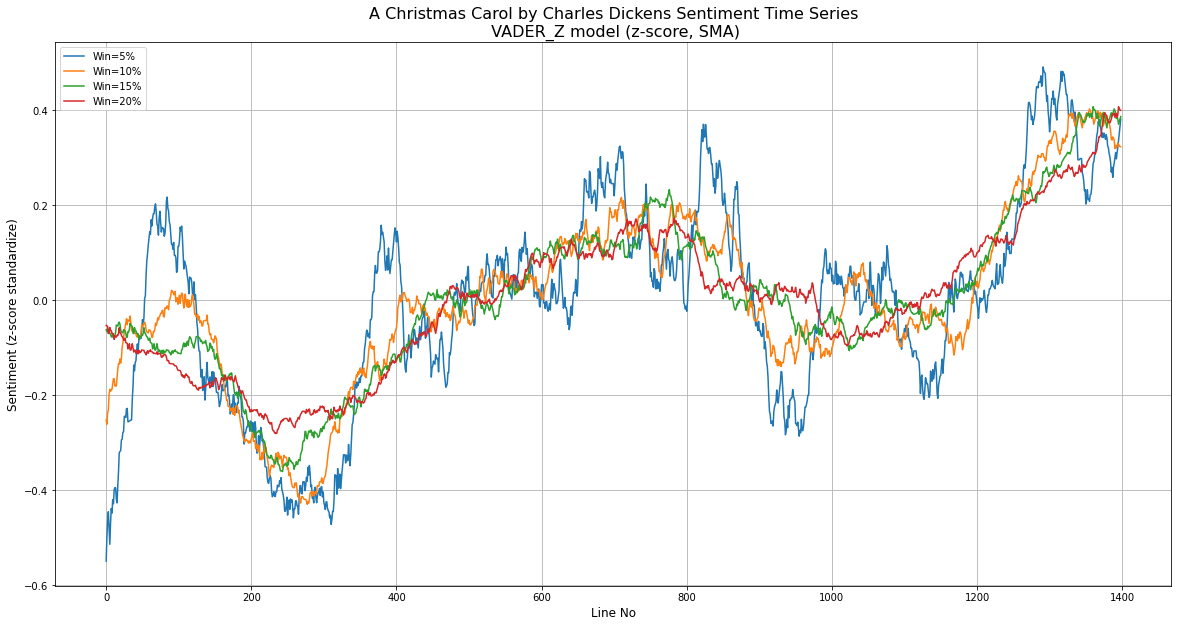

In [45]:
acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

win5_per = int(corpora_all_dt[acorpus].shape[0]*0.05)

for i in range(1,5):
  win_size = i*win5_per
  win_per = 5*i
  corpora_all_dt[acorpus][amodel].rolling(i*win5_per, center=True, min_periods=1).mean().plot(label=f'Win={win_per}%')
plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
plt.xlabel('Line No', fontsize=12)
plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series\n {amodel.upper()} model (z-score, SMA)', fontsize=16)
plt.grid(True)
plt.legend(loc='best')
plt.show();

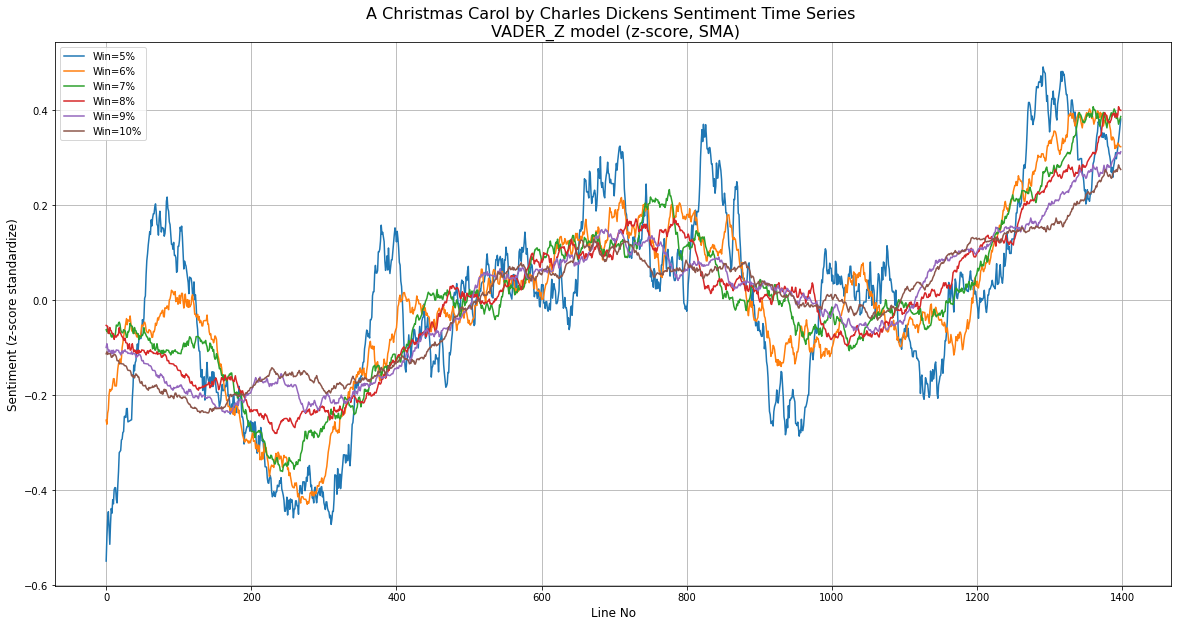

In [46]:
acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

win5_per = int(corpora_all_dt[acorpus].shape[0]*0.05)
win1_per = int(corpora_all_dt[acorpus].shape[0]*0.01)

for i in range(1,7):
  win_size = (i-1)*win1_per + win5_per
  win_per = 5 + (i-1)
  corpora_all_dt[acorpus][amodel].rolling(i*win5_per, center=True, min_periods=1).mean().plot(label=f'Win={win_per}%')
plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
plt.xlabel('Line No', fontsize=12)
plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series \n {amodel.upper()} model (z-score, SMA)', fontsize=16)
plt.legend(loc='best')
plt.grid(True)
plt.show();

In [47]:
corpora_ls

['cdickens_achristmascarol',
 'cdickens_greatexpectations',
 'ddefoe_robinsoncrusoe',
 'emforster_howardsend',
 'fbaum_thewonderfulwizardofoz',
 'fdouglass_narrativelifeofaslave',
 'fscottfitzgerald_thegreatgatsby',
 'geliot_middlemarch',
 'hjames_portraitofalady',
 'homer-ewilson_odyssey',
 'imcewan_machineslikeme',
 'jausten_prideandprejudice',
 'jconrad_heartofdarkness',
 'jjoyce_portraitoftheartist',
 'jkrowling_1sorcerersstone',
 'mproust-mtreharne_3guermantesway',
 'mshelley_frankenstein',
 'mtwain_huckleberryfinn',
 'staugustine_confessions9end',
 'tmorrison_beloved',
 'vnabokov_palefire',
 'vwoolf_mrsdalloway',
 'vwoolf_orlando',
 'vwoolf_thewaves',
 'vwoolf_tothelighthouse']

Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'A Christmas Carol by Charles Dickens Sentiment Time Series \n VADER_Z model (z-score, SMA 5%)')

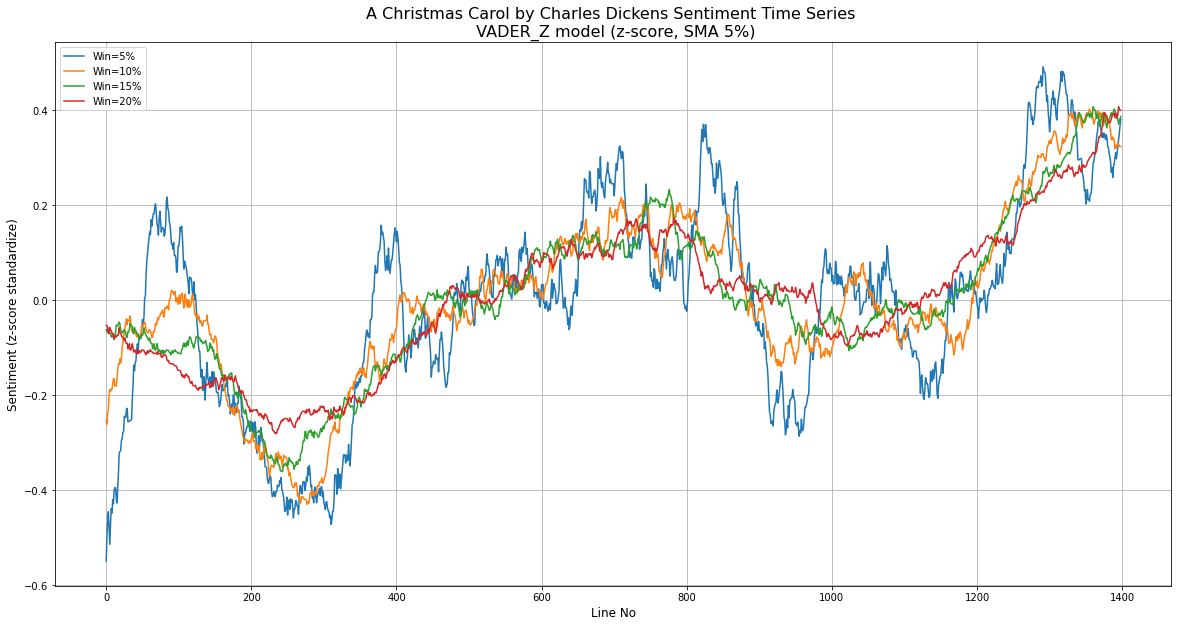

Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'Great Expectations by Charles Dickens Sentiment Time Series \n VADER_Z model (z-score, SMA 5%)')

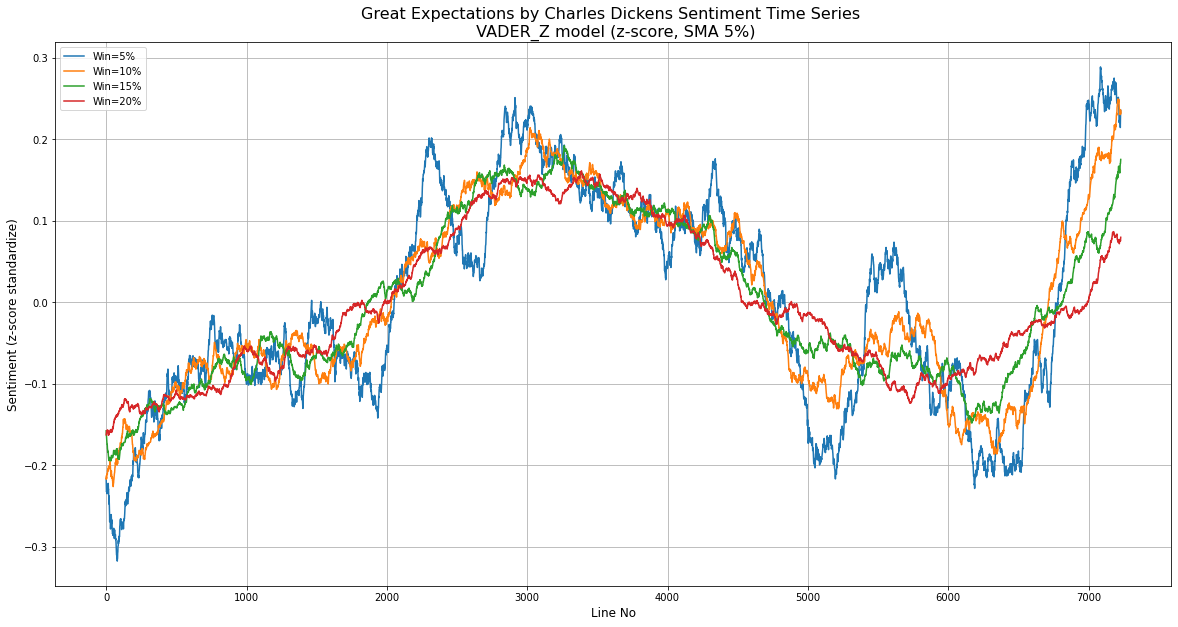

In [48]:
acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

for i, acorpus in enumerate(corpora_ls[:2]): # corpus_root_ls[:2]):

  win5_per = int(corpora_all_dt[acorpus].shape[0]*0.05)

  for i in range(1,5):
    win_size = i*win5_per
    win_per = 5*i
    corpora_all_dt[acorpus][amodel].rolling(i*win5_per, center=True, min_periods=1).mean().plot(label=f'Win={win_per}%')
  plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
  plt.xlabel('Line No', fontsize=12)
  plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series \n {amodel.upper()} model (z-score, SMA 5%)', fontsize=16)
  plt.grid(True)
  plt.legend(loc='best')
  plt.show();

In [49]:
model_z_cols_ls

['sentimentr_z',
 'nlptown_z',
 'huggingface_z',
 'jockers_z',
 'imdb2way_z',
 'bing_z',
 'flair_z',
 'flaml_z',
 'multinb_z',
 'nrc_z',
 't5imdb50k_z',
 'hinglish_z',
 'stanza_z',
 'textblob_z',
 'roberta15lg_z',
 'yelp_z',
 'logreg_z',
 'fcn_z',
 'logreg_cv_z',
 'vader_z',
 'lmcd_z',
 'median_z',
 'robertaxml8lang_z',
 'huliu_z',
 'sentiword_z',
 'autogluon_z',
 'xgb_z',
 'senticnet_z',
 'pattern_z',
 'rf_z',
 'cnn_z',
 'syuzhet_z',
 'lstm_z',
 'jockers_rinker_z',
 'afinn_z']

Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'A Christmas Carol by Charles Dickens\n Sentiment Time Series (z-score, SMA 5%)')

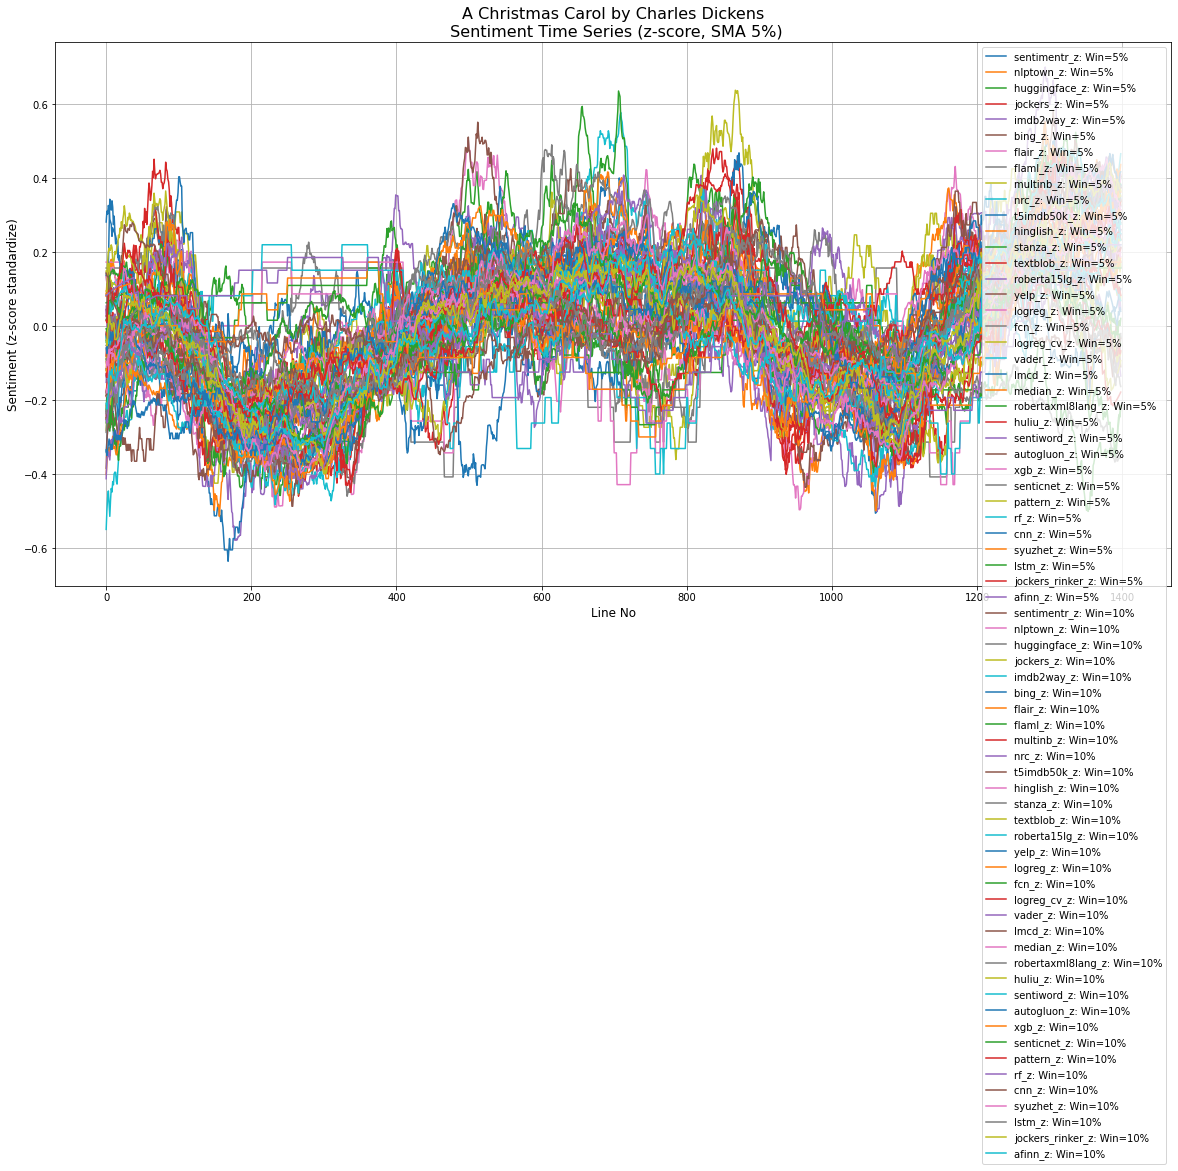

Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'Great Expectations by Charles Dickens\n Sentiment Time Series (z-score, SMA 5%)')

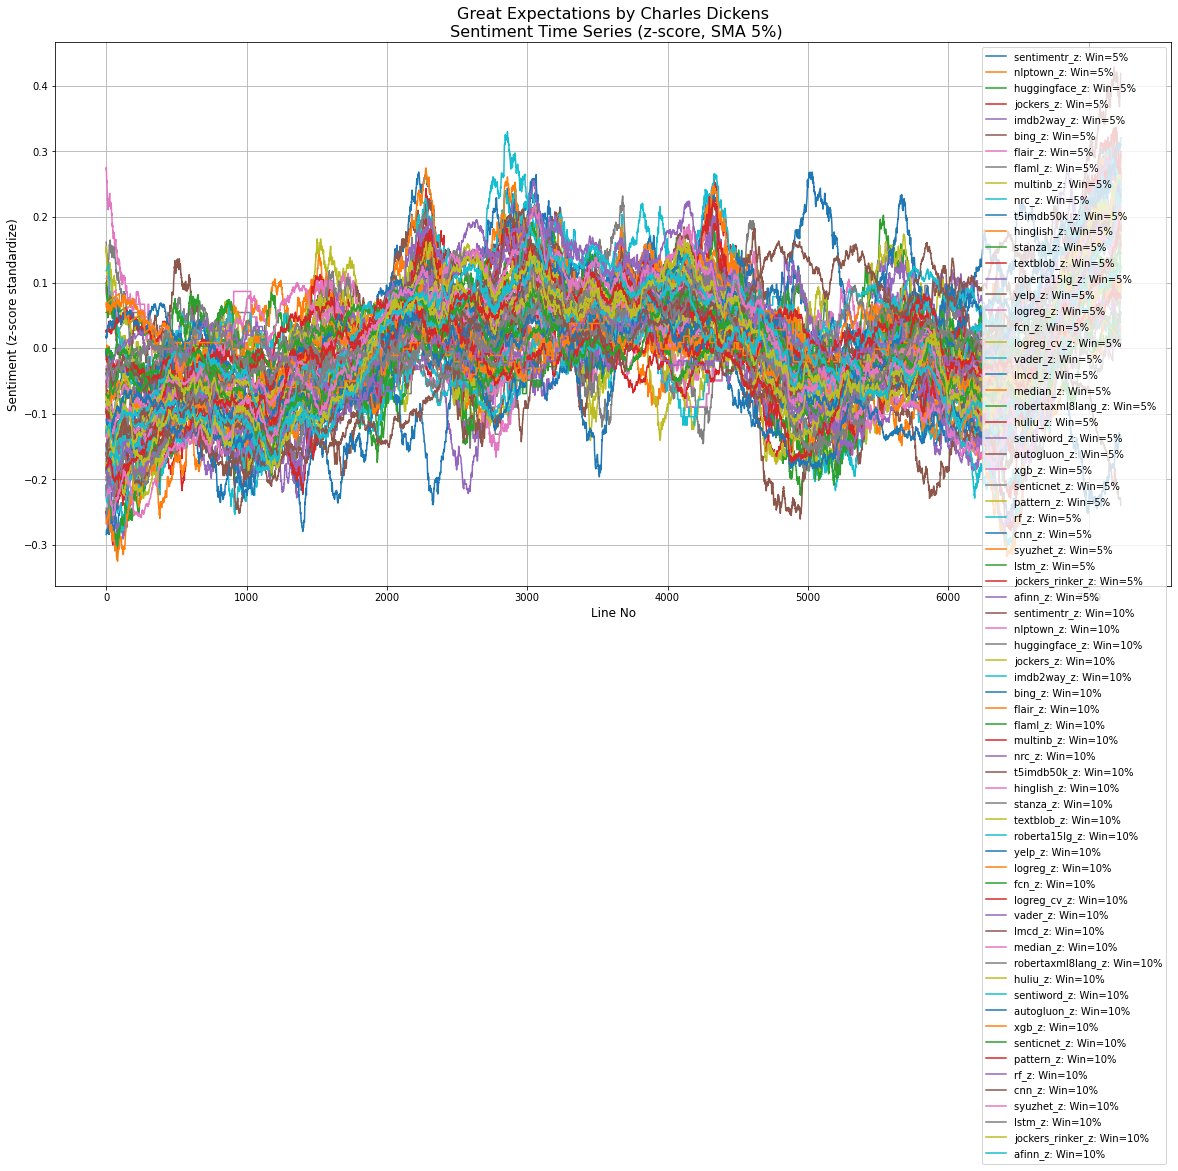

In [50]:
# Plot All plots for all windows

for i, acorpus in enumerate(corpora_ls[:2]): # corpus_root_ls[:2]):

  win5_per = int(corpora_all_dt[acorpus].shape[0]*0.05)

  for i in range(1,3):
    win_size = i*win5_per
    win_per = 5*i
    for j, amodel in enumerate(model_z_cols_ls):
      corpora_all_dt[acorpus][amodel].rolling(i*win5_per, center=True, min_periods=1).mean().plot(label=f'{amodel}: Win={win_per}%')
  plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
  plt.xlabel('Line No', fontsize=12)
  plt.title(f'{corpora_full_dt[acorpus]}\n Sentiment Time Series (z-score, SMA 5%)', fontsize=16)
  plt.legend(loc='best')
  plt.grid(True)
  plt.show();

## **LOWESS**

* https://james-brennan.github.io/posts/lowess_conf/

### **Crux Point Detection Algo**

0. Input: z-score(standardized)/SMA 10%(smoothed) sentiment time series
1. Hyperparam: frac=[high-res frac - baseline frac], crux_halfwin
2. Detect all Cruxes
3. Segment TS by highest resolution LOWESS (hrCrux)
4. Correct for endpoints
5. Delete adjacent cruxes of diff direction if too close (crux_sep_min) (save deleted (2)crux pair to anomalies_ls)
6. Merge adjacent cruxes of same direction (save deleted (1)crux as anomalies_ls)
7. hrCrux_height = abs(hrCrux - baseCrux)

7. hrCrux_adjcent_ct = Sum(Crux-same dir) adjacent to high-res Cruxes (save temporal mean/std)
8. hrCrux_agree_per = Percent, Sum(Crux-same dir > Crux-base)/hrCrux_adjacent_ct
9. hrCrux_agree_deg = Degree, Norm(Sum(Dist(Crux-same dir - Crux-base))) (save value mean/std) (non-linear normalization, sigma fn?)
10. Crux vs Anomaly classifier hyperparameters/thresholds (Quant def of Anomaly)
11. Retrieve context around Crux/Anomaly points for human verification/annotation

In [51]:
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess

In [52]:
from scipy.signal import argrelextrema

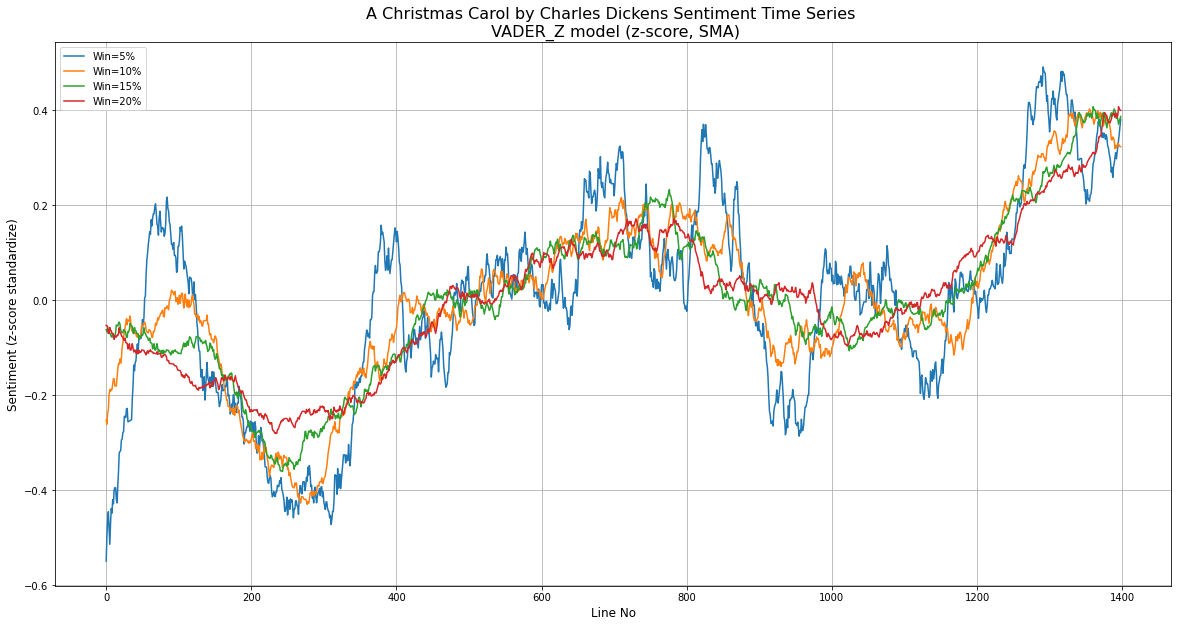

In [53]:
acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

win5_per = int(corpora_all_dt[acorpus].shape[0]*0.05)

for i in range(1,5):
  win_size = i*win5_per
  win_per = 5*i
  corpora_all_dt[acorpus][amodel].rolling(i*win5_per, center=True, min_periods=1).mean().plot(label=f'Win={win_per}%')
plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
plt.xlabel('Line No', fontsize=12)
plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series \n {amodel.upper()} model (z-score, SMA)', fontsize=16)
plt.grid(True)
plt.legend(loc='best')
plt.show();

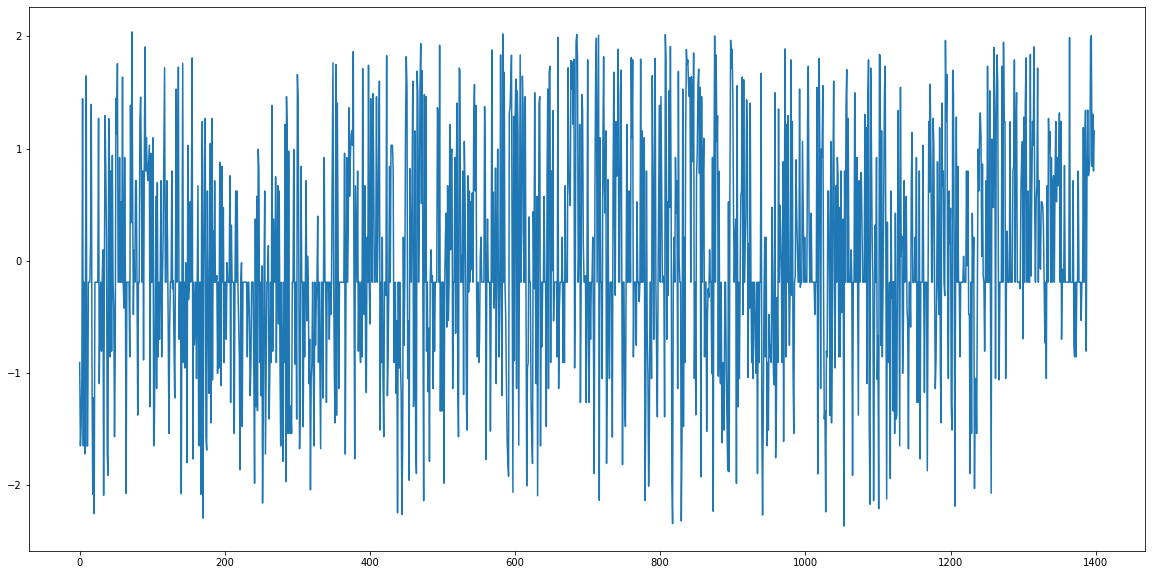

In [54]:
corpora_all_dt[acorpus][amodel].plot()

In [55]:
for acorpus in corpora_ls:
  print(f'Corpus: {acorpus}')
  for amodel in model_z_cols_ls:
    amin = corpora_all_dt[acorpus][amodel].min()
    amax = corpora_all_dt[acorpus][amodel].max()
    print(f'    Model: {amodel}')
    print(f'      Min={amin:.2f}')
    print(f'      Max={amax:.2f}')

Corpus: cdickens_achristmascarol
    Model: sentimentr_z
      Min=-4.17
      Max=6.02
    Model: nlptown_z
      Min=-1.16
      Max=1.71
    Model: huggingface_z
      Min=-1.03
      Max=1.06
    Model: jockers_z
      Min=-3.77
      Max=4.39
    Model: imdb2way_z
      Min=-2.18
      Max=0.58
    Model: bing_z
      Min=-4.71
      Max=4.66
    Model: flair_z
      Min=-0.87
      Max=1.34
    Model: flaml_z
      Min=-6.34
      Max=0.16
    Model: multinb_z
      Min=-1.12
      Max=0.89
    Model: nrc_z
      Min=-4.68
      Max=6.89
    Model: t5imdb50k_z
      Min=-0.96
      Max=1.16
    Model: hinglish_z
      Min=-2.36
      Max=1.16
    Model: stanza_z
      Min=-1.68
      Max=6.03
    Model: textblob_z
      Min=-4.34
      Max=3.67
    Model: roberta15lg_z
      Min=-0.99
      Max=1.02
    Model: yelp_z
      Min=-1.17
      Max=2.07
    Model: logreg_z
      Min=-0.99
      Max=1.02
    Model: fcn_z
      Min=-2.51
      Max=1.69
    Model: logreg_cv_z
      Min=-0

### **Identify Crux Points**

In [56]:
import matplotlib

In [57]:
plt.rcParams["figure.figsize"] = (20,10)

In [58]:
def merge_cruxes(crux_x_min_ls, crux_y_min_ls, crux_x_max_ls, crux_y_max_ls):
  '''
  Given a 4 lists: x/y with min/max
  Return one DataFrame with all merged and sorted by ascending line_no
  '''

  # For Crux Minimums, calculate the Distance between the Baseline and Extrema LOWESS Crux Points
  # crux_min_dist_ls = []

  crux_min_len = len(crux_x_min_ls)
  crux_type_ls = ['min']*crux_min_len

  # for amin_crux in crux_x_min_ls:
  #   amin_crux_dist = abs(sm_y_20frac[amin_crux] - sm_y_05frac[amin_crux])
  #   crux_min_dist_ls.append(amin_crux_dist)
  #   print(f'At Line: {amin_crux} the abs(base-extreme) distance: {amin_crux_dist}')

  # crux_min_dist_ls.sort(reverse=True)

  crux_min_points_df = pd.DataFrame(
      {'type' : crux_type_ls,
      'line_no' : crux_x_min_ls}) # ,
  #     'dist' : crux_min_dist_ls})


  # For Crux Maximums, calculate the Distance between the Baseline and Extrema LOWESS Crux Points
  crux_max_dist_ls = []

  crux_max_len = len(crux_x_max_ls)
  crux_type_ls = ['max']*crux_max_len

  # for amax_crux in crux_x_max_ls:
  #   amax_crux_dist = abs(sm_y_20frac[amax_crux] - sm_y_05frac[amax_crux])
  #   crux_max_dist_ls.append(amax_crux_dist)
  #   # print(f'At Line: {amax_crux} the abs(base-extreme) distance: {amax_crux_dist}')

  # crux_max_dist_ls.sort(reverse=True)

  crux_max_points_df = pd.DataFrame(
      {'type' : crux_type_ls,
      'line_no' : crux_x_max_ls}) # ,
  #     'dist' : crux_max_dist_ls})

  # Save all merged/sorted min+max crux points
  crux_all_points_df = crux_min_points_df.append(crux_max_points_df, ignore_index=True)

  crux_all_points_df.sort_values(by='line_no', inplace=True)

  line_ls = crux_all_points_df['line_no'].to_list()
  line_first = min(line_ls)
  line_last = max(line_ls)

  return crux_all_points_df


In [59]:
def prune_cruxes(crux_df, min_pair_dist):
  '''
  Give a DataFrame of Cruxes and min distance between adjacent Cruxes
  Return the original DataFrame with all close pairs removed (preserving first and last Cruxes)
  '''
  pass
  
  return 

In [60]:
corpora_ls

['cdickens_achristmascarol',
 'cdickens_greatexpectations',
 'ddefoe_robinsoncrusoe',
 'emforster_howardsend',
 'fbaum_thewonderfulwizardofoz',
 'fdouglass_narrativelifeofaslave',
 'fscottfitzgerald_thegreatgatsby',
 'geliot_middlemarch',
 'hjames_portraitofalady',
 'homer-ewilson_odyssey',
 'imcewan_machineslikeme',
 'jausten_prideandprejudice',
 'jconrad_heartofdarkness',
 'jjoyce_portraitoftheartist',
 'jkrowling_1sorcerersstone',
 'mproust-mtreharne_3guermantesway',
 'mshelley_frankenstein',
 'mtwain_huckleberryfinn',
 'staugustine_confessions9end',
 'tmorrison_beloved',
 'vnabokov_palefire',
 'vwoolf_mrsdalloway',
 'vwoolf_orlando',
 'vwoolf_thewaves',
 'vwoolf_tothelighthouse']

In [61]:
frac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]

print(f'frac_ls: {frac_ls}')
# for i,afrac in enumerate(frac_ls):
for afrac in frac_ls:
  print(f'Processing afrac={int(1/afrac)}')

frac_ls: [0.05, 0.06666666666666667, 0.1, 0.14285714285714285, 0.2]
Processing afrac=20
Processing afrac=15
Processing afrac=10
Processing afrac=7
Processing afrac=5


In [62]:
def get_lowesses(sa_ls, afrac_ls = [1.0/20, 1.0/15, 1.0/10, 1.0/7, 1.0/5], crux_halfwin_per = 2):
  '''
  Given a List of z-score/SMA 10% sentiment values and a list of LOWESS frac paramters
  Return a DataFrame of Series of LOWESS curves with col=frac value, value=list of 3 lists: y-vales of LOWESS curve, list of Max (x,y) tuples, list of Min (x,y) tuples
  '''
  crux_all_df = pd.DataFrame()
  corpus_lowess_dt = {}

  # Min half window width between adjacent Crux points
  # crux_halfwin_per = 2

  # Min distance bewteen adjacent Crux points
  # min_pair_dist_per = 2


  y = sa_ls
  x = range(len(y))

  # Crux LOWESS Extrema (frac=1./5.)
  crux_x_min_ls = []
  crux_x_max_ls = []

  afrac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]

  print(f'frac_ls: {frac_ls}')
  # for i,afrac in enumerate(frac_ls):
  for afrac in afrac_ls:
    print(f'Processing afrac={afrac}')
    afrac_str = str(int(1/float(afrac)))

    sm_x, sm_y = sm_lowess(y, x,  frac=afrac, it=5, return_sorted = True).T

    # Save LOWESS smoothed y to DataFrame
    col_name = f'lowess_{afrac_str}'
    corpus_lowess_dt[col_name] = sm_y
    crux_all_df[col_name] = sm_y

    # Create List of (x,y) tuples for LOWESS smoothed curve
    # lowess_ls = zip(sm_x, sm_y)

    # Create List of (x,y) tuples of Crux Mins
    crux_x_min_ls = argrelextrema(sm_y, np.less_equal, order=crux_halfwin_per)[0]
    crux_y_min_ls = sm_y[crux_x_min_ls]
    # crux_min_ls = zip(crux_x_min_ls, crux_y_min_ls)
    lowess_min_ls = []
    min_ptr = 0
    for i in range(crux_all_df.shape[0]):
      if i in crux_x_min_ls:
        lowess_min_ls.append(crux_y_min_ls[min_ptr])
        min_ptr += 1
      else:
        lowess_min_ls.append(np.nan)
    col_name = f'min_{afrac_str}'
    corpus_lowess_dt[col_name] = pd.Series(lowess_min_ls)
    crux_all_df[col_name] = pd.Series(lowess_min_ls)

    # Create List of (x,y) tuples of Crux Maxes
    crux_x_max_ls = argrelextrema(sm_y, np.greater_equal, order=crux_halfwin_per)[0]
    crux_y_max_ls = sm_y[crux_x_max_ls]
    # crux_max_ls = zip(crux_x_max_ls, crux_y_max_ls)
    lowess_max_ls = []
    max_ptr = 0
    for i in range(crux_all_df.shape[0]):
      if i in crux_x_max_ls:
        lowess_max_ls.append(crux_y_max_ls[max_ptr])
        max_ptr += 1
      else:
        lowess_max_ls.append(np.nan)
    col_name = f'max_{afrac_str}'
    corpus_lowess_dt[col_name] = pd.Series(lowess_max_ls)
    crux_all_df[col_name] = pd.Series(lowess_max_ls)

    print(f'Just calculated min/max crux points for afrac={afrac}')

    # temp_crux_df = pd.DataFrame()
    # Create merged and sorted temp Crux DataFrame 
    # afrac_str = str(int(1/float(afrac)))
    # print(f'created afrac_str: {afrac_str}')
    # temp_crux_dt[afrac_str] 
    # crux_all_df = merge_cruxes(crux_x_min_ls, crux_y_min_ls, crux_x_max_ls, crux_y_max_ls)
    # print(f'merged with afrac_str: {afrac_str}')
    # print(f'saving afrac_str: {afrac_str}')
    # corpus_lowess_dt[afrac_str] = {'lowess':lowess_ls, 'min':crux_min_ls, 'max':crux_max_ls} # 'crux':crux_all_df}
    # Prune out adjacent crux pairs if closer than min_pair_dist (excluding first and last cruxes)
    # temp_crux_df = prune_cruxes(temp_crux_df, min_pair_dist)

  return crux_all_df   # corpus_lowess_dt


In [ ]:
"""
def get_lowesses(sa_ls, afrac_ls = [1.0/20, 1.0/15, 1.0/10, 1.0/7, 1.0/5]):
  '''
  Given a List of z-score/SMA 10% sentiment values and a list of LOWESS frac paramters
  Return a DataFrame of Series of LOWESS curves with col=frac value, value=list of 3 lists: y-vales of LOWESS curve, list of Max (x,y) tuples, list of Min (x,y) tuples
  '''
  crux_all_df = pd.DataFrame()
  corpus_lowess_dt = {}

  y = sa_ls
  x = range(len(y))

  # Crux LOWESS Extrema (frac=1./5.)
  crux_x_min_ls = []
  crux_x_max_ls = []

  afrac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]

  print(f'frac_ls: {frac_ls}')
  # for i,afrac in enumerate(frac_ls):
  for afrac in afrac_ls:
    print(f'Processing afrac={afrac}')

    sm_x, sm_y = sm_lowess(y, x,  frac=afrac, it=5, return_sorted = True).T

    # Create List of (x,y) tuples for LOWESS smoothed curve
    lowess_ls = zip(sm_x, sm_y)
    
    # Create List of (x,y) tuples of Crux Mins
    crux_x_min_ls = argrelextrema(sm_y, np.less_equal, order=crux_halfwin)[0]
    crux_y_min_ls = sm_y[crux_x_min_ls]
    crux_min_ls = zip(crux_x_min_ls, crux_y_min_ls)

    # Create List of (x,y) tuples of Crux Maxes
    crux_x_max_ls = argrelextrema(sm_y, np.greater_equal, order=crux_halfwin)[0]
    crux_y_max_ls = sm_y[crux_x_max_ls]
    crux_max_ls = zip(crux_x_max_ls, crux_y_max_ls)

    print(f'Just calculated min/max crux points for afrac={afrac}')

    # temp_crux_df = pd.DataFrame()
    # Create merged and sorted temp Crux DataFrame 
    afrac_str = str(int(1/float(afrac)))
    print(f'created afrac_str: {afrac_str}')
    # temp_crux_dt[afrac_str] 
    crux_all_df = merge_cruxes(crux_x_min_ls, crux_y_min_ls, crux_x_max_ls, crux_y_max_ls)
    print(f'merged with afrac_str: {afrac_str}')
    print(f'saving afrac_str: {afrac_str}')
    corpus_lowess_dt[afrac_str] = {'lowess':lowess_ls, 'min':crux_min_ls, 'max':crux_max_ls} # 'crux':crux_all_df}
    # Prune out adjacent crux pairs if closer than min_pair_dist (excluding first and last cruxes)
    # temp_crux_df = prune_cruxes(temp_crux_df, min_pair_dist)

  return corpus_lowess_dt
""";

In [63]:
# Global var

corpora_lowess_dt = {}

In [64]:
corpora_lowess_dt['cdickens_achristmascarol::vader_z'] = get_lowesses(corpora_all_dt['cdickens_achristmascarol']['vader_z'])
corpora_lowess_dt['cdickens_achristmascarol::vader_z'].head()
corpora_lowess_dt['cdickens_achristmascarol::vader_z'].info()

frac_ls: [0.05, 0.06666666666666667, 0.1, 0.14285714285714285, 0.2]
Processing afrac=0.05
Just calculated min/max crux points for afrac=0.05
Processing afrac=0.06666666666666667
Just calculated min/max crux points for afrac=0.06666666666666667
Processing afrac=0.1
Just calculated min/max crux points for afrac=0.1
Processing afrac=0.14285714285714285
Just calculated min/max crux points for afrac=0.14285714285714285
Processing afrac=0.2
Just calculated min/max crux points for afrac=0.2


lowess_20    min_20  max_20  lowess_15  ...  max_7  lowess_5    min_5  max_5
0  -1.016804 -1.016804     NaN  -0.910562  ...    NaN -0.169290 -0.16929    NaN
1  -0.991668       NaN     NaN  -0.890448  ...    NaN -0.167990      NaN    NaN
2  -0.966605       NaN     NaN  -0.870409  ...    NaN -0.166706      NaN    NaN
3  -0.941613       NaN     NaN  -0.850444  ...    NaN -0.165440      NaN    NaN
4  -0.916682       NaN     NaN  -0.830552  ...    NaN -0.164190      NaN    NaN

[5 rows x 15 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lowess_20  1399 non-null   float64
 1   min_20     21 non-null     float64
 2   max_20     21 non-null     float64
 3   lowess_15  1399 non-null   float64
 4   min_15     16 non-null     float64
 5   max_15     16 non-null     float64
 6   lowess_10  1399 non-null   float64
 7   min_10     8 non-null      float64
 8   max_10     8 non-null      float64
 9   lowess_7   1399 non-null   float64
 10  min_7      8 non-null      float64
 11  max_7      8 non-null      float64
 12  lowess_5   1399 non-null   float64
 13  min_5      4 non-null      float64
 14  max_5      4 non-null      float64
dtypes: float64(15)
memory usage: 164.1 KB


In [65]:
corpora_all_dt['cdickens_achristmascarol'].head(2)

sent_no  parag_no  sect_no  ...    bing_z    lmcd_z  median_z
0        0         0        0  ... -0.028418  0.010733 -0.288974
1        1         1        0  ... -1.120313  0.010733 -0.978538

[2 rows x 40 columns]

### **Correct Starting/Ending Points**

In [66]:
def adj_endpoints(a_df, col_ls = ['lowess_20','lowess_15','lowess_10','lowess_7','lowess_5']):
  '''
  Given a DataFrame and List of column names for several LOWESS curves
  Return a List of (2)start/endpoint corrections using the median for the common time series period
  '''
  start_val_ls = []
  end_val_ls = []
  corpus_len = a_df.shape[0]
  for i, acol in enumerate(col_ls):
    print(f'Processing column #{i}: {acol}')
    start_val_ls.append(a_df.iloc[0][acol])
    end_val_ls.append(a_df.iloc[corpus_len-1][acol])

  print(f'start_val_ls: {start_val_ls}')
  start_median = np.median(start_val_ls)
  print(f'start_median: {start_median}')
  print(f'end_val_ls: {end_val_ls}')
  end_median = np.median(end_val_ls)
  print(f'end_median: {end_median}')
  endpoints_ls = list(zip(start_val_ls, end_val_ls))
  endpoints_median_ls = [start_median, end_median]

  # return endpoints_ls, endpoints_median_ls

  return endpoints_median_ls

In [67]:
# test_ls = list(adj_endpoints(corpora_lowess_dt['cdickens_achristmascarol::vader_z']))
# print(f'test_ls: {test_ls}')
# print(f'end_ls: {test_ls[1]}')

endpoints_median_ls = adj_endpoints(corpora_lowess_dt['cdickens_achristmascarol::vader_z'])
print(f'endpoints_median_ls: {endpoints_median_ls}')

Processing column #0: lowess_20
Processing column #1: lowess_15
Processing column #2: lowess_10
Processing column #3: lowess_7
Processing column #4: lowess_5
start_val_ls: [-1.016804339911112, -0.9105617977790154, -0.6974307716254039, -0.38311802576563075, -0.16928950195439899]
start_median: -0.6974307716254039
end_val_ls: [0.8385262135096851, 0.5703290301931989, 0.3909806247621377, 0.3855858471737326, 0.4538213642973776]
end_median: 0.4538213642973776
endpoints_median_ls: [-0.6974307716254039, 0.4538213642973776]


### **EDA Crux Clusters**

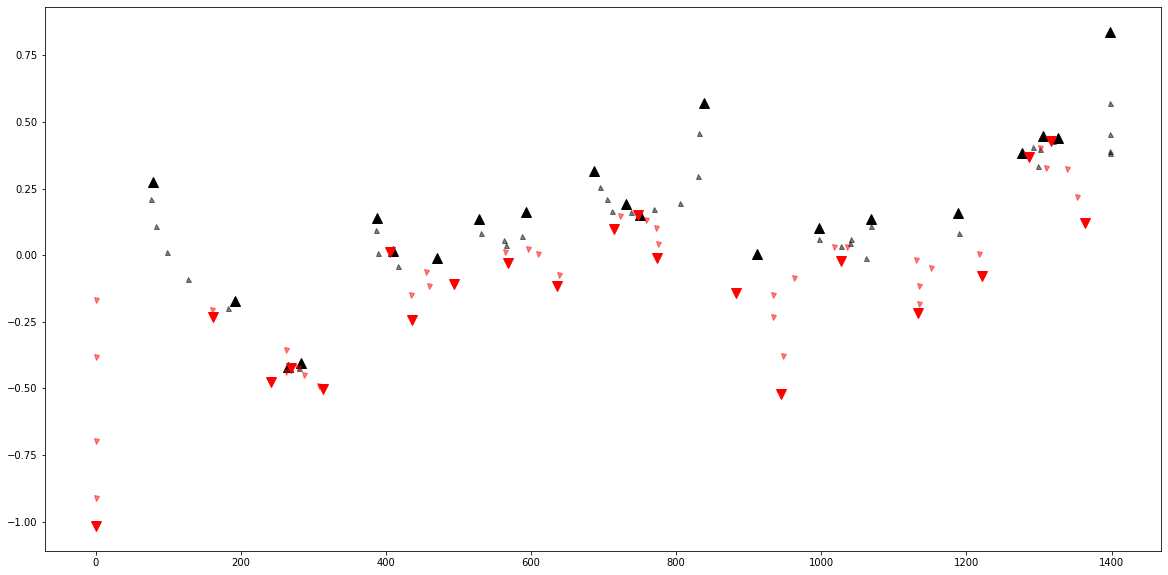

In [68]:
# plt.close()

temp_df = corpora_lowess_dt['cdickens_achristmascarol::vader_z']

plt.plot(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z']['max_20'], 'k^', markersize=10)
# df[~np.isnan(df)]
# plt.vlines()
plt.plot(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z']['max_15'], 'k^', markersize=5, alpha=.5)
plt.plot(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z']['max_10'], 'k^', markersize=5, alpha=.5)
plt.plot(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z']['max_7'], 'k^', markersize=5, alpha=.5)
plt.plot(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z']['max_5'], 'k^', markersize=5, alpha=.5)

plt.plot(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z']['min_20'], 'rv', markersize=10)
plt.plot(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z']['min_15'], 'rv', markersize=5, alpha=.5)
plt.plot(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z']['min_10'], 'rv', markersize=5, alpha=.5)
plt.plot(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z']['min_7'], 'rv', markersize=5, alpha=.5)
plt.plot(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z']['min_5'], 'rv', markersize=5, alpha=.5);

# plt.tight_layout()
# plt.grid(True, alpha=0.3)
# plt.show();

### **Segment by High-Res Crux Points**

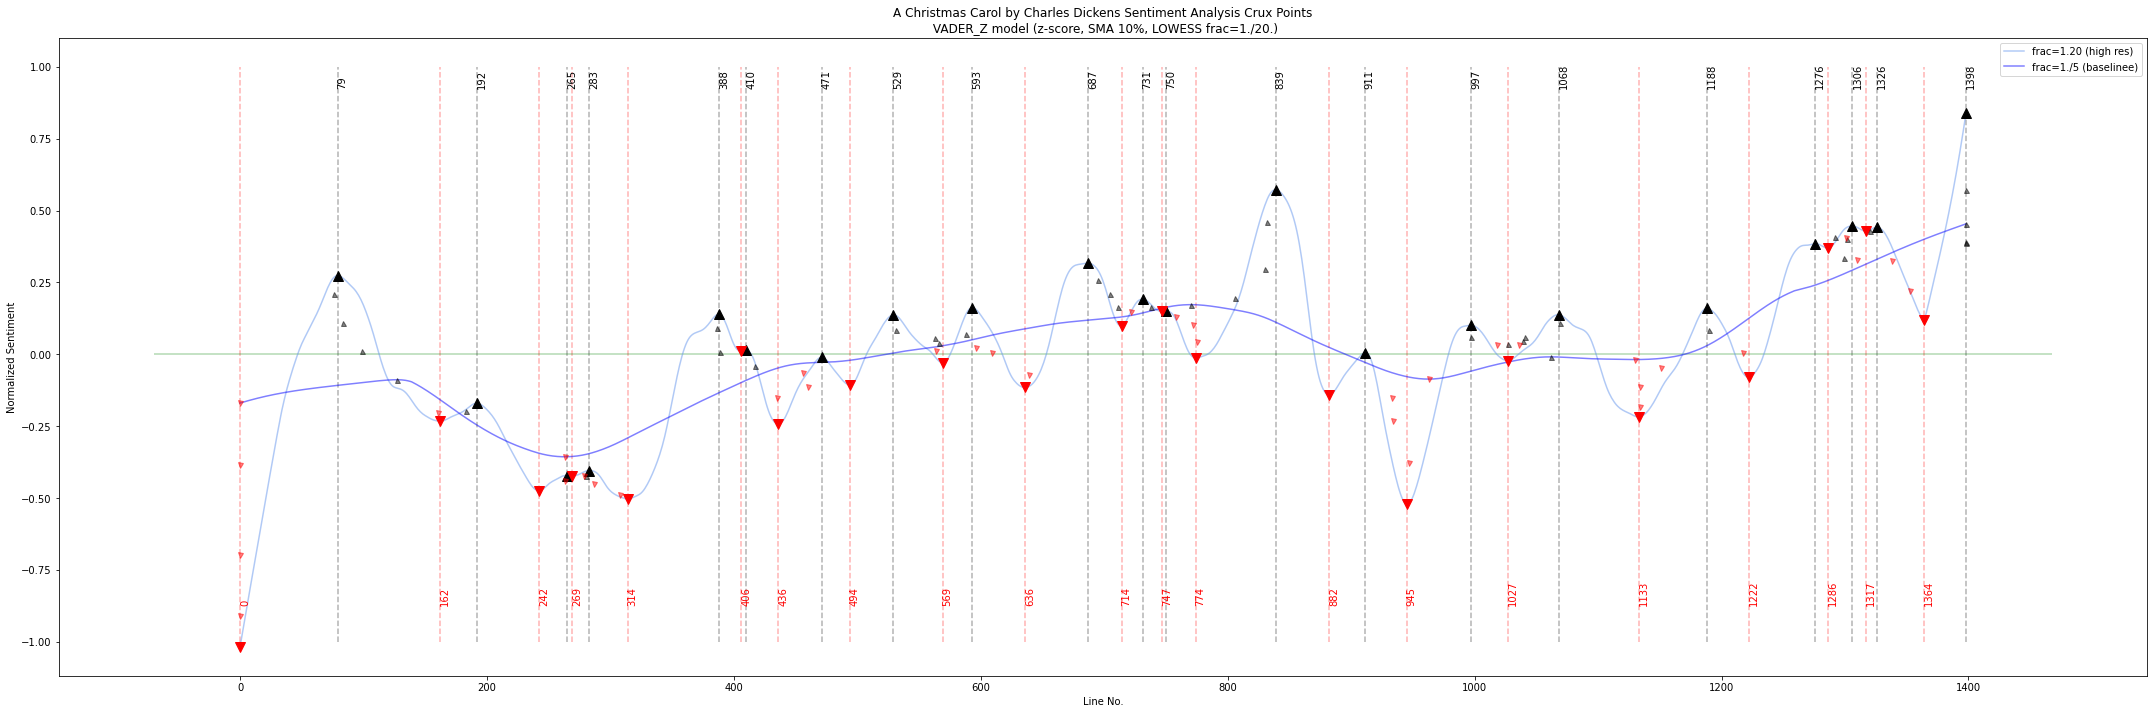

In [69]:

plt.rcParams["figure.figsize"] = (30, 10)

corpus_model = 'cdickens_achristmascarol::vader_z'
corpus_key = corpus_model.split('::')[0]
model_key = corpus_model.split('::')[1]
corpus_title = corpora_full_dt[corpus_key]

save_plot = True

temp_df = corpora_lowess_dt[corpus_model]

plt.plot(temp_df['lowess_20'], alpha=0.5, color='cornflowerblue', label='frac=1.20 (high res)')
plt.plot(temp_df['lowess_5'], alpha=0.5, color='blue', label='frac=1./5 (baselinee)')

plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_20'], 'k^', markersize=10)
ymin, ymax = plt.ylim()

# Crux Maximum x coordinates for vlines
# Get all the x coord for the max Cruxes
crux_max_x20_vals_ls = []
for idx, arow in temp_df.iterrows():
  if pd.isna(arow['max_20']): #  == np.nan():
    pass;
  else:
    crux_max_x20_vals_ls.append(idx)
# Plot all the vlines at x vals of max Cruxes
for i,acrux_x20_val in enumerate(crux_max_x20_vals_ls):
  plt.vlines(acrux_x20_val, -1, 1, colors='k', linestyles='dashed', alpha=0.3)
  plt.annotate(acrux_x20_val, xy=(acrux_x20_val,ymax), rotation=90, color='k')

# ax0.annotate('BigNews1', xy=('2017-07-02 16:30:00', ymax), xytext=(-10, 25), textcoords='offset points',
#              rotation=90, va='bottom', ha='center', annotation_clip=False, arrowprops=arrowprops)

plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_20'], 'rv', markersize=10)
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()

# Crux Minimum x coordinates for vlines
# Get all the x coord for the min Cruxes
crux_min_x20_vals_ls = []
crux_min_x20_vals_ls = []
for idx, arow in temp_df.iterrows():
  if pd.isna(arow['min_20']): #  == np.nan():
    pass;
  else:
    crux_min_x20_vals_ls.append(idx)
# Plot all the vlines at x vals of min Cruxes
for i,acrux_x20_val in enumerate(crux_min_x20_vals_ls):
  plt.vlines(acrux_x20_val, -1, 1, colors='r', linestyles='dashed', alpha=0.3)
  plt.annotate(acrux_x20_val, xy=(acrux_x20_val,ymin+0.25), rotation=90, color='r')

plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_15'], 'k^', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_10'], 'k^', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_7'], 'k^', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_5'], 'k^', markersize=5, alpha=.5)

plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_15'], 'rv', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_10'], 'rv', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_7'], 'rv', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_5'], 'rv', markersize=5, alpha=.5)

plt.legend(loc='best')
# plt.grid(True, alpha=0.3)
plt.hlines(y=0, xmin=xmin, xmax=xmax, linestyles='solid', color='g', alpha=0.3)
plt.title(f'{corpus_title} Sentiment Analysis Crux Points\n {model_key.upper()} model (z-score, SMA 10%, LOWESS frac=1./20.)')
plt.xlabel('Line No.')
plt.ylabel('Normalized Sentiment')
plt.tight_layout(True)
plt.show();

Crux Point Detection Algo
0. Input: z-score(standardized)/SMA 10%(smoothed) sentiment time series
1. Hyperparam: frac=[high-res frac - baseline frac], crux_halfwin
2. Detect all Cruxes
3. Segment TS by highest resolution LOWESS (hrCrux)
4. Correct for endpoints
5. Delete adjacent cruxes of diff direction if too close (crux_sep_min) (save deleted (2)crux pair to anomalies_ls)
6. Merge adjacent cruxes of same direction (save deleted (1)crux as anomalies_ls)
7. hrCrux_height = abs(hrCrux - baseCrux)

7. hrCrux_adjacent_ct = Sum(Crux-same dir) adjacent to high-res Cruxes (save temporal mean/std)
8. hrCrux_agree_per = Percent, Sum(Crux-same dir > Crux-base)/hrCrux_adjacent_ct
9. hrCrux_agree_deg = Degree, Norm(Sum(Dist(Crux-same dir - Crux-base))) (save value mean/std) (non-linear normalization, sigma fn?)
10. Crux vs Anomaly classifier hyperparameters/thresholds (Quant def of Anomaly)
11. Retrieve context around Crux/Anomaly points for human verification/annotation

In [70]:
corpus_model = 'cdickens_achristmascarol::vader_z'

corpora_lowess_dt[corpus_model].iloc[260:270].head(10)

lowess_20    min_20    max_20  lowess_15  ...  max_7  lowess_5     min_5  max_5
260  -0.425200       NaN       NaN  -0.439093  ...    NaN -0.355751       NaN    NaN
261  -0.423469       NaN       NaN  -0.439291  ...    NaN -0.355893       NaN    NaN
262  -0.422259       NaN       NaN  -0.439407  ...    NaN -0.355980       NaN    NaN
263  -0.421530       NaN       NaN  -0.439441  ...    NaN -0.356011 -0.356011    NaN
264  -0.421192       NaN       NaN  -0.439396  ...    NaN -0.355987       NaN    NaN
265  -0.421166       NaN -0.421166  -0.439260  ...    NaN -0.355907       NaN    NaN
266  -0.421358       NaN       NaN  -0.439010  ...    NaN -0.355772       NaN    NaN
267  -0.421737       NaN       NaN  -0.438613  ...    NaN -0.355581       NaN    NaN
268  -0.422167       NaN       NaN  -0.438026  ...    NaN -0.355334       NaN    NaN
269  -0.422412 -0.422412       NaN  -0.437235  ...    NaN -0.355030       NaN    NaN

[10 rows x 15 columns]

In [71]:
list(range(131, 137))

[131, 132, 133, 134, 135, 136]

### **Merge adjacent Min/Max Crux points closer than min_dist**

In [72]:
# Global Save merged cruxes

crux_merged_dt = {}

In [73]:
def merge_cruxes(a_df, col_ls=['min_20','max_20'], min_dist=10):
  '''
  Given a DataFrame, (2) Column names (Min/Max) and a minimum distance between adjacent Min/Max
  Return a modified DataFrame that merges/deletes adjacent Min/Max Cruxes that are too close to each other

  TODO: Make it bidirectional and delete smaller if two-sided
  '''

  temp_df = a_df.copy(deep=True)

  crux_del_pair_dt = {}

  min_ls = a_df[col_ls[0]]
  max_ls = a_df[col_ls[1]]
  # print(f'max_ls: {max_ls[:10]}')

  min_del_ls = []
  max_del_ls = []
  # iterate over every value in min_ls
  # check for any notna() max_ls values within window of (1 + 2*min_dist) of min_ls notna() value
  for min_idx,min_val in enumerate(min_ls):
    if pd.isna(min_val): #  == np.nan:
      # print(f'min[{min_idx}] is nan')
      continue
    else:
      win_start = max(0, min_idx-min_dist)
      win_end = min(min_idx+min_dist, len(max_ls))
      print(f'Searcing window [{win_start} to {win_end}] around Crux point: {min_idx}')
      win_idx = list(range(win_start, win_end))
      for max_idx, max_val in enumerate(max_ls[win_idx]):
        if pd.isna(max_val): #  == np.nan:  # .isna():
          continue
        else:
          min_del_ls.append(min_idx)
          max_del_ls.append(win_start+max_idx)


  # crux_del_pair_dt['min'] = min_del_ls  20_min
  # crux_del_pair_dt['max'] = max_del_ls

  print(f'Delete Min Crux at indicies: {min_del_ls}')
  print(f'Delete Max Crux at indicies: {max_del_ls}')

  crux_merged_ls = list(zip(min_del_ls, max_del_ls))

  # a_df.iloc[min_del_ls][col_ls[0]] = np.nan # [np.nan]*len(min_del_ls)
  # a_df.iloc[max_del_ls][col_ls[1]] = np.nan # [np.nan]*len(max_del_ls)

  # Merge Min/Max pairs by setting pairs too close to NaN
  for min_idx in min_del_ls:
    temp_df.iloc[min_idx]['min_20'] = np.nan
  for max_idx in max_del_ls:
    temp_df.iloc[max_idx]['max_20'] = np.nan


  # for idx, row in temp_df.iterrows():
  #   print(row)

  return temp_df, crux_merged_ls

In [74]:
# Global

# crux_merged_dt = {}

In [75]:
# Test

corpus_model = 'cdickens_achristmascarol::vader_z'
corpus_key = corpus_model.split('::')[0]
model_key = corpus_model.split('::')[1]
corpus_title = corpora_full_dt[corpus_key]

temp_df = corpora_lowess_dt[corpus_model]

print('\nBefore Merging:\n====================\n')
temp_df.iloc[260:270].head(10)

print('\nAfter Merging:\n====================\n')
temp2_df, crux_merged_ls = merge_cruxes(temp_df, col_ls=['min_20','max_20'], min_dist=10)

crux_merged_dt[corpus_model] = crux_merged_ls

# temp2_df.iloc[260:270].head(10)



Before Merging:



lowess_20    min_20    max_20  lowess_15  ...  max_7  lowess_5     min_5  max_5
260  -0.425200       NaN       NaN  -0.439093  ...    NaN -0.355751       NaN    NaN
261  -0.423469       NaN       NaN  -0.439291  ...    NaN -0.355893       NaN    NaN
262  -0.422259       NaN       NaN  -0.439407  ...    NaN -0.355980       NaN    NaN
263  -0.421530       NaN       NaN  -0.439441  ...    NaN -0.356011 -0.356011    NaN
264  -0.421192       NaN       NaN  -0.439396  ...    NaN -0.355987       NaN    NaN
265  -0.421166       NaN -0.421166  -0.439260  ...    NaN -0.355907       NaN    NaN
266  -0.421358       NaN       NaN  -0.439010  ...    NaN -0.355772       NaN    NaN
267  -0.421737       NaN       NaN  -0.438613  ...    NaN -0.355581       NaN    NaN
268  -0.422167       NaN       NaN  -0.438026  ...    NaN -0.355334       NaN    NaN
269  -0.422412 -0.422412       NaN  -0.437235  ...    NaN -0.355030       NaN    NaN

[10 rows x 15 columns]


After Merging:

Searcing window [0 to 10] around Crux point: 0
Searcing window [152 to 172] around Crux point: 162
Searcing window [232 to 252] around Crux point: 242
Searcing window [259 to 279] around Crux point: 269
Searcing window [304 to 324] around Crux point: 314
Searcing window [396 to 416] around Crux point: 406
Searcing window [426 to 446] around Crux point: 436
Searcing window [484 to 504] around Crux point: 494
Searcing window [559 to 579] around Crux point: 569
Searcing window [626 to 646] around Crux point: 636
Searcing window [704 to 724] around Crux point: 714
Searcing window [737 to 757] around Crux point: 747
Searcing window [764 to 784] around Crux point: 774
Searcing window [872 to 892] around Crux point: 882
Searcing window [935 to 955] around Crux point: 945
Searcing window [1017 to 1037] around Crux point: 1027
Searcing window [1123 to 1143] around Crux point: 1133
Searcing window [1212 to 1232] around Crux point: 1222
Searcing window [1276 to 1296] around Crux 

In [76]:
crux_merged_ls

[(269, 265), (406, 410), (747, 750), (1286, 1276), (1317, 1326)]

In [77]:
temp2_df.head()

lowess_20    min_20  max_20  lowess_15  ...  max_7  lowess_5    min_5  max_5
0  -1.016804 -1.016804     NaN  -0.910562  ...    NaN -0.169290 -0.16929    NaN
1  -0.991668       NaN     NaN  -0.890448  ...    NaN -0.167990      NaN    NaN
2  -0.966605       NaN     NaN  -0.870409  ...    NaN -0.166706      NaN    NaN
3  -0.941613       NaN     NaN  -0.850444  ...    NaN -0.165440      NaN    NaN
4  -0.916682       NaN     NaN  -0.830552  ...    NaN -0.164190      NaN    NaN

[5 rows x 15 columns]

In [78]:
temp2_df.iloc[260:270][['min_20','max_20']]

min_20  max_20
260     NaN     NaN
261     NaN     NaN
262     NaN     NaN
263     NaN     NaN
264     NaN     NaN
265     NaN     NaN
266     NaN     NaN
267     NaN     NaN
268     NaN     NaN
269     NaN     NaN

In [79]:
corpora_lowess_dt[corpus_model]['min_20'] = temp2_df['min_20']
corpora_lowess_dt[corpus_model]['max_20'] = temp2_df['max_20']

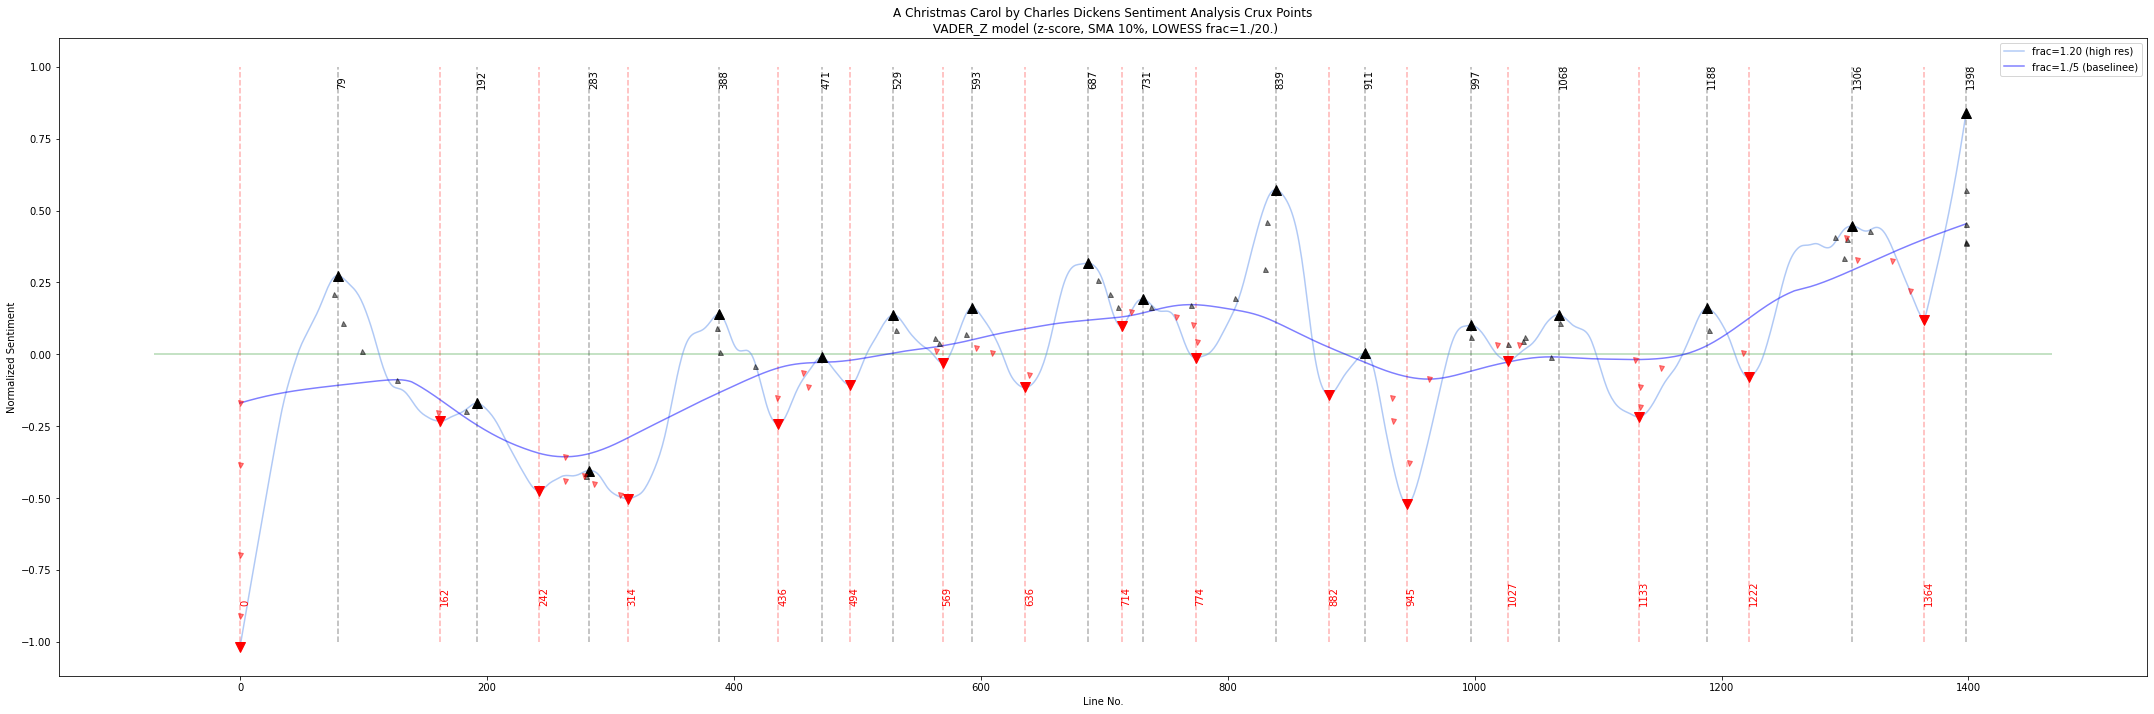

In [80]:

plt.rcParams["figure.figsize"] = (30, 10)

corpus_model = 'cdickens_achristmascarol::vader_z'
corpus_key = corpus_model.split('::')[0]
model_key = corpus_model.split('::')[1]
corpus_title = corpora_full_dt[corpus_key]

save_plot = True

temp_df = corpora_lowess_dt[corpus_model]
# temp_df = temp2_df

plt.plot(temp_df['lowess_20'], alpha=0.5, color='cornflowerblue', label='frac=1.20 (high res)')
plt.plot(temp_df['lowess_5'], alpha=0.5, color='blue', label='frac=1./5 (baselinee)')

plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_20'], 'k^', markersize=10)
ymin, ymax = plt.ylim()

# Crux Maximum x coordinates for vlines
# Get all the x coord for the max Cruxes
crux_max_x20_vals_ls = []
for idx, arow in temp_df.iterrows():
  if pd.isna(arow['max_20']): #  == np.nan():
    pass;
  else:
    crux_max_x20_vals_ls.append(idx)
# Plot all the vlines at x vals of max Cruxes
for i,acrux_x20_val in enumerate(crux_max_x20_vals_ls):
  plt.vlines(acrux_x20_val, -1, 1, colors='k', linestyles='dashed', alpha=0.3)
  plt.annotate(acrux_x20_val, xy=(acrux_x20_val,ymax), rotation=90, color='k')

# ax0.annotate('BigNews1', xy=('2017-07-02 16:30:00', ymax), xytext=(-10, 25), textcoords='offset points',
#              rotation=90, va='bottom', ha='center', annotation_clip=False, arrowprops=arrowprops)

plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_20'], 'rv', markersize=10)
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()

# Crux Minimum x coordinates for vlines
# Get all the x coord for the min Cruxes
crux_min_x20_vals_ls = []
crux_min_x20_vals_ls = []
for idx, arow in temp_df.iterrows():
  if pd.isna(arow['min_20']): #  == np.nan():
    pass;
  else:
    crux_min_x20_vals_ls.append(idx)
# Plot all the vlines at x vals of min Cruxes
for i,acrux_x20_val in enumerate(crux_min_x20_vals_ls):
  plt.vlines(acrux_x20_val, -1, 1, colors='r', linestyles='dashed', alpha=0.3)
  plt.annotate(acrux_x20_val, xy=(acrux_x20_val,ymin+0.25), rotation=90, color='r')

plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_15'], 'k^', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_10'], 'k^', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_7'], 'k^', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_5'], 'k^', markersize=5, alpha=.5)

plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_15'], 'rv', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_10'], 'rv', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_7'], 'rv', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_5'], 'rv', markersize=5, alpha=.5)

plt.legend(loc='best')
# plt.grid(True, alpha=0.3)
plt.hlines(y=0, xmin=xmin, xmax=xmax, linestyles='solid', color='g', alpha=0.3)
plt.title(f'{corpus_title} Sentiment Analysis Crux Points\n {model_key.upper()} model (z-score, SMA 10%, LOWESS frac=1./20.)')
plt.xlabel('Line No.')
plt.ylabel('Normalized Sentiment')
plt.tight_layout(True)
plt.show();

### **hrCrux Height**

* hrCrux_height = abs(hrCrux - baseCrux)

In [81]:
corpora_lowess_dt[corpus_model].head()

lowess_20    min_20  max_20  lowess_15  ...  max_7  lowess_5    min_5  max_5
0  -1.016804 -1.016804     NaN  -0.910562  ...    NaN -0.169290 -0.16929    NaN
1  -0.991668       NaN     NaN  -0.890448  ...    NaN -0.167990      NaN    NaN
2  -0.966605       NaN     NaN  -0.870409  ...    NaN -0.166706      NaN    NaN
3  -0.941613       NaN     NaN  -0.850444  ...    NaN -0.165440      NaN    NaN
4  -0.916682       NaN     NaN  -0.830552  ...    NaN -0.164190      NaN    NaN

[5 rows x 15 columns]

In [82]:
# Global

crux_feats_df = pd.DataFrame()

In [83]:
temp_df = corpora_lowess_dt[corpus_model]

crux_min_feats_df = pd.DataFrame()
crux_max_feats_df = pd.DataFrame()

# Calculate abs(heights) for Crux Min from Baseline
crux_min_idx_ls = temp_df[temp_df['min_20'].notnull()]['min_20'].index
# crux_min_idx_ls
crux_min_feats_df['line_no'] = crux_min_idx_ls
crux_min_feats_df['type'] = ['min']*len(crux_min_idx_ls)

height_ls = abs(temp_df.iloc[crux_min_idx_ls]['lowess_20'] - temp_df.iloc[crux_min_idx_ls]['lowess_5']).to_list()
# height_ls
crux_min_feats_df['height'] = pd.Series(height_ls)
# crux_min_feats_df.head()

# crux_min_height_df = pd.DataFrame(crux_min_idx_ls, columns=['line_no'])
# crux_min_height_ser = abs(temp_df.iloc[crux_min_idx_ls]['lowess_20'] - temp_df.iloc[crux_min_idx_ls]['lowess_5'])
# crux_min_height_df['height'] = crux_min_height_ser
# crux_min_height_df.head()

# crux_min_feats_df['crux_height'] = abs(temp_df.iloc[crux_min_idx_ls]['lowess_20'] - temp_df.iloc[crux_min_idx_ls]['lowess_5'])
# crux_min_feats_df['crux_height'] = crux_min_height_df.apply(lambda x: abs(x.lowess_20 - x.lowess_5))
# crux_min_feats_df.head()

# crux_min_feats_df['crux_height'] = abs(temp_df.iloc[crux_min_idx_ls]['lowess_20'] - temp_df.iloc[crux_min_idx_ls]['lowess_5'])
# print(f'crux_min_feats_df.crux_height: {crux_min_feats_df.crux_height}')
# crux_min_feats_df.head()

# Calculate abs(heights) for Crux Max from Baseline
crux_max_idx_ls = temp_df[temp_df['max_20'].notnull()]['max_20'].index
# crux_max_idx_ls
crux_max_feats_df['line_no'] = crux_max_idx_ls
crux_max_feats_df['type'] = ['max']*len(crux_max_idx_ls)

height_ls = abs(temp_df.iloc[crux_max_idx_ls]['lowess_20'] - temp_df.iloc[crux_max_idx_ls]['lowess_5']).to_list()
# height_ls
crux_max_feats_df['height'] = pd.Series(height_ls)
# crux_max_feats_df.head()

crux_feats_df = crux_min_feats_df.append(crux_max_feats_df, ignore_index=True)
crux_feats_df.head()
crux_feats_df.info()

line_no type    height
0        0  min  0.847515
1      162  min  0.074248
2      242  min  0.130430
3      314  min  0.211609
4      436  min  0.194605

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   line_no  32 non-null     int64  
 1   type     32 non-null     object 
 2   height   32 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 896.0+ bytes


In [84]:
crux_feats_df.head()
crux_feats_df.tail()

line_no type    height
0        0  min  0.847515
1      162  min  0.074248
2      242  min  0.130430
3      314  min  0.211609
4      436  min  0.194605

line_no type    height
27      997  max  0.159400
28     1068  max  0.147132
29     1188  max  0.129832
30     1306  max  0.153523
31     1398  max  0.384705

In [85]:
crux_feats_df.sort_values(by='height', ascending=False, inplace=True)

In [86]:
crux_feats_df.head()

line_no type    height
0         0  min  0.847515
25      839  max  0.460519
11      945  min  0.442837
31     1398  max  0.384705
16       79  max  0.381993

### **hrCrux Adjacent Count**

* hrCrux_adjcent_ct = Sum(Crux-same dir) adjacent to high-res Cruxes (save temporal mean/std)

In [87]:
crux_feats_df.sort_values(by='line_no', ascending=True, inplace=True)
crux_feats_df.head(10)
crux_div_ls = crux_feats_df['line_no'].to_list()
crux_div_ls

line_no type    height
0         0  min  0.847515
16       79  max  0.381993
1       162  min  0.074248
17      192  max  0.075958
2       242  min  0.130430
18      283  max  0.059145
3       314  min  0.211609
19      388  max  0.272375
4       436  min  0.194605
20      471  max  0.017236

[0,
 79,
 162,
 192,
 242,
 283,
 314,
 388,
 436,
 471,
 494,
 529,
 569,
 593,
 636,
 687,
 714,
 731,
 774,
 839,
 882,
 911,
 945,
 997,
 1027,
 1068,
 1133,
 1188,
 1222,
 1306,
 1364,
 1398]

In [88]:
corpus_model = 'cdickens_achristmascarol::vader_z'
corpus_key = corpus_model.split('::')[0]
model_key = corpus_model.split('::')[1]
corpus_title = corpora_full_dt[corpus_key]

save_plot = True

temp_df = corpora_lowess_dt[corpus_model]
temp_df.head()

lowess_20    min_20  max_20  lowess_15  ...  max_7  lowess_5    min_5  max_5
0  -1.016804 -1.016804     NaN  -0.910562  ...    NaN -0.169290 -0.16929    NaN
1  -0.991668       NaN     NaN  -0.890448  ...    NaN -0.167990      NaN    NaN
2  -0.966605       NaN     NaN  -0.870409  ...    NaN -0.166706      NaN    NaN
3  -0.941613       NaN     NaN  -0.850444  ...    NaN -0.165440      NaN    NaN
4  -0.916682       NaN     NaN  -0.830552  ...    NaN -0.164190      NaN    NaN

[5 rows x 15 columns]

In [89]:
temp_ls = []
for x in crux_div_ls:
  temp_ls.append(x)
print(temp_ls)

[0, 79, 162, 192, 242, 283, 314, 388, 436, 471, 494, 529, 569, 593, 636, 687, 714, 731, 774, 839, 882, 911, 945, 997, 1027, 1068, 1133, 1188, 1222, 1306, 1364, 1398]


In [90]:
temp_ls[-1]

1398

In [91]:
crux_feats_df.head()

line_no type    height
0         0  min  0.847515
16       79  max  0.381993
1       162  min  0.074248
17      192  max  0.075958
2       242  min  0.130430

In [92]:
temp_df = corpora_lowess_dt[corpus_model]
temp_df.head()

lowess_20    min_20  max_20  lowess_15  ...  max_7  lowess_5    min_5  max_5
0  -1.016804 -1.016804     NaN  -0.910562  ...    NaN -0.169290 -0.16929    NaN
1  -0.991668       NaN     NaN  -0.890448  ...    NaN -0.167990      NaN    NaN
2  -0.966605       NaN     NaN  -0.870409  ...    NaN -0.166706      NaN    NaN
3  -0.941613       NaN     NaN  -0.850444  ...    NaN -0.165440      NaN    NaN
4  -0.916682       NaN     NaN  -0.830552  ...    NaN -0.164190      NaN    NaN

[5 rows x 15 columns]

In [93]:
frac_ls

[0.05, 0.06666666666666667, 0.1, 0.14285714285714285, 0.2]

In [95]:
pd.isna(temp_df.iloc[crux_feats_df.iloc[1]['line_no']]['min_20'])
pd.isna(temp_df.iloc[crux_feats_df.iloc[1]['line_no']]['max_20']) # == np.nan

True

False

In [96]:
# Sum the secondary peaks of the same type (max/min) in both prev/next neighborhoods
#   where adjacent neighborhood is defined by primary peak min/max vertical lines

temp_df = corpora_lowess_dt[corpus_model]

subcrux_ls = []

win_start=0
win_end=len(crux_div_ls)

# Determine the start/end of the adjacent neighborhood boundries (x-axis values)
for i in range(len(crux_div_ls)-1):
  crux_line_no = crux_div_ls[i]
  if i == 0:
    win_start = 0
    win_end = crux_div_ls[1] - 1
  elif i == len(crux_div_ls):
    win_start = crux_div_ls[-2] + 1
    win_end = crux_div_ls[-1]
  else:
    win_start = crux_div_ls[i-1] + 1
    win_end = crux_div_ls[i+1] - 1

  # Determine the central Crux type
  if pd.isna(temp_df.iloc[crux_feats_df.iloc[i]['line_no']]['min_20']):
    if pd.isna(temp_df.iloc[crux_feats_df.iloc[i]['line_no']]['max_20']):
      pass
    else:
      crux_type = 'max'
  else:
    crux_type = 'min'

  print(f'Neighborhood of {crux_type}: [{win_start} <- {crux_div_ls[i]} -> {win_end}]')

  subcrux_min_ct = 0
  subcrux_max_ct = 0
  for afrac in [20, 15, 10, 7, 5]:
    min_key = f'min_{str(int(afrac))}'
    max_key = f'max_{str(int(afrac))}'

    for idx, arow in temp_df.iloc[win_start:win_end].iterrows():
      if not pd.isna(arow[min_key]):
        subcrux_min_ct += 1
        print(f'  Found Min (afrac:{afrac}, idx:{idx}')
      if not pd.isna(arow[max_key]):
        subcrux_max_ct += 1
        print(f'  Found Max (afrac:{afrac}, idx:{idx}')

  # Adjust by subtracting self
  subcrux_min_ct -= 1
  subcrux_max_ct -= 1

  if crux_type == 'min':
    print(f'{crux_type.capitalize()} Crux #{i} has {subcrux_min_ct} Min sub-Cruxes')
    subcrux_ct = subcrux_min_ct
  else:
    print(f'{crux_type.capitalize()} Crux #{i} has {subcrux_max_ct} Max sub-Cruxes')
    subcrux_ct = subcrux_max_ct

  subcrux_ls.append((crux_line_no, subcrux_ct))

  print('\n')

# Create a dataframe of crux_line_no and subcrux_ct
subcrux_df = pd.DataFrame(subcrux_ls, columns =['line_no', 'subcrux_ct'])
subcrux_df.head()
subcrux_df.info()

# crux_feats_df.loc[crux_feats_df.line_no == crux_line_no]['subcruxes'] = subcrux_ct
# crux_feats_df.loc[crux_feats_df.line_no == i]['subcrux_ct'] = pd.Series(subcrux_ls)

crux_feats_df.head()
crux_feats_df.info()

crux_feats2_df = pd.merge(crux_feats_df, subcrux_df, on='line_no', how='inner')

# This may cause error
crux_feats2_df.drop(columns=['subcrux_ct_x'], inplace=True)
crux_feats2_df.rename(columns={'subcrux_ct_y':'subcrux_ct'}, inplace=True)
crux_feats2_df.head()
crux_feats2_df.info()


Neighborhood of min: [0 <- 0 -> 78]
  Found Min (afrac:20, idx:0
  Found Min (afrac:15, idx:0
  Found Max (afrac:15, idx:76
  Found Min (afrac:10, idx:0
  Found Min (afrac:7, idx:0
  Found Min (afrac:5, idx:0
Min Crux #0 has 4 Min sub-Cruxes


Neighborhood of max: [1 <- 79 -> 161]
  Found Max (afrac:20, idx:79
  Found Max (afrac:15, idx:76
  Found Min (afrac:15, idx:160
  Found Max (afrac:10, idx:83
  Found Max (afrac:7, idx:99
  Found Max (afrac:5, idx:127
Max Crux #1 has 4 Max sub-Cruxes


Neighborhood of min: [80 <- 162 -> 191]
  Found Min (afrac:20, idx:162
  Found Min (afrac:15, idx:160
  Found Max (afrac:15, idx:183
  Found Max (afrac:10, idx:83
  Found Max (afrac:7, idx:99
  Found Max (afrac:5, idx:127
Min Crux #2 has 1 Min sub-Cruxes


Neighborhood of max: [163 <- 192 -> 241]
  Found Max (afrac:20, idx:192
  Found Max (afrac:15, idx:183
Max Crux #3 has 1 Max sub-Cruxes


Neighborhood of min: [193 <- 242 -> 282]
  Found Min (afrac:20, idx:242
  Found Min (afrac:15, idx:263
  Fou

line_no  subcrux_ct
0        0           4
1       79           4
2      162           1
3      192           1
4      242           3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   line_no     31 non-null     int64
 1   subcrux_ct  31 non-null     int64
dtypes: int64(2)
memory usage: 624.0 bytes


line_no type    height
0         0  min  0.847515
16       79  max  0.381993
1       162  min  0.074248
17      192  max  0.075958
2       242  min  0.130430

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   line_no  32 non-null     int64  
 1   type     32 non-null     object 
 2   height   32 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ KB


KeyError: ignored

In [97]:
subcrux_ls[:5]

[(0, 4), (79, 4), (162, 1), (192, 1), (242, 3)]

In [98]:
crux_feats2_df.head()

line_no type    height  subcrux_ct
0        0  min  0.847515           4
1       79  max  0.381993           4
2      162  min  0.074248           1
3      192  max  0.075958           1
4      242  min  0.130430           3

### **hrCrux Agree Percent**

* hrCrux_agree_per = Percent, Sum(Crux-same dir > Crux-base)/hrCrux_adjacent_ct

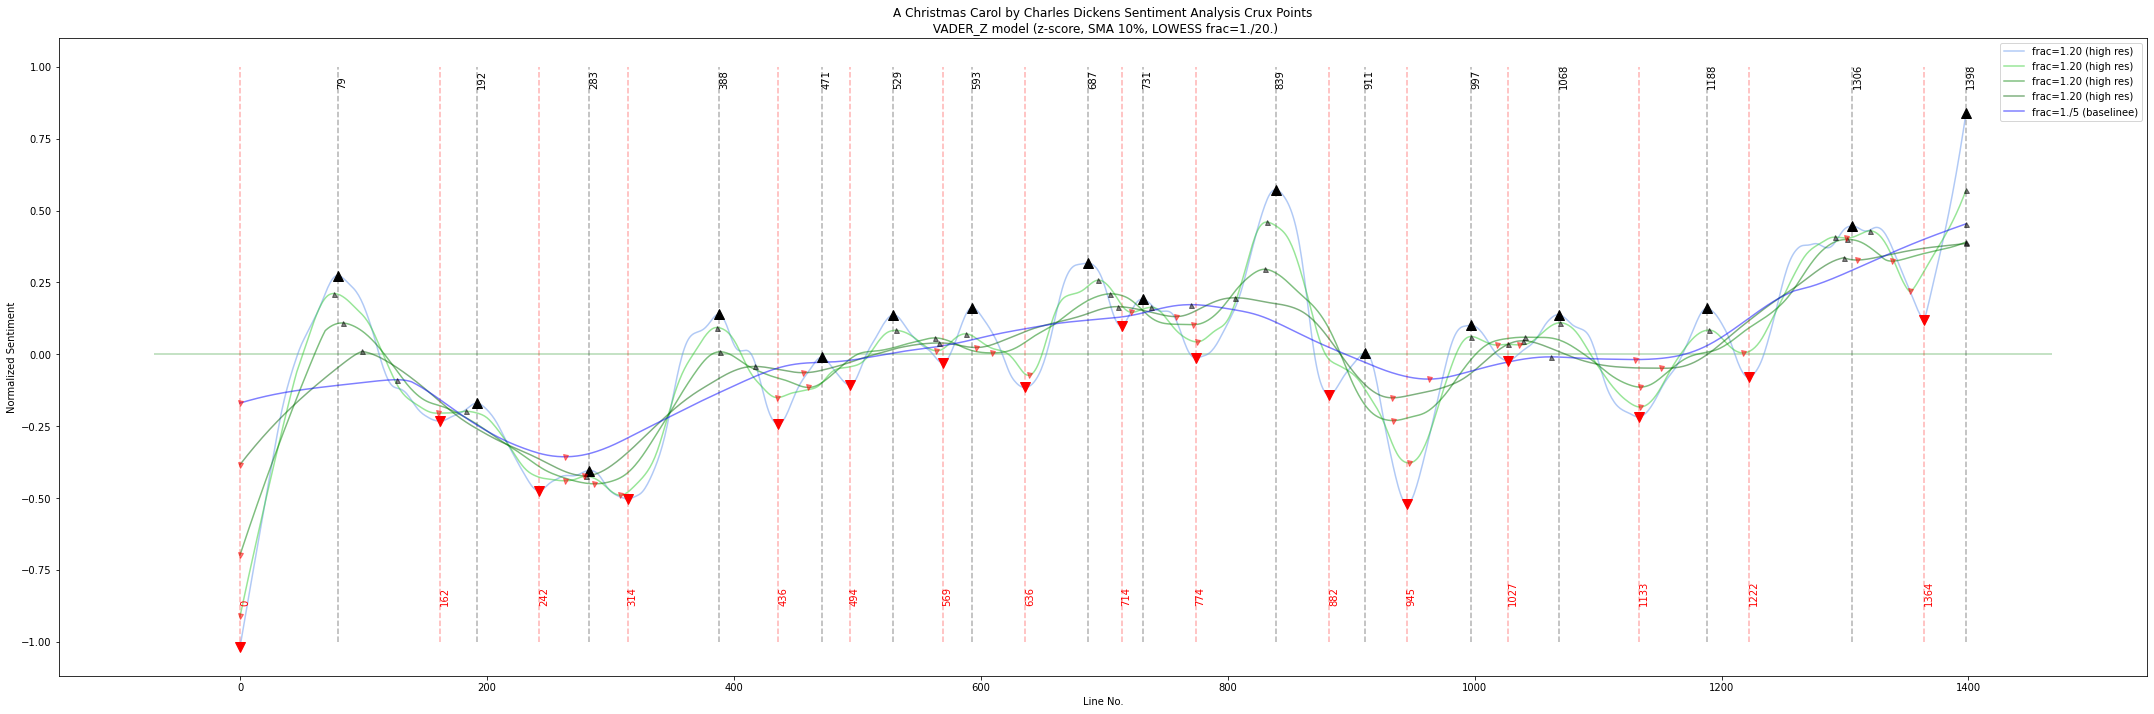

In [99]:

plt.rcParams["figure.figsize"] = (30, 10)

corpus_model = 'cdickens_achristmascarol::vader_z'
corpus_key = corpus_model.split('::')[0]
model_key = corpus_model.split('::')[1]
corpus_title = corpora_full_dt[corpus_key]

save_plot = True

temp_df = corpora_lowess_dt[corpus_model]
# temp_df = temp2_df

plt.plot(temp_df['lowess_20'], alpha=0.5, color='cornflowerblue', label='frac=1.20 (high res)')
plt.plot(temp_df['lowess_15'], alpha=0.5, color='limegreen', label='frac=1.20 (high res)')
plt.plot(temp_df['lowess_10'], alpha=0.5, color='green', label='frac=1.20 (high res)')
plt.plot(temp_df['lowess_7'], alpha=0.5, color='darkgreen', label='frac=1.20 (high res)')
plt.plot(temp_df['lowess_5'], alpha=0.5, color='blue', label='frac=1./5 (baselinee)')

plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_20'], 'k^', markersize=10)
ymin, ymax = plt.ylim()

# Crux Maximum x coordinates for vlines
# Get all the x coord for the max Cruxes
crux_max_x20_vals_ls = []
for idx, arow in temp_df.iterrows():
  if pd.isna(arow['max_20']): #  == np.nan():
    pass;
  else:
    crux_max_x20_vals_ls.append(idx)
# Plot all the vlines at x vals of max Cruxes
for i,acrux_x20_val in enumerate(crux_max_x20_vals_ls):
  plt.vlines(acrux_x20_val, -1, 1, colors='k', linestyles='dashed', alpha=0.3)
  plt.annotate(acrux_x20_val, xy=(acrux_x20_val,ymax), rotation=90, color='k')

# ax0.annotate('BigNews1', xy=('2017-07-02 16:30:00', ymax), xytext=(-10, 25), textcoords='offset points',
#              rotation=90, va='bottom', ha='center', annotation_clip=False, arrowprops=arrowprops)

plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_20'], 'rv', markersize=10)
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()

# Crux Minimum x coordinates for vlines
# Get all the x coord for the min Cruxes
crux_min_x20_vals_ls = []
crux_min_x20_vals_ls = []
for idx, arow in temp_df.iterrows():
  if pd.isna(arow['min_20']): #  == np.nan():
    pass;
  else:
    crux_min_x20_vals_ls.append(idx)
# Plot all the vlines at x vals of min Cruxes
for i,acrux_x20_val in enumerate(crux_min_x20_vals_ls):
  plt.vlines(acrux_x20_val, -1, 1, colors='r', linestyles='dashed', alpha=0.3)
  plt.annotate(acrux_x20_val, xy=(acrux_x20_val,ymin+0.25), rotation=90, color='r')

plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_15'], 'k^', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_10'], 'k^', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_7'], 'k^', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['max_5'], 'k^', markersize=5, alpha=.5)

plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_15'], 'rv', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_10'], 'rv', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_7'], 'rv', markersize=5, alpha=.5)
plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['min_5'], 'rv', markersize=5, alpha=.5)

plt.legend(loc='best')
# plt.grid(True, alpha=0.3)
plt.hlines(y=0, xmin=xmin, xmax=xmax, linestyles='solid', color='g', alpha=0.3)
plt.title(f'{corpus_title} Sentiment Analysis Crux Points\n {model_key.upper()} model (z-score, SMA 10%, LOWESS frac=1./20.)')
plt.xlabel('Line No.')
plt.ylabel('Normalized Sentiment')
plt.tight_layout(True)
plt.show();

In [100]:
crux_feats2_df.head()
crux_feats2_df.info()

line_no type    height  subcrux_ct
0        0  min  0.847515           4
1       79  max  0.381993           4
2      162  min  0.074248           1
3      192  max  0.075958           1
4      242  min  0.130430           3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   line_no     31 non-null     int64  
 1   type        31 non-null     object 
 2   height      31 non-null     float64
 3   subcrux_ct  31 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [101]:
temp_df = corpora_lowess_dt[corpus_model]
temp_df.iloc[1300:1310]

lowess_20  min_20    max_20  lowess_15  ...  max_7  lowess_5  min_5  max_5
1300   0.437186     NaN       NaN   0.404493  ...    NaN  0.281647    NaN    NaN
1301   0.440397     NaN       NaN   0.404314  ...    NaN  0.283509    NaN    NaN
1302   0.442791     NaN       NaN   0.404357  ...    NaN  0.285377    NaN    NaN
1303   0.444485     NaN       NaN   0.404659  ...    NaN  0.287252    NaN    NaN
1304   0.445621     NaN       NaN   0.405226  ...    NaN  0.289134    NaN    NaN
1305   0.446285     NaN       NaN   0.406061  ...    NaN  0.291022    NaN    NaN
1306   0.446439     NaN  0.446439   0.407157  ...    NaN  0.292915    NaN    NaN
1307   0.446069     NaN       NaN   0.408490  ...    NaN  0.294813    NaN    NaN
1308   0.445097     NaN       NaN   0.410048  ...    NaN  0.296715    NaN    NaN
1309   0.443515     NaN       NaN   0.411806  ...    NaN  0.298622    NaN    NaN

[10 rows x 15 columns]

In [102]:
subcrux_min_ct = 0
subcrux_max_ct = 0
for afrac in [20, 15, 10, 7, 5]:
  min_key = f'min_{str(int(afrac))}'
  max_key = f'max_{str(int(afrac))}'

  for idx, arow in temp_df.iloc[win_start:win_end].iterrows():
    if not pd.isna(arow[min_key]):
      subcrux_min_ct += 1
      print(f'  Found Min (afrac:{afrac}, idx:{idx}')
    if not pd.isna(arow[max_key]):
      subcrux_max_ct += 1
      print(f'  Found Max (afrac:{afrac}, idx:{idx}')


  Found Min (afrac:20, idx:1364
  Found Max (afrac:15, idx:1320
  Found Min (afrac:15, idx:1353
  Found Min (afrac:10, idx:1338
  Found Min (afrac:7, idx:1310


In [103]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lowess_20  1399 non-null   float64
 1   min_20     16 non-null     float64
 2   max_20     16 non-null     float64
 3   lowess_15  1399 non-null   float64
 4   min_15     16 non-null     float64
 5   max_15     16 non-null     float64
 6   lowess_10  1399 non-null   float64
 7   min_10     8 non-null      float64
 8   max_10     8 non-null      float64
 9   lowess_7   1399 non-null   float64
 10  min_7      8 non-null      float64
 11  max_7      8 non-null      float64
 12  lowess_5   1399 non-null   float64
 13  min_5      4 non-null      float64
 14  max_5      4 non-null      float64
dtypes: float64(15)
memory usage: 164.1 KB


In [104]:
# Compute the Percent of LOWESS curves that fall in-between baseline and high-res 
#   suggesting an fundamental directional agreement with the high-res LOWESS curve 

crux_agree_per_ls = []
  
for crux_no, arow in crux_feats2_df.iterrows():
  # print(f'Row #{idx}: line_no: {arow.line_no}')



  crux_agree_ct = 0
  frac_between_ls = [15, 10, 7]
  
  crux_line_no = arow['line_no']
  crux_hr_val = temp_df.iloc[crux_line_no]['lowess_20'] 
  crux_base_val = temp_df.iloc[crux_line_no]['lowess_5'] 
  for afrac in frac_between_ls:
    crux_val_key = f'lowess_{afrac}'
    crux_cur_val = temp_df.iloc[crux_line_no][crux_val_key]
    # Check if current afrac val lies between the baseline and high-res LOWESS curves (pos or neg)
    # print(f'type(crux_base_val): {type(crux_base_val)}')
    # print(f'crux_vals: base={crux_base_val:.3f}, current={crux_cur_val:.3f}, high={crux_hr_val:.3f}')
    if ( ((crux_base_val < crux_cur_val) and (crux_cur_val < crux_hr_val)) or ((crux_base_val > crux_cur_val) and (crux_cur_val > crux_hr_val)) ):
      print(f'  BETWEEN afrac={afrac} curve at line #{arow.line_no}: base={crux_base_val:.3f} < current={crux_cur_val:.3f} < high={crux_hr_val:.3f}')
      crux_agree_ct += 1
    else:
      print(f'  OUTSIDE afrac={afrac} curve at line #{arow.line_no}: base={crux_base_val:.3f} < current={crux_cur_val:.3f} < high={crux_hr_val:.3f}')
  crux_agree_per = int(100*crux_agree_ct/len(frac_between_ls))

  crux_agree_per_ls.append(crux_agree_per)

  print(f'Crux #{crux_no} at Line #{arow.line_no} has {crux_agree_per}% agreement\n')

  BETWEEN afrac=15 curve at line #0: base=-0.169 < current=-0.911 < high=-1.017
  BETWEEN afrac=10 curve at line #0: base=-0.169 < current=-0.697 < high=-1.017
  BETWEEN afrac=7 curve at line #0: base=-0.169 < current=-0.383 < high=-1.017
Crux #0 at Line #0 has 100% agreement

  BETWEEN afrac=15 curve at line #79: base=-0.108 < current=0.210 < high=0.274
  BETWEEN afrac=10 curve at line #79: base=-0.108 < current=0.107 < high=0.274
  BETWEEN afrac=7 curve at line #79: base=-0.108 < current=-0.047 < high=0.274
Crux #1 at Line #79 has 100% agreement

  BETWEEN afrac=15 curve at line #162: base=-0.157 < current=-0.204 < high=-0.232
  BETWEEN afrac=10 curve at line #162: base=-0.157 < current=-0.179 < high=-0.232
  BETWEEN afrac=7 curve at line #162: base=-0.157 < current=-0.164 < high=-0.232
Crux #2 at Line #162 has 100% agreement

  BETWEEN afrac=15 curve at line #192: base=-0.246 < current=-0.204 < high=-0.170
  BETWEEN afrac=10 curve at line #192: base=-0.246 < current=-0.243 < high=-0

In [105]:
crux_feats2_df['agree_per'] = crux_agree_per_ls
crux_feats2_df.head(10)

line_no type    height  subcrux_ct  agree_per
0        0  min  0.847515           4        100
1       79  max  0.381993           4        100
2      162  min  0.074248           1        100
3      192  max  0.075958           1         66
4      242  min  0.130430           3        100
5      283  max  0.059145           1          0
6      314  min  0.211609           2        100
7      388  max  0.272375           3        100
8      436  min  0.194605           3        100
9      471  max  0.017236           0          0

### **hrCrux Agree Degree**

* hrCrux_agree_deg = Degree, Norm(Sum(Dist(Crux-same dir - Crux-base))) (save value mean/std) (non-linear normalization, sigma fn?)

In [106]:
# Compute the Percent of LOWESS curves that fall in-between baseline and high-res 
#   suggesting an fundamental directional agreement with the high-res LOWESS curve 

crux_agree_deg_per_ls = []
  
for crux_no, arow in crux_feats2_df.iterrows():
  # print(f'Row #{idx}: line_no: {arow.line_no}')

  dist_per_ls = []

  crux_agree_ct = 0
  frac_between_ls = [15, 10, 7]
  
  crux_line_no = arow['line_no']
  crux_hr_val = temp_df.iloc[crux_line_no]['lowess_20'] 
  crux_base_val = temp_df.iloc[crux_line_no]['lowess_5'] 
  for afrac in frac_between_ls:
    crux_val_key = f'lowess_{afrac}'
    crux_cur_val = temp_df.iloc[crux_line_no][crux_val_key]
    # Check if current afrac val lies between the baseline and high-res LOWESS curves (pos or neg)
    # print(f'type(crux_base_val): {type(crux_base_val)}')
    # print(f'crux_vals: base={crux_base_val:.3f}, current={crux_cur_val:.3f}, high={crux_hr_val:.3f}')
    if ( ((crux_base_val < crux_cur_val) and (crux_cur_val < crux_hr_val)) or ((crux_base_val > crux_cur_val) and (crux_cur_val > crux_hr_val)) ):
      print(f'  BETWEEN afrac={afrac} curve at line #{arow.line_no}: base={crux_base_val:.3f} < current={crux_cur_val:.3f} < high={crux_hr_val:.3f}')
      dist_total = abs(crux_hr_val - crux_base_val)
      dist_per = 100*abs(crux_cur_val - crux_base_val)/dist_total
      dist_per_ls.append(dist_per)
    else:
      print(f'  OUTSIDE afrac={afrac} curve at line #{arow.line_no}: base={crux_base_val:.3f} < current={crux_cur_val:.3f} < high={crux_hr_val:.3f}')
      dist_per_ls.append(0)

  crux_agree_deg_per = np.mean(dist_per_ls)

  crux_agree_deg_per_ls.append(crux_agree_deg_per)

  print(f'Crux #{crux_no} at Line #{arow.line_no} has {crux_agree_deg_per}% agreement\n')

  BETWEEN afrac=15 curve at line #0: base=-0.169 < current=-0.911 < high=-1.017
  BETWEEN afrac=10 curve at line #0: base=-0.169 < current=-0.697 < high=-1.017
  BETWEEN afrac=7 curve at line #0: base=-0.169 < current=-0.383 < high=-1.017
Crux #0 at Line #0 has 58.33691725810272% agreement

  BETWEEN afrac=15 curve at line #79: base=-0.108 < current=0.210 < high=0.274
  BETWEEN afrac=10 curve at line #79: base=-0.108 < current=0.107 < high=0.274
  BETWEEN afrac=7 curve at line #79: base=-0.108 < current=-0.047 < high=0.274
Crux #1 at Line #79 has 51.80328606025745% agreement

  BETWEEN afrac=15 curve at line #162: base=-0.157 < current=-0.204 < high=-0.232
  BETWEEN afrac=10 curve at line #162: base=-0.157 < current=-0.179 < high=-0.232
  BETWEEN afrac=7 curve at line #162: base=-0.157 < current=-0.164 < high=-0.232
Crux #2 at Line #162 has 33.65129047414435% agreement

  BETWEEN afrac=15 curve at line #192: base=-0.246 < current=-0.204 < high=-0.170
  BETWEEN afrac=10 curve at line #1

In [107]:
crux_agree_deg_per_ls
print('\n')
len(crux_agree_deg_per_ls)

[58.33691725810272,
 51.80328606025745,
 33.65129047414435,
 19.716417197842958,
 37.92682335249999,
 0.0,
 56.72900199661765,
 51.1457224209058,
 24.690475405455498,
 0.0,
 11.66881116021918,
 27.687328802691976,
 6.702956174099039,
 4.191874059374355,
 35.05526613385812,
 35.42000529305781,
 0.0,
 22.529355910002348,
 39.5785310862554,
 41.33381181862436,
 8.28948966613665,
 0.0,
 38.446623778311434,
 33.539021177354286,
 0.0,
 44.88199349743587,
 48.580562535390506,
 13.81738715604743,
 25.784329112470274,
 55.54917424106585,
 22.80718802818969]

31

In [108]:
crux_feats2_df['agree_deg'] = crux_agree_deg_per_ls
crux_feats2_df.head(10)

line_no type    height  subcrux_ct  agree_per  agree_deg
0        0  min  0.847515           4        100  58.336917
1       79  max  0.381993           4        100  51.803286
2      162  min  0.074248           1        100  33.651290
3      192  max  0.075958           1         66  19.716417
4      242  min  0.130430           3        100  37.926823
5      283  max  0.059145           1          0   0.000000
6      314  min  0.211609           2        100  56.729002
7      388  max  0.272375           3        100  51.145722
8      436  min  0.194605           3        100  24.690475
9      471  max  0.017236           0          0   0.000000

# **TEST SECTION**

In [ ]:
# Curve Fitting with Python
# https://machinelearningmastery.com/curve-fitting-with-python/

# Overfit high degree polynomial/arbitrary basis function (e.g. sin) to a small set of {start, end and min/max} points 
# Systematically vary set of points to test how features vary with:
#  - frequency or horizonal distance/slope between adjacent points
#  - broadness/peakiness of peaks/valleys
#  - relative vertical heights between adjacent points
#  - edge conditions 

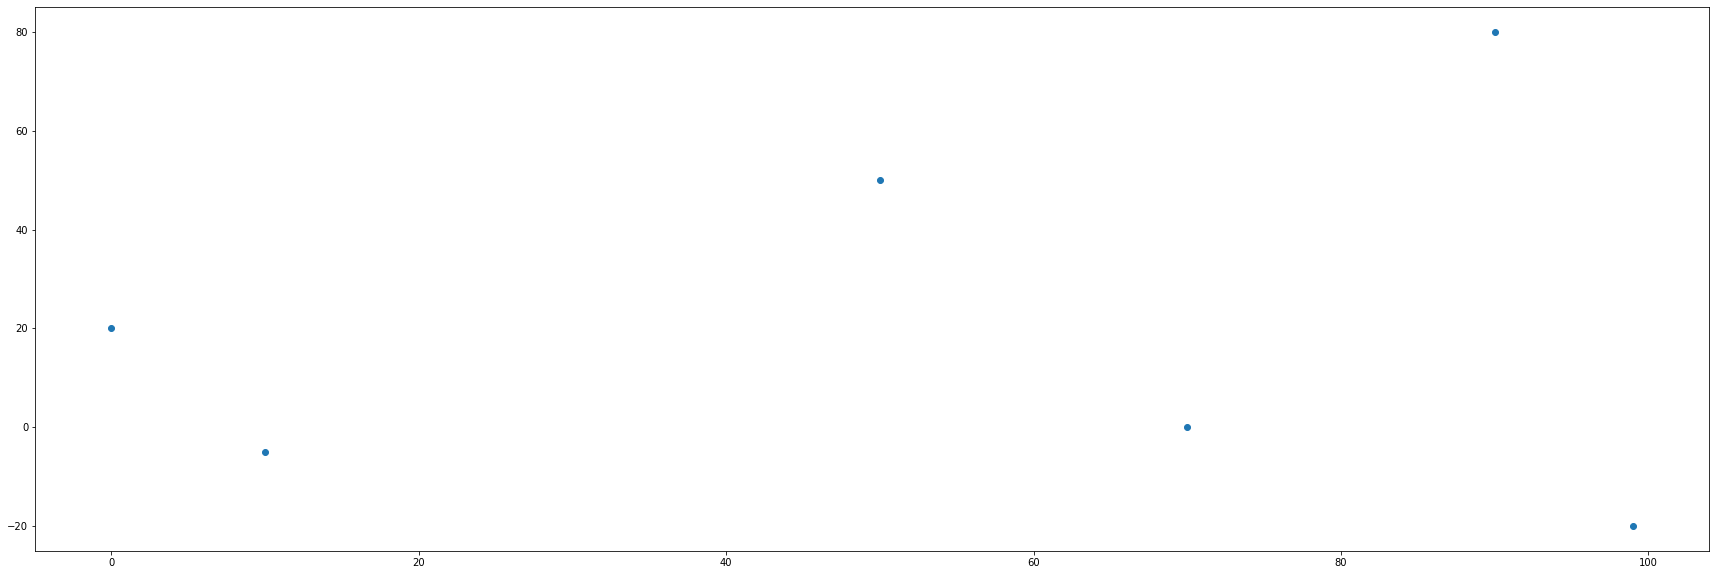

In [125]:
# plot "Population" vs "Employed"
from pandas import read_csv
from matplotlib import pyplot

# load the dataset
# Description: https://github.com/jbrownlee/Datasets/blob/master/longley.names
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values

# choose the input and output variables
# x, y = data[::2, 4], data[::2, -1]
x = [0, 10, 50, 70, 90, 99]
y = [20,-5, 50,  0, 80, -20]

# plot input vs output
pyplot.scatter(x, y)
pyplot.show()

In [115]:
from scipy.optimize import curve_fit

y = 0.12133 * x + 14.38237


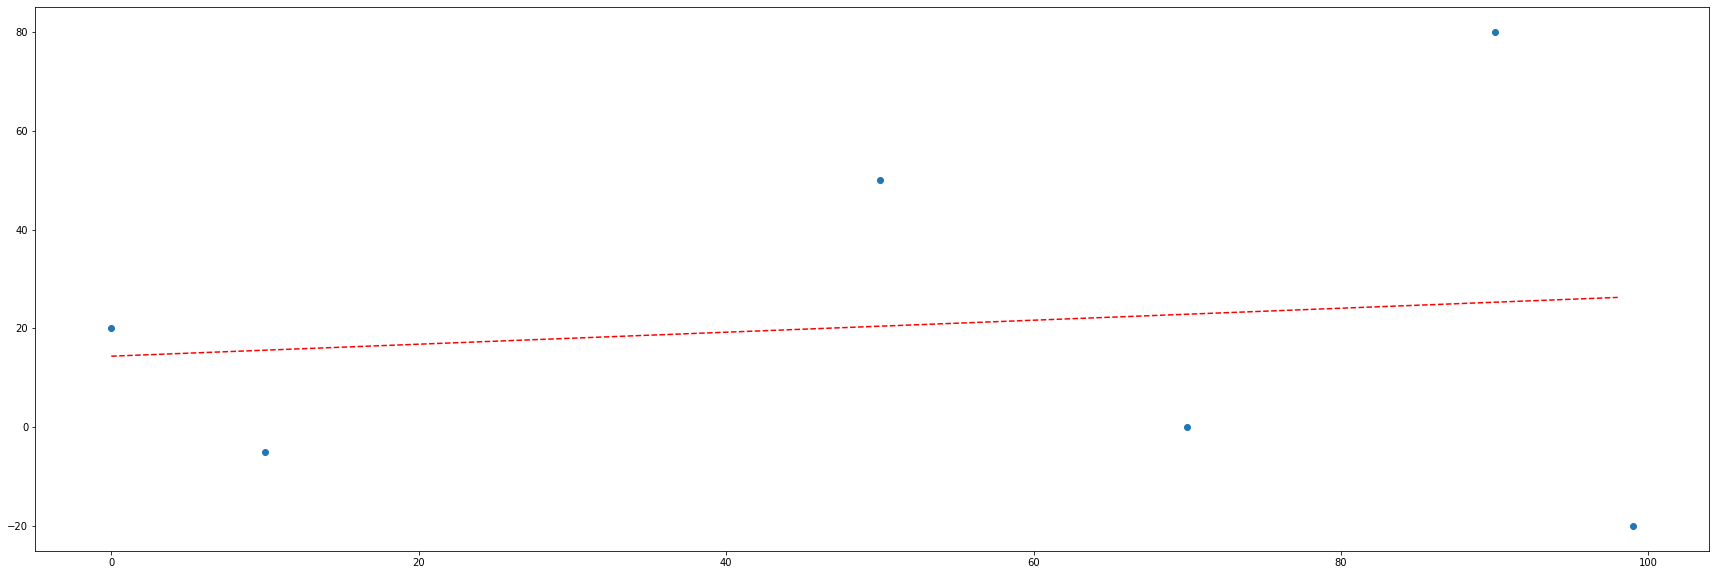

In [127]:
# fit a straight line to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b):
	return a * x + b

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values

# choose the input and output variables
# x, y = data[:, 4], data[:, -1]
x = [0, 10, 50, 70, 90, 99]
y = [20,-5, 50,  0, 80, -20]

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show();

y = 1.09492 * x + -0.01005 * x^2 + 5.16083


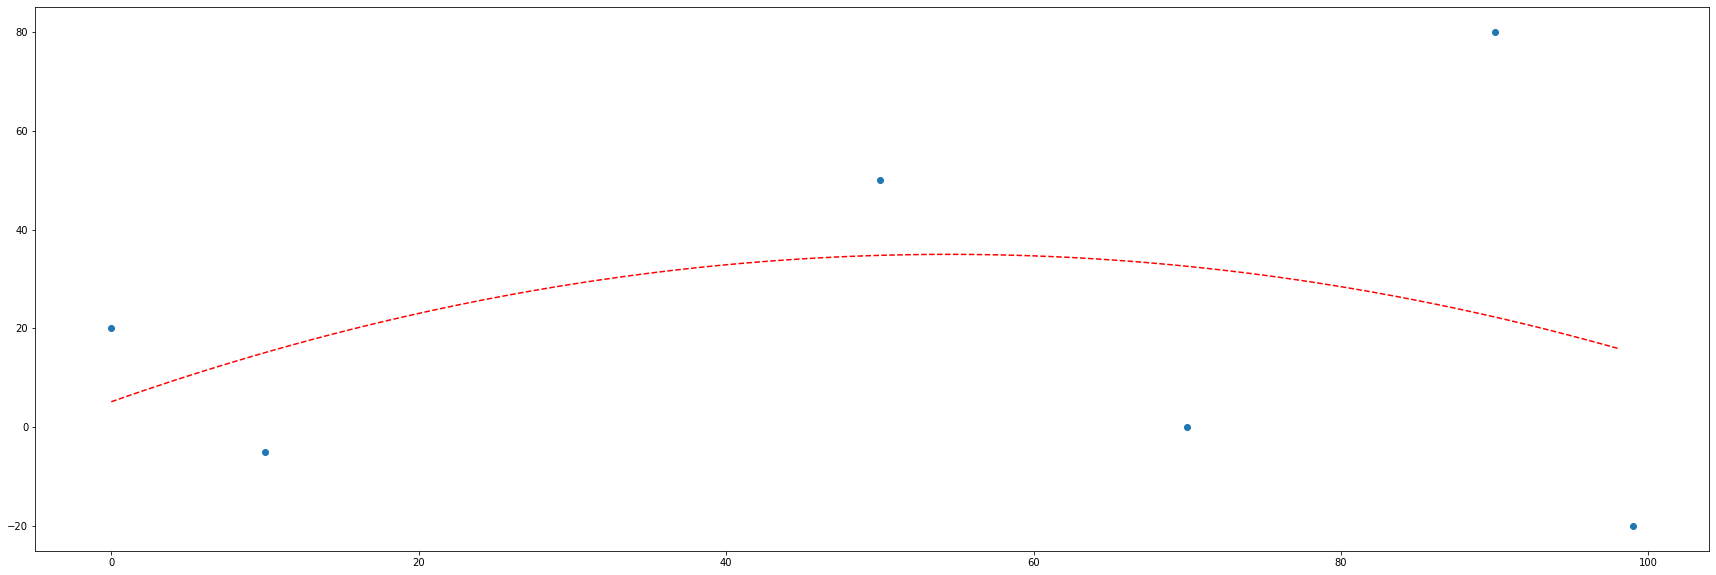

In [128]:
# Simple Polynomial Regression

# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values

# choose the input and output variables
# x, y = data[:, 4], data[:, -1]
x = [0, 10, 50, 70, 90, 99]
y = [20,-5, 50,  0, 80, -20]

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show();

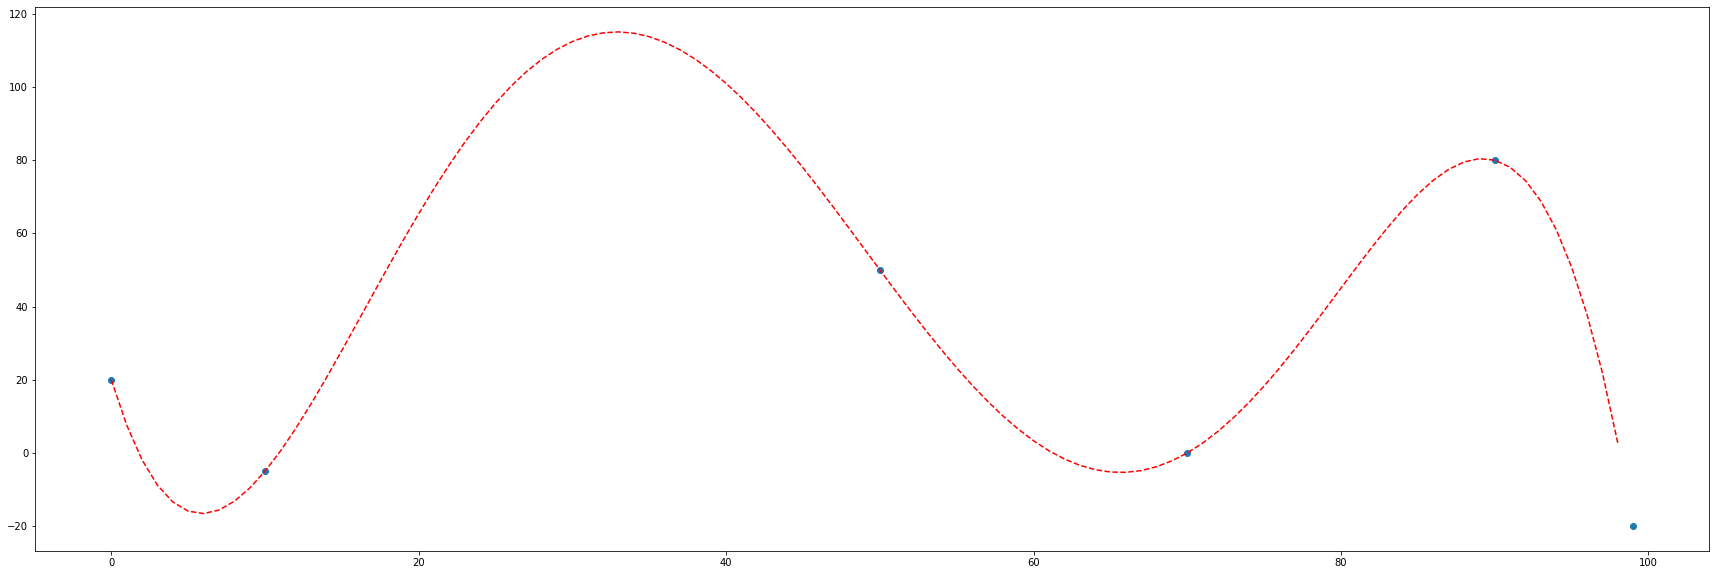

In [129]:
# Simple 5th degree Polynomial Fit

# fit a fifth degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values

# choose the input and output variables
# x, y = data[:, 4], data[:, -1]
x = [0, 10, 50, 70, 90, 99]
y = [20,-5, 50,  0, 80, -20]

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c, d, e, f = popt

# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show();

[-3.03993474e+01  2.51376523e+01  1.53253156e-04  2.09158857e+01]


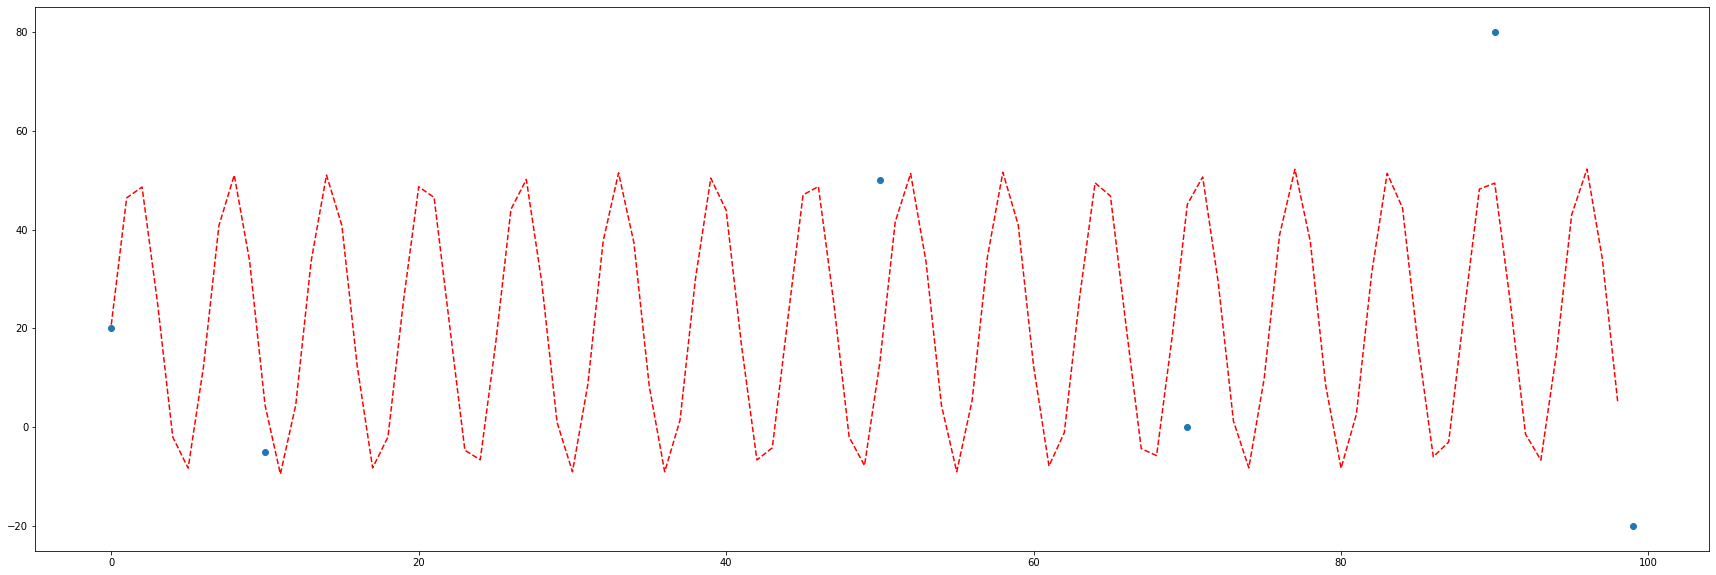

In [130]:
# Non-linear least squares (non-convex/no analytical solution) 

# fit a line to the economic data
from numpy import sin
from numpy import sqrt
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

# define the true objective function
def objective(x, a, b, c, d):
	return a * sin(b - x) + c * x**2 + d

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values

# choose the input and output variables
# x, y = data[:, 4], data[:, -1]
x = [0, 10, 50, 70, 90, 99]
y = [20,-5, 50,  0, 80, -20]

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c, d = popt
print(popt)

# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show();

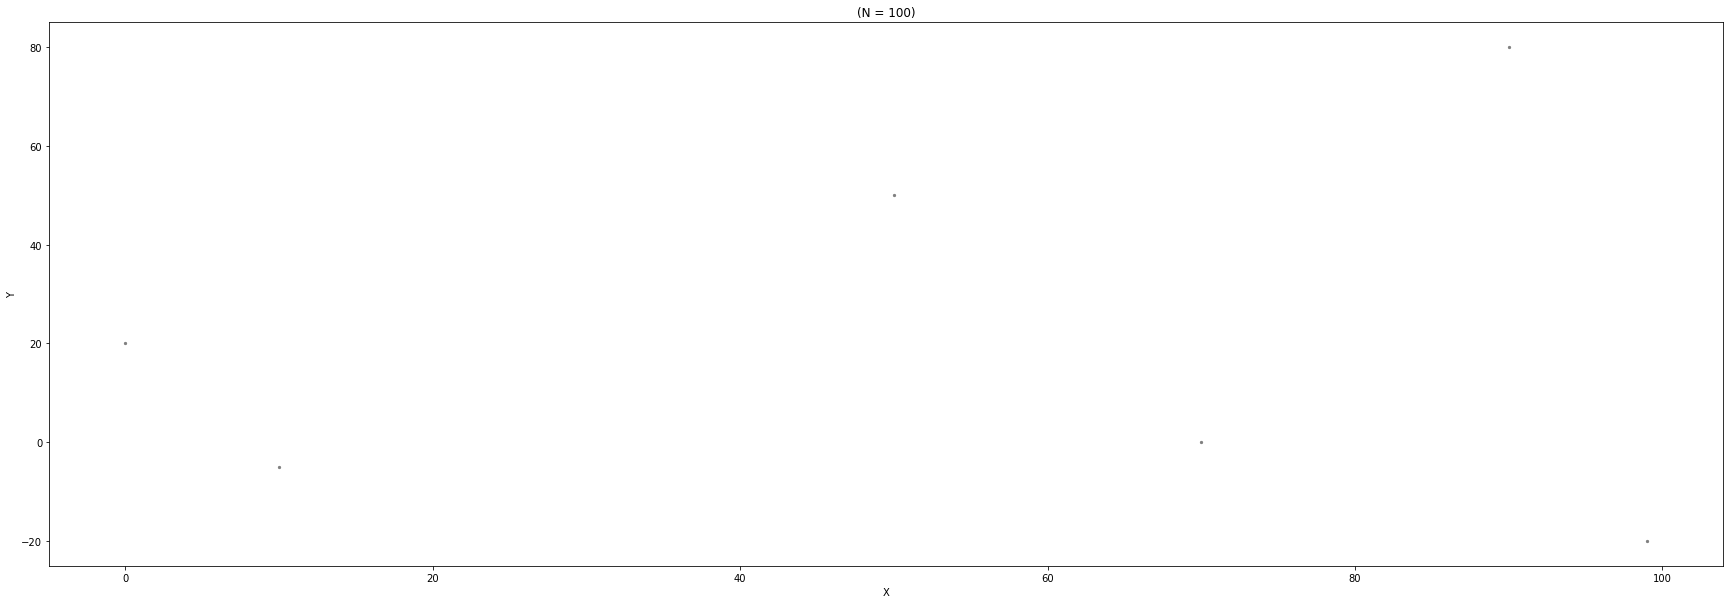

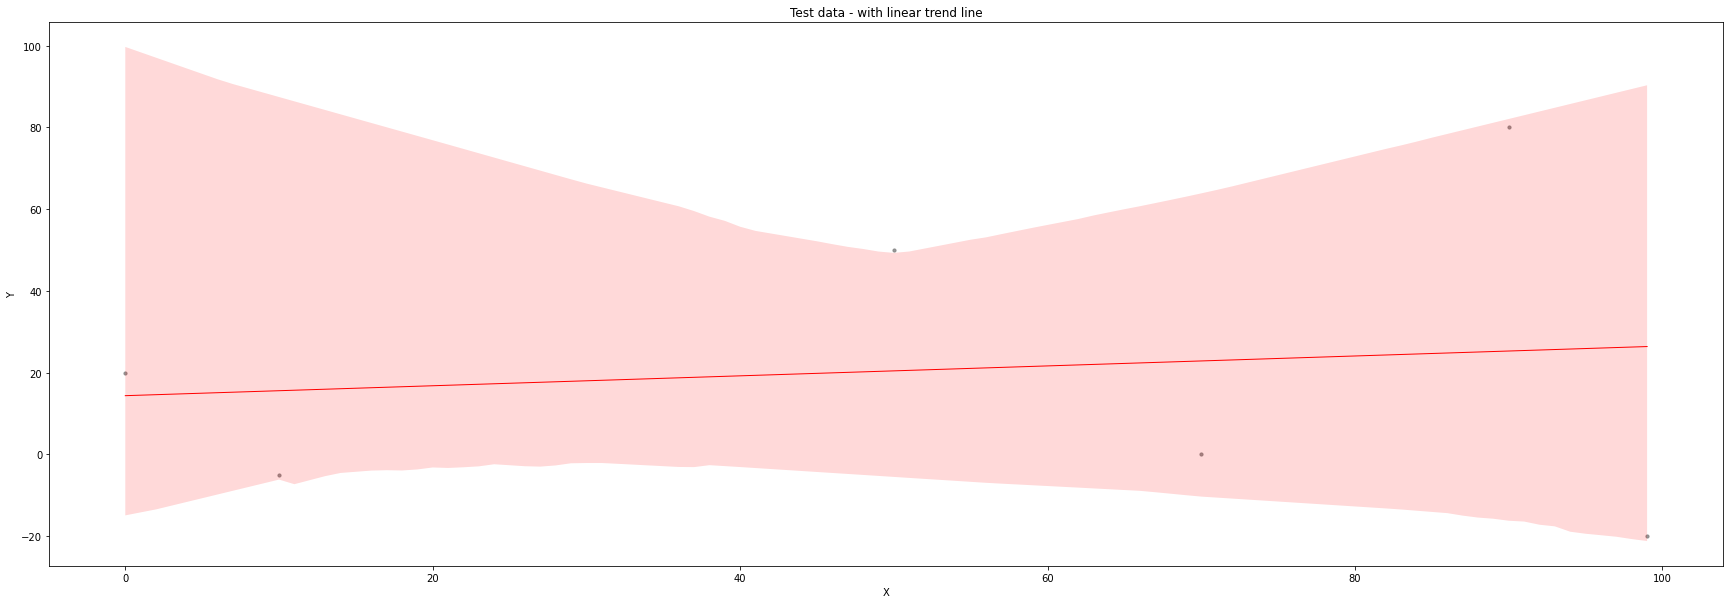

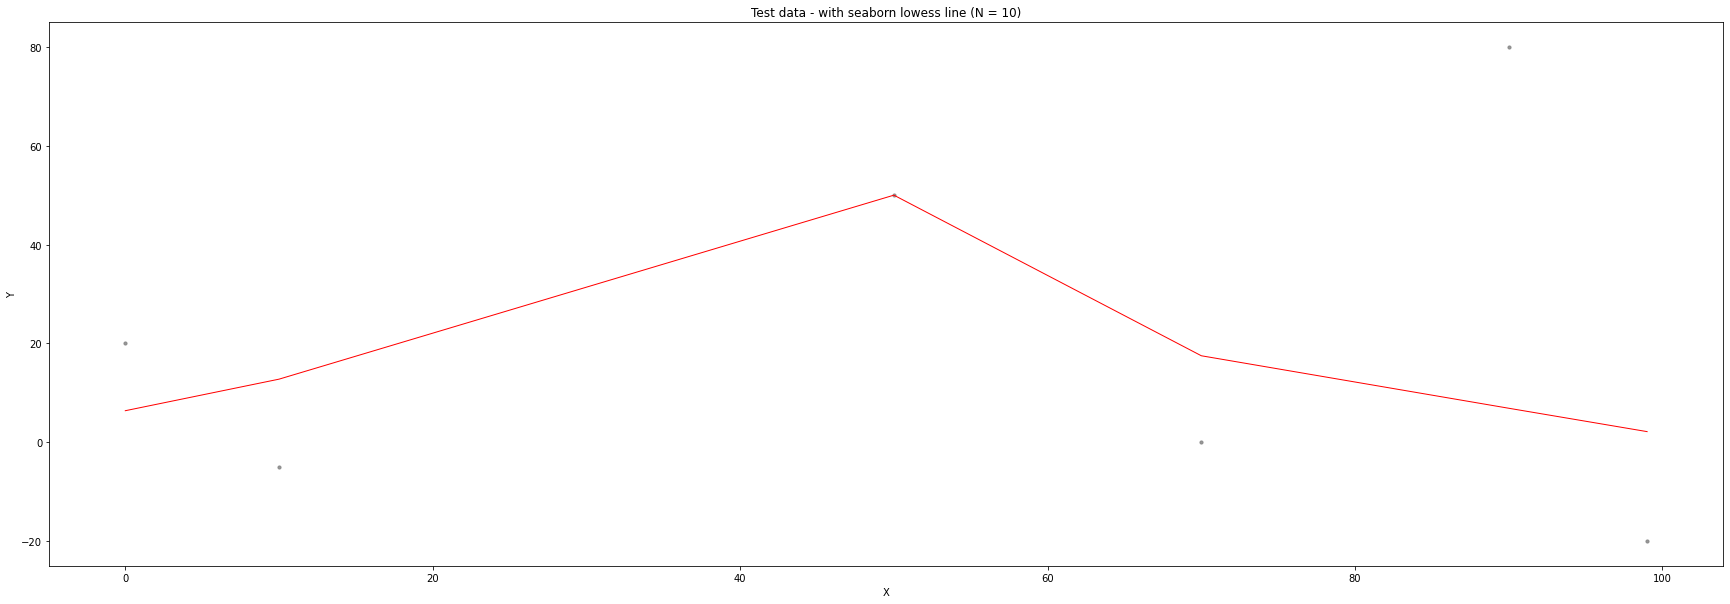

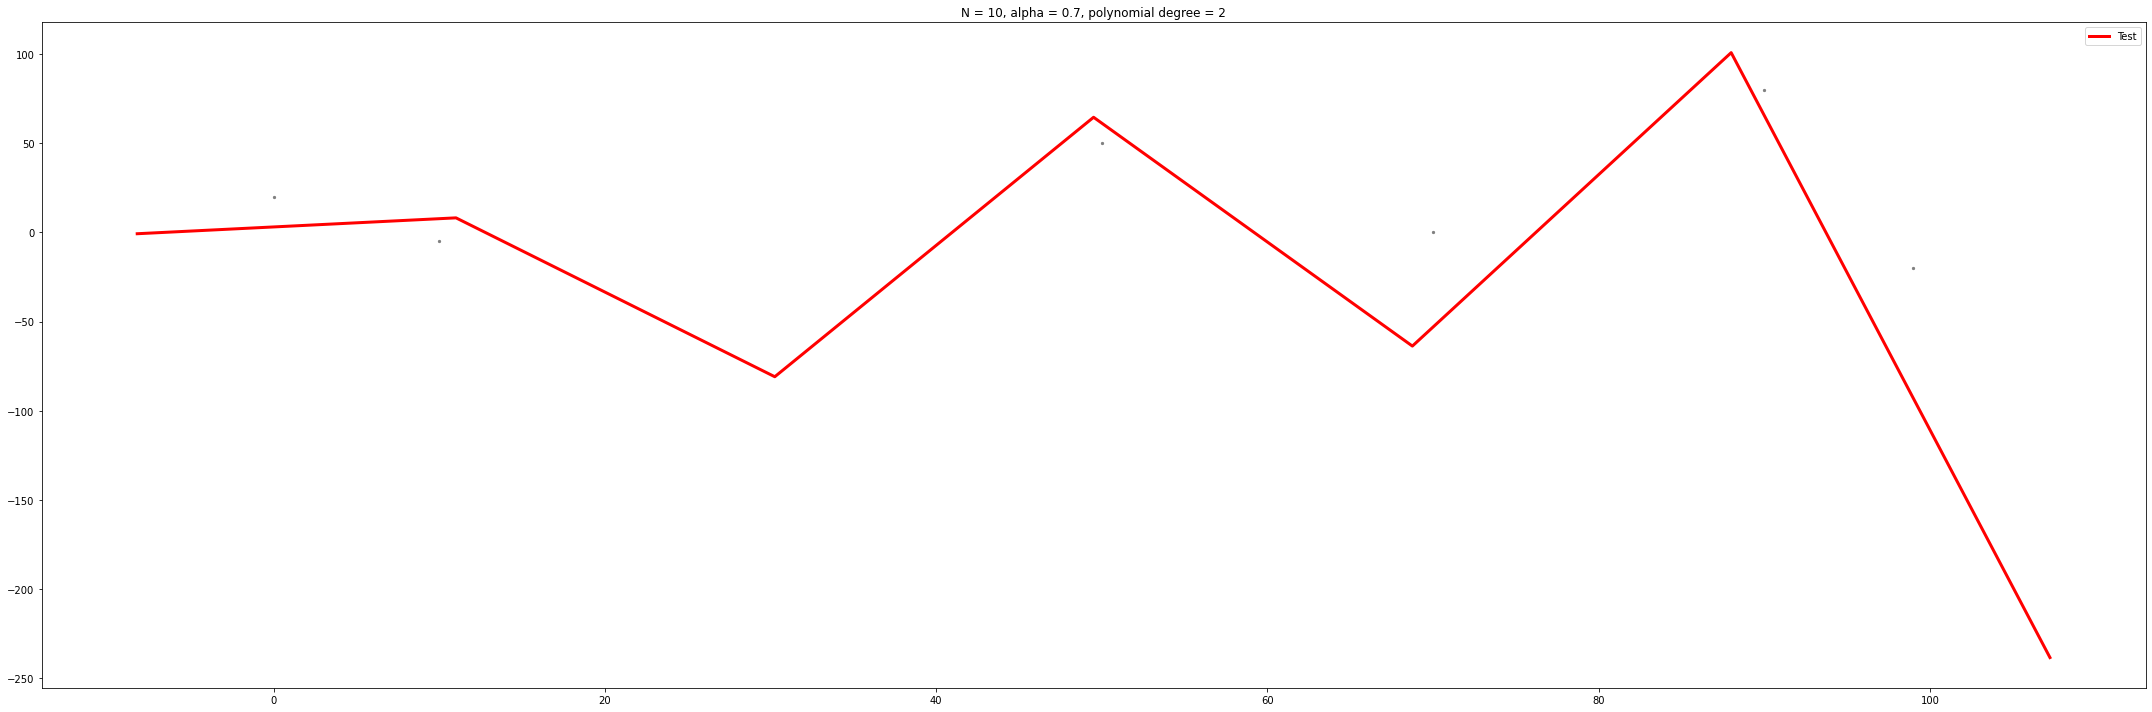

In [135]:
# LOWESS non-param fit
# https://mike-langen.medium.com/creating-powerfull-lowess-graphs-in-python-e0ea7a30b17a

import pandas as pd               # Pandas handles dataframes
import numpy as np
import scipy
import matplotlib                 # Numpy handles lots of basic maths operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns             # Seaborn for beautiful plots
import statsmodels

np.random.seed(10)
# x_values = np.random.randint(-50,110,size=(10000))
# y_values = np.square(x_values)/1.5 + np.random.randint(-1000,1000, size=len(x_values))
x_values = np.array([0, 10, 50, 70, 90, 99])
y_values = np.array([20,-5, 50,  0, 80, -20])

df = pd.DataFrame({"Xvalue" : x_values,
                    "Yvalue" : y_values
                    })

# Scatterplot
plt.scatter(df["Xvalue"], df["Yvalue"], color="grey", marker="o", s=5)
plt.xlabel("X"), plt.ylabel("Y")
plt.title('(N = 100)')
plt.show()

# Create linear trend line
sns.regplot("Xvalue", "Yvalue", data=df,  color="grey", scatter_kws={"s": 10},
             line_kws={"color":"r","alpha":1,"lw":1} ,fit_reg=True)
plt.xlabel("X"), plt.ylabel("Y")
plt.title('Test data - with linear trend line')
plt.show()

# Seaborne solution:
sns.regplot("Xvalue", "Yvalue", data=df,  color="grey", scatter_kws={"s": 10},
             line_kws={"color":"r","alpha":1,"lw":1} ,lowess=True)
plt.xlabel("X"), plt.ylabel("Y")
plt.title('Test data - with seaborn lowess line (N = 10)')
plt.show()


def loc_eval(x, b):
    loc_est = 0
    for i in enumerate(b): loc_est+=i[1]*(x**i[0])
    return(loc_est)


def loess(xvals, yvals, data, alpha, poly_degree=1):
    all_data = sorted(zip(data[xvals].tolist(), data[yvals].tolist()), key=lambda x: x[0])
    xvals, yvals = zip(*all_data)
    evalDF = pd.DataFrame(columns=['v','g'])
    n = len(xvals)
    m = n + 1
    q = int(np.floor(n * alpha) if alpha <= 1.0 else n)
    avg_interval = ((max(xvals)-min(xvals))/len(xvals))
    v_lb = min(xvals)-(.5*avg_interval)
    v_ub = (max(xvals)+(.5*avg_interval))
    v = enumerate(np.linspace(start=v_lb, stop=v_ub, num=m), start=1)
    xcols = [np.ones_like(xvals)]
    for j in range(1, (poly_degree + 1)):
        xcols.append([i ** j for i in xvals])
    X = np.vstack(xcols).T
    for i in v:
        iterpos = i[0]
        iterval = i[1]
        iterdists = sorted([(j, np.abs(j-iterval)) for j in xvals], key=lambda x: x[1])
        _, raw_dists = zip(*iterdists)
        scale_fact = raw_dists[q-1]
        scaled_dists = [(j[0],(j[1]/scale_fact)) for j in iterdists]
        weights = [(j[0],((1-np.abs(j[1]**3))**3 if j[1]<=1 else 0)) for j in scaled_dists]
        _, weights      = zip(*sorted(weights,     key=lambda x: x[0]))
        _, raw_dists    = zip(*sorted(iterdists,   key=lambda x: x[0]))
        _, scaled_dists = zip(*sorted(scaled_dists,key=lambda x: x[0]))
        W         = np.diag(weights)
        b         = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ yvals)
        local_est = loc_eval(iterval, b)
        iterDF2   = pd.DataFrame({
                       'v'  :[iterval],
                       'g'  :[local_est]
                       })
        evalDF = pd.concat([evalDF, iterDF2])
    evalDF = evalDF[['v','g']]
    return(evalDF)


evalDF = loess("Xvalue", "Yvalue", data = df, alpha=0.7, poly_degree=4)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df["Xvalue"], df["Yvalue"], color="grey", marker="o", s=5, label="_nolegend_")
ax1.plot(evalDF['v'], evalDF['g'], color='red', linewidth= 3, label="Test")
plt.title('N = 10, alpha = 0.7, polynomial degree = 2')
plt.legend()
plt.tight_layout()
plt.show();

# **END OF SECTION**

In [109]:
plt.rcParams["figure.figsize"] = (30, 10)

corpus_model = 'cdickens_achristmascarol::vader_z'
corpus_key = corpus_model.split('::')[0]
model_key = corpus_model.split('::')[1]
corpus_title = corpora_full_dt[corpus_key]

save_plot = True

temp_df = corpora_lowess_dt[corpus_model]

plt.plot(temp_df['20_lowess'], alpha=0.5, color='cornflowerblue', label='frac=1.20 (high res)')
plt.plot(temp_df['5_lowess'], alpha=0.5, color='blue', label='frac=1./5 (baselinee)')

plt.plot(temp_df.index, corpora_lowess_dt[corpus_model]['20_max'], 'k^', markersize=10)
ymin, ymax = plt.ylim()

# Crux Maximum x coordinates for vlines
# Get all the x coord for the max Cruxes
crux_max_x20_vals_ls = []
for idx, arow in temp_df.iterrows():
  if pd.isna(arow['20_max']): #  == np.nan():
    pass;
  else:
    crux_max_x20_vals_ls.append(idx)

KeyError: ignored

In [110]:
# matplotlib.rcParams.update(mpl.rcParamsDefault)

In [111]:

afrac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]

print(f'frac_ls: {frac_ls}')
# for i,afrac in enumerate(frac_ls):
for afrac in afrac_ls:
  print(f'Processing afrac={afrac}')
  col_name = f'{int(1/afrac)}_lowess'
  corpora_lowess_dt['cdickens_achristmascarol::vader_z'][col_name].plot()

for afrac in afrac_ls:
  if (afrac == 1./20.):
    # Plot 
    # plt.vlines(crux_x_max_ls, ymin=crux_y_min_ls , ymax=crux_y_max_ls, color='k', label=crux_x_max_ls, linestyles='dashed', alpha=0.5)
    # plt.vlines(crux_x_min_ls, ymin=crux_y_min_ls , ymax=crux_y_max_ls, color='r', label=crux_x_min_ls, linestyles='dashed', alpha=0.5)
    col_name = f'{int(1/afrac)}_max'
    # plt.vlines(corpora_lowess_dt['cdickens_achristmascarol::vader_z'][col_name],-0.5, 0.5)
    plt.scatter(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z'][col_name]) # [col_name], 'k^', markersize=10)
    col_name = f'{int(1/afrac)}_min'
    plt.scatter(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z'][col_name]) # [col_name], 'rv', markersize=10)
  else:
    col_name = f'{int(1/afrac)}_max'
    plt.scatter(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z'][col_name]) # [col_name], 'k^', markersize=7, alpha=0.7)
    col_name = f'{int(1/afrac)}_min'
    plt.scatter(corpora_lowess_dt['cdickens_achristmascarol::vader_z'].index, corpora_lowess_dt['cdickens_achristmascarol::vader_z'][col_name]) # [col_name], 'rv', markersize=7, alpha=0.7)
  # print(f'Processing afrac={afrac}')

plt.grid(True)
plt.show();

frac_ls: [0.05, 0.06666666666666667, 0.1, 0.14285714285714285, 0.2]
Processing afrac=0.05


KeyError: ignored

In [ ]:
temp_dt = get_lowesses(corpora_all_dt['cdickens_achristmascarol']['vader_z'].to_list())
temp_dt.keys()

frac_ls: [0.05, 0.06666666666666667, 0.1, 0.14285714285714285, 0.2]
Processing afrac=0.05
Just calculated min/max crux points for afrac=0.05
Processing afrac=0.06666666666666667
Just calculated min/max crux points for afrac=0.06666666666666667
Processing afrac=0.1
Just calculated min/max crux points for afrac=0.1
Processing afrac=0.14285714285714285
Just calculated min/max crux points for afrac=0.14285714285714285
Processing afrac=0.2
Just calculated min/max crux points for afrac=0.2


dict_keys(['20_lowess', '20_min', '20_max', '15_lowess', '15_min', '15_max', '10_lowess', '10_min', '10_max', '7_lowess', '7_min', '7_max', '5_lowess', '5_min', '5_max'])

In [ ]:
temp_dt['20'].keys()

dict_keys(['lowess', 'min', 'max'])

In [ ]:
temp_dt['20']['lowess']

In [ ]:
list(temp_dt['20']['min'])

[(0, -1.016804339911112),
 (314, -0.5021316579268214),
 (636, -0.11456958542476516),
 (945, -0.5202197669264745),
 (1133, -0.21693870875508356)]

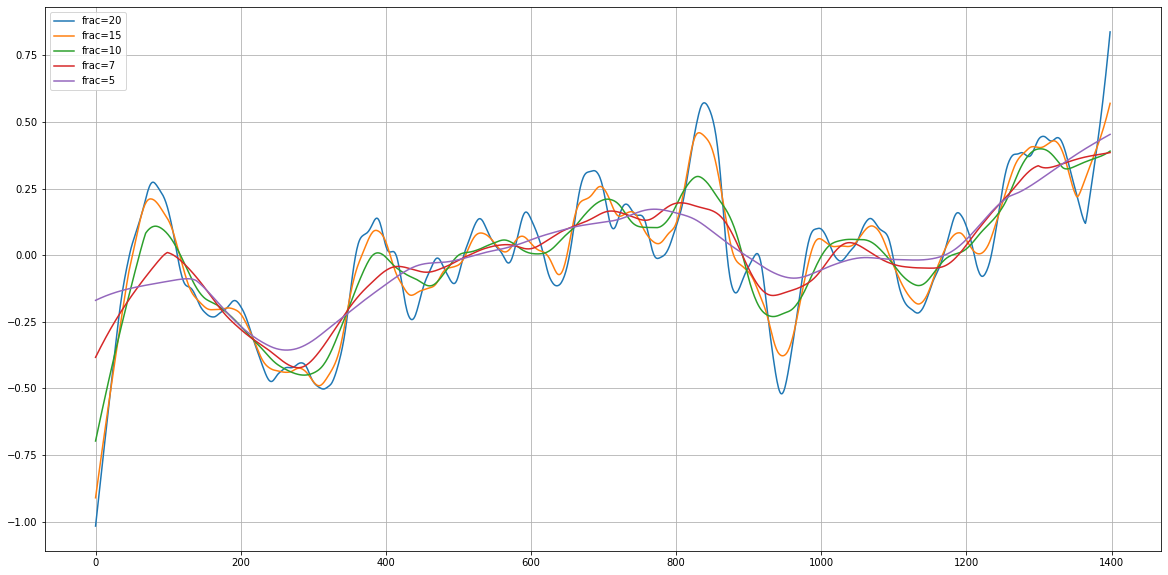

In [ ]:
plt.plot(*zip(*temp_dt['20']['lowess']), label='frac=20')
plt.plot(*zip(*temp_dt['15']['lowess']), label='frac=15')
plt.plot(*zip(*temp_dt['10']['lowess']), label='frac=10')
plt.plot(*zip(*temp_dt['7']['lowess']), label='frac=7')
plt.plot(*zip(*temp_dt['5']['lowess']), label='frac=5')
# x_crux_ls = [x[0] for x in (*temp_dt['20']['min'])]
# y_crux_ls = [y[1] for y in (*temp_dt['20']['min'])]
# plt.scatter(*zip(*list(temp_dt['20']['min']))) # x=x_crux_ls, y=y_crux_ls)
# plt.scatter(*zip(temp_dt['20']['min']))
plt.grid(True)
plt.legend(loc='best')
plt.show()
plt.close();

In [ ]:
save_plot = False

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()
temp_crux_dt = {}

acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

# Min half window width between adjacent Crux points
crux_halfwin_per = 2

# Min distance bewteen adjacent Crux points
min_pair_dist_per = 2

lowess_dt = {}
corpora_crux_dt = {}

for i, acorpus in enumerate(corpora_ls[1:2]):
  print(f'Processing Corpus: {acorpus}...')
  win01per = int(0.01*corpora_all_dt[acorpus]['median_z'].shape[0])
  crux_halfwin = crux_halfwin_per * win01per
  min_pair_dist = min_pair_dist_per * win01per

  for j, amodel_z in enumerate(model_z_cols_ls[:1]): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    y = corpora_all_dt[acorpus][amodel]
    x_len = len(corpora_all_dt[acorpus][amodel])
    x = range(x_len)

    # Crux LOWESS Extrema (frac=1./5.)
    crux_x_min_ls = []
    crux_x_max_ls = []
    # Smoothed LOWESS Extrema (frac=1./5.)
    # sm_y_05frac = np.empty(shape=(x_len))
    # Smoothed LOWESS Baseline (frac=1./20.)
    # sm_y_20frac = np.empty(shape=(x_len))

    # frac_ls = [1./5., 1./7., 1./10., 1./15., 1./20.]
    # NOTE: Order dependent, need to get baseline 1./20. first to calc distances
    frac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]


    # fig, ax = plt.subplots(figsize=(20, 10))

    fig = plt.figure(figsize=(20, 10), dpi=80)
    ax = fig.add_subplot(111)
    # lines = ax1.plot(df_copy['Date'], df_copy['Open'], label='Open values')
    # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    for i,afrac in enumerate(frac_ls):
      # afrac = 1./frac_div
      sm_x, sm_y = sm_lowess(y, x,  frac=afrac, it=5, return_sorted = True).T

      # Set axis ranges; by default this will put major ticks every 25.
      # ax.set_xlim(0, len(sm_x))
      # ax.set_ylim(0, len(sm_y))

      # Get Baseline arc (frac = 1./20.)
      # if (afrac == 1./5.):
      #   sm_y_05frac = sm_y.copy()

      # Get Peaks and Distance from Baseline 
      # if i == len(frac_ls) - 1:

      # matplotlib.rcParams.update(matplotlib.rcParamsDefault)
      
      # sm_y_20frac = sm_y.copy()
      crux_x_min_ls = argrelextrema(sm_y, np.less_equal, order=crux_halfwin)[0]
      crux_y_min_ls = sm_y[crux_x_min_ls]
      crux_x_max_ls = argrelextrema(sm_y, np.greater_equal, order=crux_halfwin)[0]
      crux_y_max_ls = sm_y[crux_x_max_ls]

      # temp_crux_df = pd.DataFrame()
      # Create merged and sorted temp Crux DataFrame 
      afrac_str = str(int(1/afrac))
      temp_crux_dt[afrac_str] = merge_cruxes(crux_x_min_ls, crux_y_min_ls, crux_x_max_ls, crux_y_max_ls)

      # Prune out adjacent crux pairs if closer than min_pair_dist (excluding first and last cruxes)
      # temp_crux_df = prune_cruxes(temp_crux_df, min_pair_dist)

      # Plot LOWESS curve
      lines = ax.plot(sm_x, sm_y, label=f'frac={afrac:.2f}') #, color='tomato')

      # Plot Crux markers
      if (afrac == 1./20.):
        # Plot 
        plt.vlines(crux_x_max_ls, ymin=crux_y_min_ls , ymax=crux_y_max_ls, color='k', label=crux_x_max_ls, linestyles='dashed', alpha=0.5)
        plt.vlines(crux_x_min_ls, ymin=crux_y_min_ls , ymax=crux_y_max_ls, color='r', label=crux_x_min_ls, linestyles='dashed', alpha=0.5)
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=10)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=10)
      else:
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=7, alpha=0.7)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=7, alpha=0.7)           

      # corpus_model_frac_key = f'{acorpus}:{amodel}:{afrac:.2f}'
      # lowess_dt[corpus_model_frac_key] = sm_y

      

      # plt.plot(ilocs_max, style='.', lw=10, color='red', marker="v");
      # df.iloc[ilocs_min].price.plot(style='.', lw=10, color='green', marker="^");

    # Save Dictionary of all frac curve Cruxes for each 'acorpus::amodel' combination
    corpus_model_key = f'{acorpus}::{amodel}' # '::{str(int(1/afrac))}'
    corpora_crux_dt[corpus_model_key] = temp_crux_dt

    plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
    plt.xlabel('Line No', fontsize=12)
    plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series \n {amodel.upper()} model (z-score, SMA 10%, peak_halfwin={crux_halfwin_per}%)', fontsize=16)
    plt.legend(loc='best')

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, x_len, 100)
    minor_ticks = np.arange(0, x_len, 50)

    # Set tick param rotation=90
    ax.xaxis.set_tick_params(rotation=90)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    # ax.set_yticks(major_ticks)
    # ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    # plt.grid(True)
    # plt.grid(True, alpha=0.3, markevery=100)

    # plt.show(block=False)
    # plt.ion()

    if save_plot:
      filename_plt = f'./{subdir_name}/plt_crux_{acorpus}_{amodel}_{crux_halfwin_per}.png'
      plt.savefig(filename_plt)
      print(f'Saved plot to filepath: {filename_plt}\n\n')

    plt.show();
    # plt.clf()
    # plt.cla()
    plt.close();

Processing Corpus: cdickens_greatexpectations...
Corpus #0 cdickens_greatexpectations with Model #0 textblob_z: has 40 columns but only 35 model columns


Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'Great Expectations by Charles Dickens Sentiment Time Series \n VADER_Z model (z-score, SMA 10%, peak_halfwin=2%)')

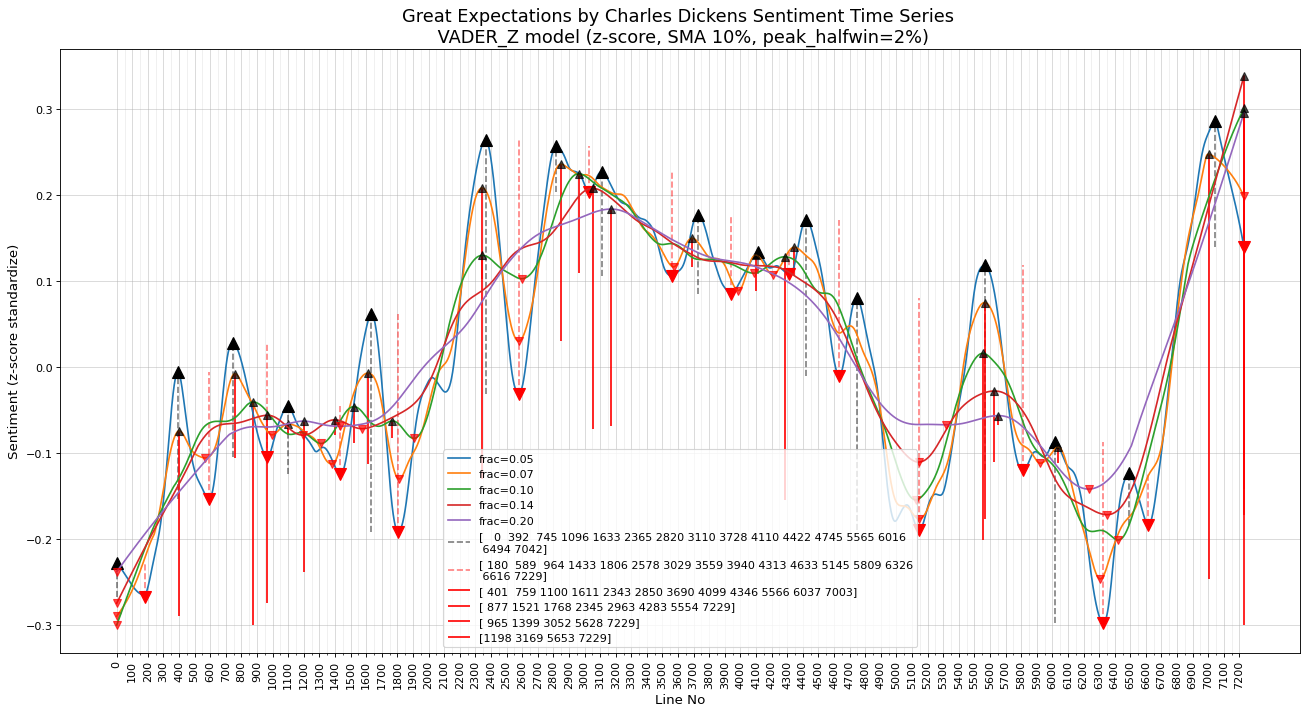

In [ ]:
save_plot = False

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()
temp_crux_dt = {}

acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

# Min half window width between adjacent Crux points
crux_halfwin_per = 2

# Min distance bewteen adjacent Crux points
min_pair_dist_per = 2

lowess_dt = {}
corpora_crux_dt = {}

for i, acorpus in enumerate(corpora_ls[1:2]):
  print(f'Processing Corpus: {acorpus}...')
  win01per = int(0.01*corpora_all_dt[acorpus]['median_z'].shape[0])
  crux_halfwin = crux_halfwin_per * win01per
  min_pair_dist = min_pair_dist_per * win01per

  for j, amodel_z in enumerate(model_z_cols_ls[:1]): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    y = corpora_all_dt[acorpus][amodel]
    x_len = len(corpora_all_dt[acorpus][amodel])
    x = range(x_len)

    # Crux LOWESS Extrema (frac=1./5.)
    crux_x_min_ls = []
    crux_x_max_ls = []
    # Smoothed LOWESS Extrema (frac=1./5.)
    # sm_y_05frac = np.empty(shape=(x_len))
    # Smoothed LOWESS Baseline (frac=1./20.)
    # sm_y_20frac = np.empty(shape=(x_len))

    # frac_ls = [1./5., 1./7., 1./10., 1./15., 1./20.]
    # NOTE: Order dependent, need to get baseline 1./20. first to calc distances
    frac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]


    # fig, ax = plt.subplots(figsize=(20, 10))

    fig = plt.figure(figsize=(20, 10), dpi=80)
    ax = fig.add_subplot(111)
    # lines = ax1.plot(df_copy['Date'], df_copy['Open'], label='Open values')
    # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    for i,afrac in enumerate(frac_ls):
      # afrac = 1./frac_div
      sm_x, sm_y = sm_lowess(y, x,  frac=afrac, it=5, return_sorted = True).T

      # Set axis ranges; by default this will put major ticks every 25.
      # ax.set_xlim(0, len(sm_x))
      # ax.set_ylim(0, len(sm_y))

      # Get Baseline arc (frac = 1./20.)
      # if (afrac == 1./5.):
      #   sm_y_05frac = sm_y.copy()

      # Get Peaks and Distance from Baseline 
      # if i == len(frac_ls) - 1:

      # matplotlib.rcParams.update(matplotlib.rcParamsDefault)
      
      # sm_y_20frac = sm_y.copy()
      crux_x_min_ls = argrelextrema(sm_y, np.less_equal, order=crux_halfwin)[0]
      crux_y_min_ls = sm_y[crux_x_min_ls]
      crux_x_max_ls = argrelextrema(sm_y, np.greater_equal, order=crux_halfwin)[0]
      crux_y_max_ls = sm_y[crux_x_max_ls]

      # temp_crux_df = pd.DataFrame()
      # Create merged and sorted temp Crux DataFrame 
      afrac_str = str(int(1/afrac))
      temp_crux_dt[afrac_str] = merge_cruxes(crux_x_min_ls, crux_y_min_ls, crux_x_max_ls, crux_y_max_ls)

      # Prune out adjacent crux pairs if closer than min_pair_dist (excluding first and last cruxes)
      # temp_crux_df = prune_cruxes(temp_crux_df, min_pair_dist)

      # Plot LOWESS curve
      lines = ax.plot(sm_x, sm_y, label=f'frac={afrac:.2f}') #, color='tomato')

      # Plot Crux markers
      if (afrac == 1./20.):
        # Plot 
        plt.vlines(crux_x_max_ls, ymin=crux_y_min_ls , ymax=crux_y_max_ls, color='k', label=crux_x_max_ls, linestyles='dashed', alpha=0.5)
        plt.vlines(crux_x_min_ls, ymin=crux_y_min_ls , ymax=crux_y_max_ls, color='r', label=crux_x_min_ls, linestyles='dashed', alpha=0.5)
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=10)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=10)
      else:
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=7, alpha=0.7)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=7, alpha=0.7)           

      # corpus_model_frac_key = f'{acorpus}:{amodel}:{afrac:.2f}'
      # lowess_dt[corpus_model_frac_key] = sm_y

      

      # plt.plot(ilocs_max, style='.', lw=10, color='red', marker="v");
      # df.iloc[ilocs_min].price.plot(style='.', lw=10, color='green', marker="^");

    # Save Dictionary of all frac curve Cruxes for each 'acorpus::amodel' combination
    corpus_model_key = f'{acorpus}::{amodel}' # '::{str(int(1/afrac))}'
    corpora_crux_dt[corpus_model_key] = temp_crux_dt

    plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
    plt.xlabel('Line No', fontsize=12)
    plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series \n {amodel.upper()} model (z-score, SMA 10%, peak_halfwin={crux_halfwin_per}%)', fontsize=16)
    plt.legend(loc='best')

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, x_len, 100)
    minor_ticks = np.arange(0, x_len, 50)

    # Set tick param rotation=90
    ax.xaxis.set_tick_params(rotation=90)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    # ax.set_yticks(major_ticks)
    # ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    # plt.grid(True)
    # plt.grid(True, alpha=0.3, markevery=100)

    # plt.show(block=False)
    # plt.ion()

    if save_plot:
      filename_plt = f'./{subdir_name}/plt_crux_{acorpus}_{amodel}_{crux_halfwin_per}.png'
      plt.savefig(filename_plt)
      print(f'Saved plot to filepath: {filename_plt}\n\n')

    plt.show();
    # plt.clf()
    # plt.cla()
    plt.close();

In [ ]:
"""
save_plot = False

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()
temp_crux_dt = {}

acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

crux_halfwin_per = 5
min_pair_dist_per = 5

lowess_dt = {}
corpora_crux_dt = {}

for i, acorpus in enumerate(corpora_ls[1:2]):
  print(f'Processing Corpus: {acorpus}...')
  win01per = int(0.01*corpora_all_dt[acorpus]['median_z'].shape[0])
  crux_halfwin = crux_halfwin_per * win01per
  min_pair_dist = min_pair_dist_per * win01per

  for j, amodel_z in enumerate(model_z_cols_ls[:1]): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')

    y = corpora_all_dt[acorpus][amodel]
    x_len = len(corpora_all_dt[acorpus][amodel])
    x = range(x_len)

    # Crux LOWESS Extrema (frac=1./5.)
    crux_x_min_ls = []
    crux_x_max_ls = []
    # Smoothed LOWESS Extrema (frac=1./5.)
    # sm_y_05frac = np.empty(shape=(x_len))
    # Smoothed LOWESS Baseline (frac=1./20.)
    # sm_y_20frac = np.empty(shape=(x_len))

    # frac_ls = [1./5., 1./7., 1./10., 1./15., 1./20.]
    # NOTE: Order dependent, need to get baseline 1./20. first to calc distances
    frac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]


    # fig, ax = plt.subplots(figsize=(20, 10))

    fig = plt.figure(figsize=(20, 10), dpi=80)
    ax = fig.add_subplot(111)
    # lines = ax1.plot(df_copy['Date'], df_copy['Open'], label='Open values')
    # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    for i,afrac in enumerate(frac_ls):
      # afrac = 1./frac_div
      sm_x, sm_y = sm_lowess(y, x,  frac=afrac, it=5, return_sorted = True).T

      # Set axis ranges; by default this will put major ticks every 25.
      # ax.set_xlim(0, len(sm_x))
      # ax.set_ylim(0, len(sm_y))

      # Get Baseline arc (frac = 1./20.)
      # if (afrac == 1./5.):
      #   sm_y_05frac = sm_y.copy()

      # Get Peaks and Distance from Baseline 
      # if i == len(frac_ls) - 1:

      # matplotlib.rcParams.update(matplotlib.rcParamsDefault)
      
      # sm_y_20frac = sm_y.copy()
      crux_x_min_ls = argrelextrema(sm_y, np.less_equal, order=crux_halfwin)[0]
      crux_y_min_ls = sm_y[crux_x_min_ls]
      crux_x_max_ls = argrelextrema(sm_y, np.greater_equal, order=crux_halfwin)[0]
      crux_y_max_ls = sm_y[crux_x_max_ls]

      # temp_crux_df = pd.DataFrame()
      # Create merged and sorted temp Crux DataFrame 
      afrac_str = str(int(1/afrac))
      temp_crux_dt[afrac_str] = merge_cruxes(crux_x_min_ls, crux_y_min_ls, crux_x_max_ls, crux_y_max_ls)

      # Prune out adjacent crux pairs if closer than min_pair_dist (excluding first and last cruxes)
      # temp_crux_df = prune_cruxes(temp_crux_df, min_pair_dist)

      # Plot LOWESS curve
      lines = ax.plot(sm_x, sm_y, label=f'frac={afrac:.2f}') #, color='tomato')

      # Plot Crux markers
      if (afrac == 1./20.):
        # Plot 
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=10)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=10)
      else:
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=7, alpha=0.7)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=7, alpha=0.7)           

      # corpus_model_frac_key = f'{acorpus}:{amodel}:{afrac:.2f}'
      # lowess_dt[corpus_model_frac_key] = sm_y

      

      # plt.plot(ilocs_max, style='.', lw=10, color='red', marker="v");
      # df.iloc[ilocs_min].price.plot(style='.', lw=10, color='green', marker="^");

    # Save Dictionary of all frac curve Cruxes for each 'acorpus::amodel' combination
    corpus_model_key = f'{acorpus}::{amodel}' # '::{str(int(1/afrac))}'
    corpora_crux_dt[corpus_model_key] = temp_crux_dt

    plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
    plt.xlabel('Line No', fontsize=12)
    plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series \n {amodel.upper()} model (z-score, SMA 10%, peak_halfwin={crux_halfwin_per}%)', fontsize=16)
    plt.legend(loc='best')

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, x_len, 100)
    minor_ticks = np.arange(0, x_len, 50)

    # Set tick param rotation=90
    ax.xaxis.set_tick_params(rotation=90)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    # ax.set_yticks(major_ticks)
    # ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    # plt.grid(True)
    # plt.grid(True, alpha=0.3, markevery=100)

    # plt.show(block=False)
    # plt.ion()

    if save_plot:
      filename_plt = f'./{subdir_name}/plt_crux_{acorpus}_{amodel}_{crux_halfwin_per}.png'
      plt.savefig(filename_plt)
      print(f'Saved plot to filepath: {filename_plt}\n\n')

    plt.show();
    # plt.clf()
    plt.cla()
    plt.close();
""";

In [ ]:
corpora_crux_dt.keys()

dict_keys(['cdickens_greatexpectations::vader_z'])

In [ ]:
corpora_crux_dt['cdickens_greatexpectations::vader_z'].keys()

dict_keys(['20', '15', '10', '7', '5'])

In [ ]:
corpora_crux_dt['cdickens_greatexpectations::vader_z']['20']

type  line_no  dist
0  min      180   0.0
4  max      745   0.0
1  min     1806   0.0
5  max     2365   0.0
2  min     5145   0.0
6  max     5565   0.0
3  min     6326   0.0
7  max     7042   0.0

In [ ]:
# Combine all Cruxes from each frac curve into one DataFrame

acorpus_amodel = 'cdickens_greatexpectations::vader_z'

temp_all_df = pd.DataFrame()
temp_df = pd.DataFrame()

print(f'Processing acorpus::amodel = {acorpus_amodel}')
for afrac, acrux_df in corpora_crux_dt[acorpus_amodel].items():
  print(f'  for frac={afrac}')
  temp_df = acrux_df
  temp_df['frac'] = [afrac] * temp_df.shape[0]
  temp_all_df = temp_all_df.append(temp_df, ignore_index='True')

temp_all_df.head(60)
temp_all_df.info()

Processing acorpus::amodel = cdickens_greatexpectations::vader_z
  for frac=20
  for frac=15
  for frac=10
  for frac=7
  for frac=5


type  line_no  dist frac
0   min      180   0.0   20
1   max      745   0.0   20
2   min     1806   0.0   20
3   max     2365   0.0   20
4   min     5145   0.0   20
5   max     5565   0.0   20
6   min     6326   0.0   20
7   max     7042   0.0   20
8   min        0   0.0   15
9   max      759   0.0   15
10  min     1812   0.0   15
11  max     2850   0.0   15
12  min     5147   0.0   15
13  max     5566   0.0   15
14  min     6307   0.0   15
15  max     7003   0.0   15
16  min        0   0.0   10
17  max      877   0.0   10
18  min     1311   0.0   10
19  max     2963   0.0   10
20  min     5124   0.0   10
21  max     5554   0.0   10
22  min     6422   0.0   10
23  max     7229   0.0   10
24  min        0   0.0    7
25  max      965   0.0    7
26  max     3052   0.0    7
27  min     5142   0.0    7
28  max     5628   0.0    7
29  min     6351   0.0    7
30  max     7229   0.0    7
31  min        0   0.0    5
32  max     3169   0.0    5
33  min     6232   0.0    5
34  max     7229   0.0    5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   type     35 non-null     object 
 1   line_no  35 non-null     int64  
 2   dist     35 non-null     float64
 3   frac     35 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


Processing Corpus: cdickens_greatexpectations...
Corpus #0 cdickens_greatexpectations with Model #0 flair_z: has 40 columns but only 35 model columns


Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'Great Expectations by Charles Dickens Sentiment Time Series \n VADER_Z model (z-score, SMA 10%, peak_halfwin=5%)')

Saved plot to filepath: ./data_corpora_plots/plt_crux_cdickens_greatexpectations_vader_z_5.png




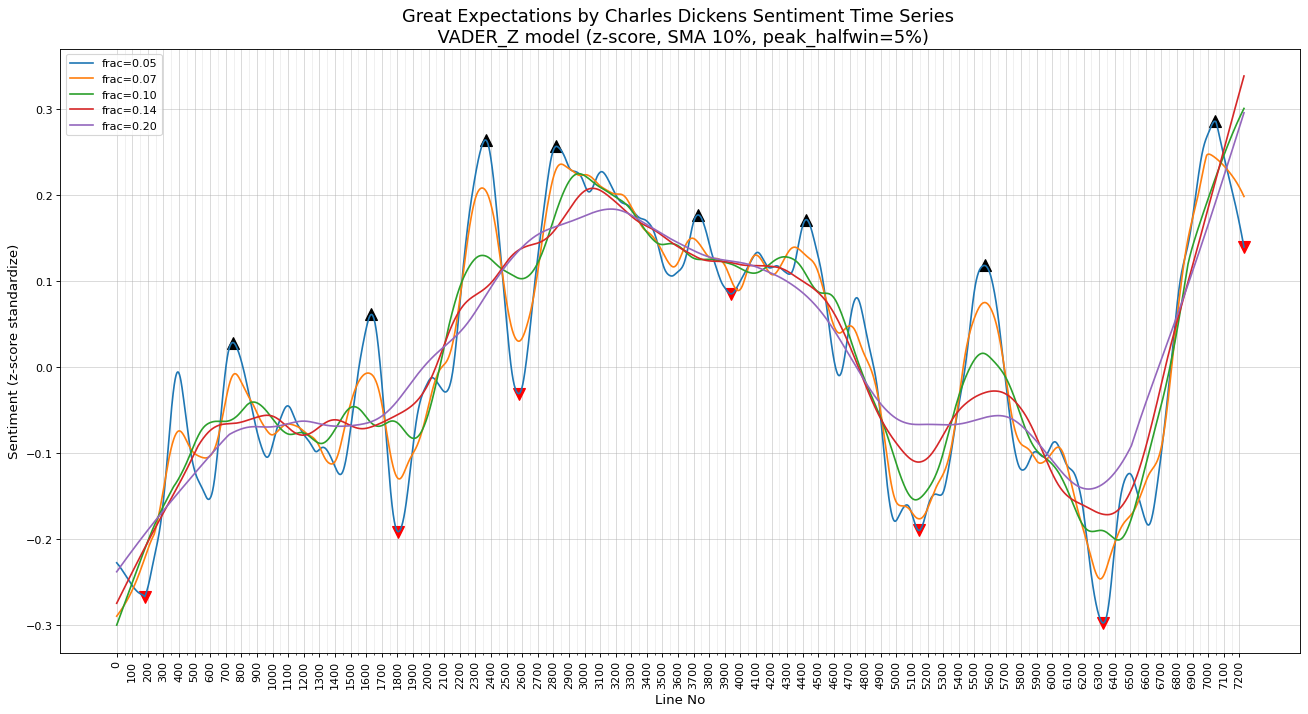

In [ ]:
save_plot = True

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()

acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

crux_halfwin_per = 5
min_pair_dist_per = 5

lowess_dt = {}
corpora_crux_dt = {}

for i, acorpus in enumerate(corpora_ls[1:2]):
  print(f'Processing Corpus: {acorpus}...')
  win01per = int(0.01*corpora_all_dt[acorpus]['median_z'].shape[0])
  crux_halfwin = crux_halfwin_per * win01per
  min_pair_dist = min_pair_dist_per * win01per

  for j, amodel_z in enumerate(model_z_cols_ls[:1]): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')



    y = corpora_all_dt[acorpus][amodel]
    x_len = len(corpora_all_dt[acorpus][amodel])
    x = range(x_len)

    # Crux LOWESS Extrema (frac=1./5.)
    crux_x_min_ls = []
    crux_x_max_ls = []
    # Smoothed LOWESS Extrema (frac=1./5.)
    # sm_y_05frac = np.empty(shape=(x_len))
    # Smoothed LOWESS Baseline (frac=1./20.)
    # sm_y_20frac = np.empty(shape=(x_len))

    # frac_ls = [1./5., 1./7., 1./10., 1./15., 1./20.]
    # NOTE: Order dependent, need to get baseline 1./20. first to calc distances
    frac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]


    # fig, ax = plt.subplots(figsize=(20, 10))

    fig = plt.figure(figsize=(20, 10), dpi=80)
    ax = fig.add_subplot(111)
    # lines = ax1.plot(df_copy['Date'], df_copy['Open'], label='Open values')
    # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    for i,afrac in enumerate(frac_ls):
      # afrac = 1./frac_div
      sm_x, sm_y = sm_lowess(y, x,  frac=afrac, it=5, return_sorted = True).T

      # Set axis ranges; by default this will put major ticks every 25.
      # ax.set_xlim(0, len(sm_x))
      # ax.set_ylim(0, len(sm_y))

      # Get Baseline arc (frac = 1./20.)
      if (afrac == 1./5.):
        sm_y_05frac = sm_y.copy()

      # Get Peaks and Distance from Baseline 
      # if i == len(frac_ls) - 1:

      # matplotlib.rcParams.update(matplotlib.rcParamsDefault)
      
      afrac_str = str(1/afrac)

      if (afrac == 1./20.):
        sm_y_20frac = sm_y.copy()
        crux_x_min_ls = argrelextrema(sm_y, np.less_equal, order=crux_halfwin)[0]
        crux_y_min_ls = sm_y[crux_x_min_ls]
        crux_x_max_ls = argrelextrema(sm_y, np.greater_equal, order=crux_halfwin)[0]
        crux_y_max_ls = sm_y[crux_x_max_ls]

        temp_crux_df = pd.DataFrame()
        # Create merged and sorted temp Crux DataFrame 
        corpus_model_frac_key = f'{acorpus}::{amodel}::{str(int(1/afrac))}'
        temp_crux_df = merge_cruxes(crux_x_min_ls, crux_y_min_ls, crux_x_max_ls, crux_y_max_ls)
        # Prune out adjacent crux pairs if closer than min_pair_dist (excluding first and last cruxes)
        # temp_crux_df = prune_cruxes(temp_crux_df, min_pair_dist)
        # Save 
        corpora_crux_dt[corpus_model_frac_key] = temp_crux_df
        # Plot 
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=10)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=10)

      corpus_model_frac_key = f'{acorpus}:{amodel}:{afrac:.2f}'
      lowess_dt[corpus_model_frac_key] = sm_y
      lines = ax.plot(sm_x, sm_y, label=f'frac={afrac:.2f}') #, color='tomato')
      

      # plt.plot(ilocs_max, style='.', lw=10, color='red', marker="v");
      # df.iloc[ilocs_min].price.plot(style='.', lw=10, color='green', marker="^");

    plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
    plt.xlabel('Line No', fontsize=12)
    plt.title(f'{corpora_full_dt[acorpus]} Sentiment Time Series \n {amodel.upper()} model (z-score, SMA 10%, peak_halfwin={crux_halfwin_per}%)', fontsize=16)
    plt.legend(loc='best')

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, x_len, 100)
    minor_ticks = np.arange(0, x_len, 50)

    # Set tick param rotation=90
    ax.xaxis.set_tick_params(rotation=90)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    # ax.set_yticks(major_ticks)
    # ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    # plt.grid(True)
    # plt.grid(True, alpha=0.3, markevery=100)

    # plt.show(block=False)
    # plt.ion()

    if save_plot:
      filename_plt = f'./{subdir_name}/plt_crux_{acorpus}_{amodel}_{crux_halfwin_per}.png'
      plt.savefig(filename_plt)
      print(f'Saved plot to filepath: {filename_plt}\n\n')

    plt.show();
    # plt.clf()
    plt.cla()
    plt.close();

In [ ]:
corpora_crux_dt.keys()

dict_keys(['cdickens_greatexpectations::vader_z::20'])

In [ ]:
corpora_crux_dt['cdickens_greatexpectations::vader_z::20']

type  line_no      dist
0   min      180  0.072891
7   max      745  0.104661
8   max     1633  0.124682
1   min     1806  0.153339
9   max     2365  0.181201
2   min     2578  0.166230
10  max     2820  0.093137
11  max     3728  0.043827
3   min     3940  0.038172
12  max     4422  0.088734
4   min     5145  0.123203
13  max     5565  0.176930
5   min     6326  0.161791
14  max     7042  0.096635
6   min     7229  0.156206

In [ ]:
corpora_crux_dt['cdickens_greatexpectations::vader_z::20'].head(20)
corpora_crux_dt['cdickens_greatexpectations::vader_z::20'].shape

AttributeError: ignored

Processing Corpus: cdickens_achristmascarol...
Corpus #0 cdickens_achristmascarol with Model #0 jockers_rinker_z: has 40 columns but only 35 model columns


Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'A Christmas Carol by Charles Dickens\n Sentiment Time Series (z-score, SMA)')

Saved plot to filepath: ./data_corpora_plots/plt_crux_cdickens_achristmascarol_vader_z.png




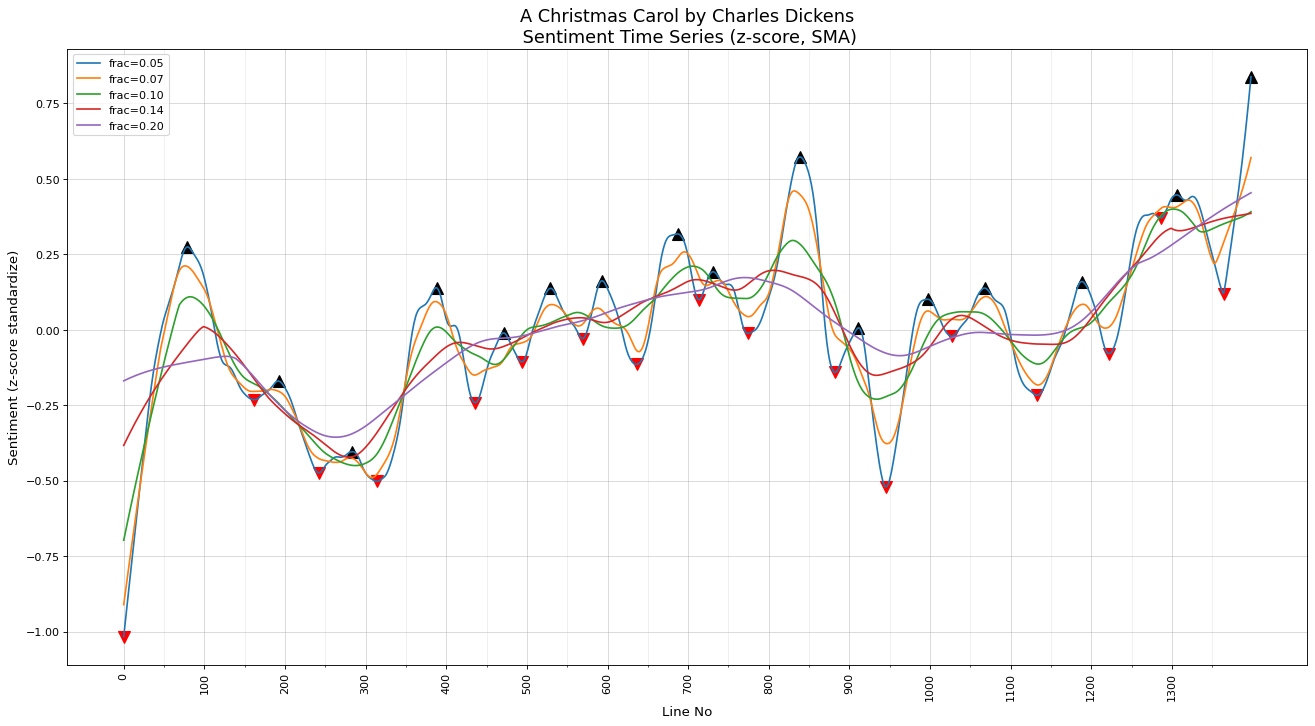

Processing Corpus: cdickens_greatexpectations...
Corpus #1 cdickens_greatexpectations with Model #0 jockers_rinker_z: has 40 columns but only 35 model columns


Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'Great Expectations by Charles Dickens\n Sentiment Time Series (z-score, SMA)')

Saved plot to filepath: ./data_corpora_plots/plt_crux_cdickens_greatexpectations_vader_z.png




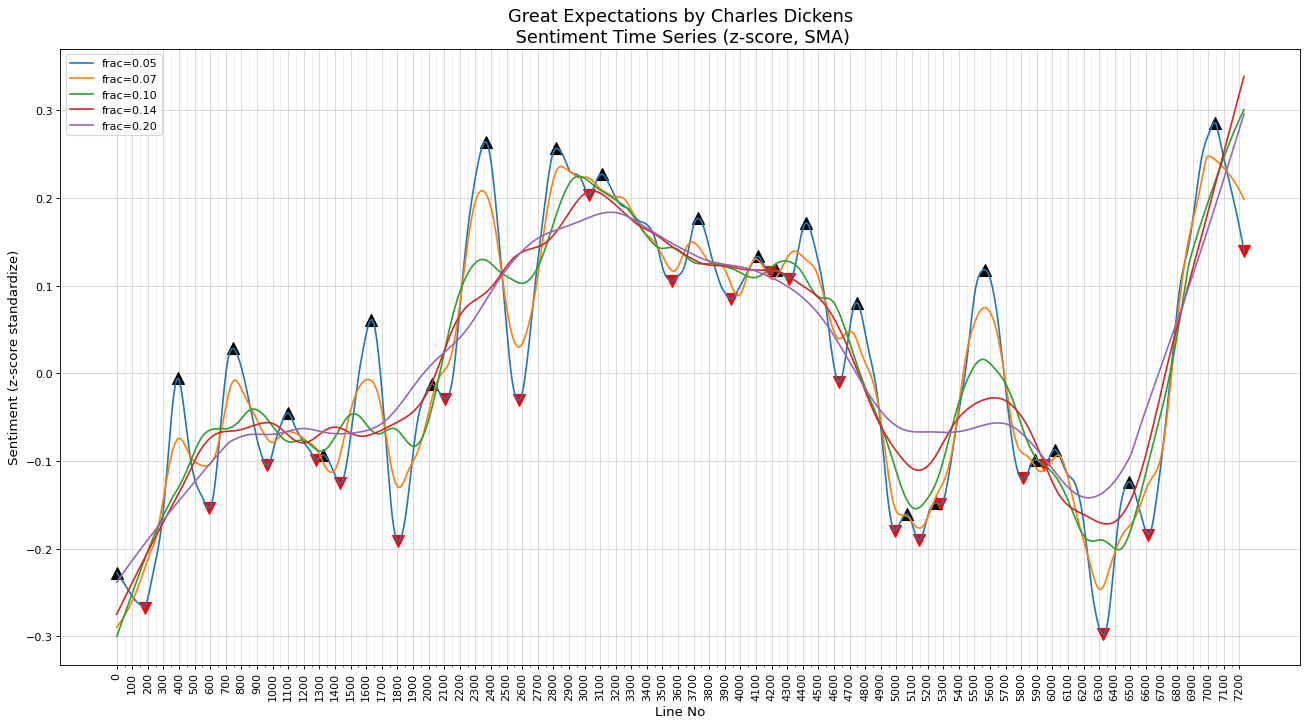

Processing Corpus: ddefoe_robinsoncrusoe...
Corpus #2 ddefoe_robinsoncrusoe with Model #0 jockers_rinker_z: has 40 columns but only 35 model columns


Text(0, 0.5, 'Sentiment (z-score standardize)')

Text(0.5, 0, 'Line No')

Text(0.5, 1.0, 'Robinson Crusoe by Daniel Defoe\n Sentiment Time Series (z-score, SMA)')

Saved plot to filepath: ./data_corpora_plots/plt_crux_ddefoe_robinsoncrusoe_vader_z.png




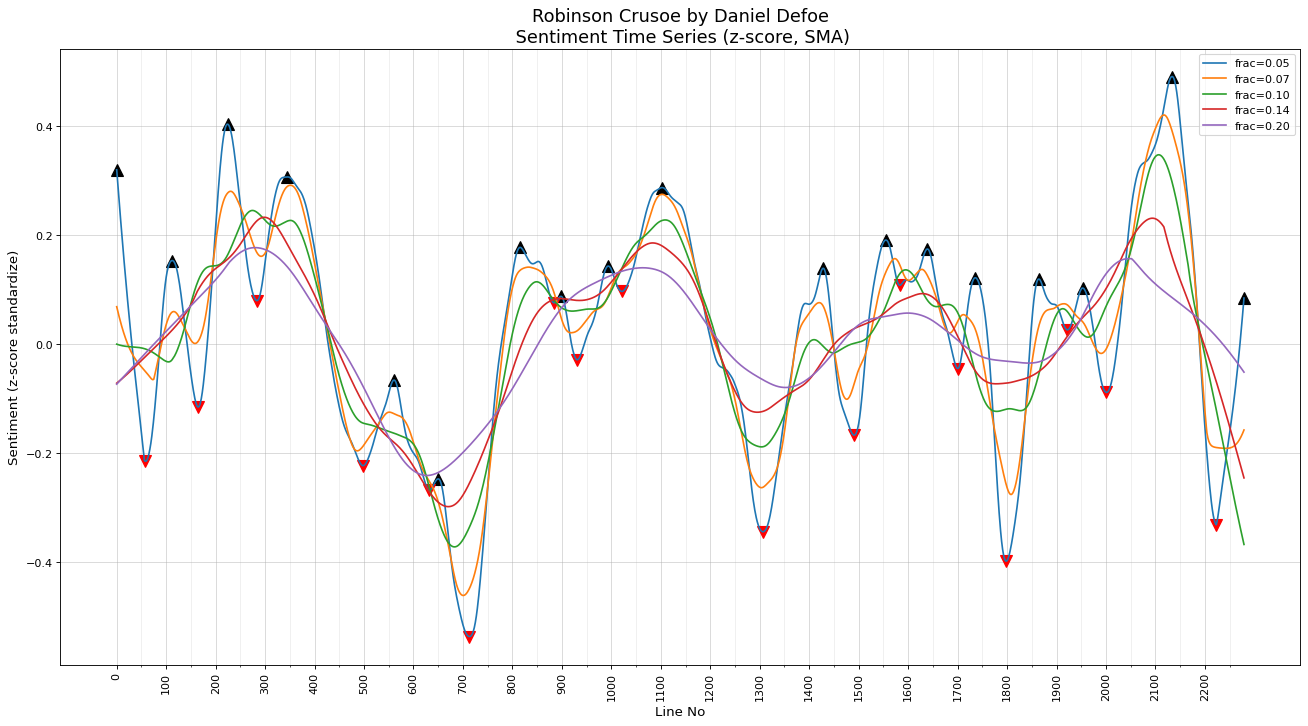

In [ ]:
save_plot = True

subdir_name = 'data_corpora_plots'
temp_df = pd.DataFrame()

acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

crux_halfwin = 20

lowess_dt = {}


for i, acorpus in enumerate(corpora_ls[:3]):
  print(f'Processing Corpus: {acorpus}...')
  win10per = int(0.1*corpora_all_dt[acorpus]['median_z'].shape[0])

  for j, amodel_z in enumerate(model_z_cols_ls[:1]): # model_cols_ls):

    print(f'Corpus #{i} {acorpus} with Model #{j} {amodel_z}: has {len(corpora_all_dt[acorpus].columns)} columns but only {len(model_cols_ls)} model columns')



    y = corpora_all_dt[acorpus][amodel]
    x_len = len(corpora_all_dt[acorpus][amodel])
    x = range(x_len)

    # Crux LOWESS Extrema (frac=1./5.)
    crux_x_min_ls = []
    crux_x_max_ls = []
    # Smoothed LOWESS Extrema (frac=1./5.)
    sm_y_05frac = np.empty(shape=(x_len))
    # Smoothed LOWESS Baseline (frac=1./20.)
    sm_y_20frac = np.empty(shape=(x_len))

    # frac_ls = [1./5., 1./7., 1./10., 1./15., 1./20.]
    # NOTE: Order dependent, need to get baseline 1./20. first to calc distances
    frac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]


    # fig, ax = plt.subplots(figsize=(20, 10))

    fig = plt.figure(figsize=(20, 10), dpi=80)
    ax = fig.add_subplot(111)
    # lines = ax1.plot(df_copy['Date'], df_copy['Open'], label='Open values')
    # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    for i,afrac in enumerate(frac_ls):
      # afrac = 1./frac_div
      sm_x, sm_y = sm_lowess(y, x,  frac=afrac, it=5, return_sorted = True).T

      # Set axis ranges; by default this will put major ticks every 25.
      # ax.set_xlim(0, len(sm_x))
      # ax.set_ylim(0, len(sm_y))

      # Get Baseline arc (frac = 1./20.)
      if (afrac == 1./5.):
        sm_y_05frac = sm_y.copy()

      # Get Peaks and Distance from Baseline 
      # if i == len(frac_ls) - 1:

      # matplotlib.rcParams.update(matplotlib.rcParamsDefault)
      
      if (afrac == 1./20.):
        sm_y_20frac = sm_y.copy()
        crux_x_min_ls = argrelextrema(sm_y, np.less_equal, order=crux_halfwin)[0]
        crux_x_max_ls = argrelextrema(sm_y, np.greater_equal, order=crux_halfwin)[0]
        plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=10)
        plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=10)

      corpus_model_frac_key = f'{acorpus}:{amodel}:{afrac:.2f}'
      lowess_dt[corpus_model_frac_key] = sm_y
      lines = ax.plot(sm_x, sm_y, label=f'frac={afrac:.2f}') #, color='tomato')
      

      # plt.plot(ilocs_max, style='.', lw=10, color='red', marker="v");
      # df.iloc[ilocs_min].price.plot(style='.', lw=10, color='green', marker="^");

    plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
    plt.xlabel('Line No', fontsize=12)
    plt.title(f'{corpora_full_dt[acorpus]}\n Sentiment Time Series (z-score, SMA)', fontsize=16)
    plt.legend(loc='best')

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, x_len, 100)
    minor_ticks = np.arange(0, x_len, 50)

    # Set tick param rotation=90
    ax.xaxis.set_tick_params(rotation=90)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    # ax.set_yticks(major_ticks)
    # ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    # ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    # plt.grid(True)
    # plt.grid(True, alpha=0.3, markevery=100)

    # plt.show(block=False)
    # plt.ion()

    if save_plot:
      filename_plt = f'./{subdir_name}/plt_crux_{acorpus}_{amodel}.png'
      plt.savefig(filename_plt)
      print(f'Saved plot to filepath: {filename_plt}\n\n')

    plt.show();
    # plt.clf()
    plt.cla()
    plt.close();

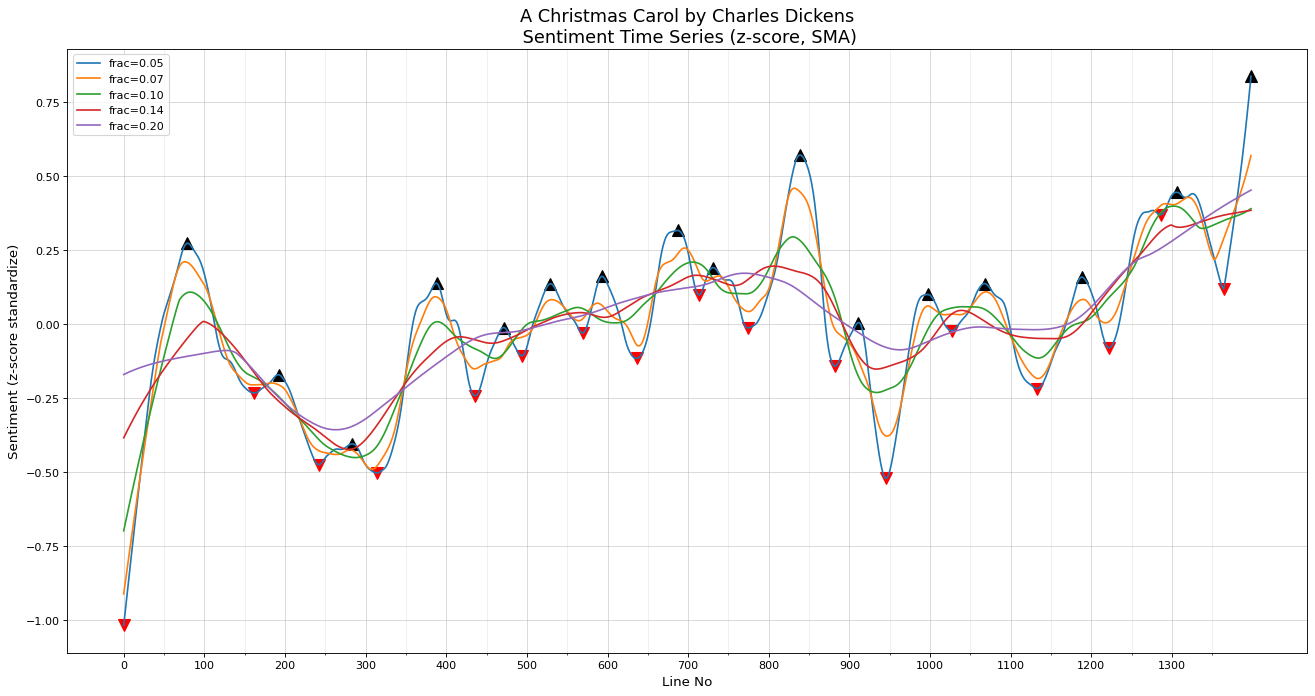

In [ ]:
acorpus = 'cdickens_achristmascarol'
amodel = 'vader_z'

crux_halfwin = 20

lowess_dt = {}

y = corpora_all_dt[acorpus][amodel]
x_len = len(corpora_all_dt[acorpus][amodel])
x = range(x_len)

# Crux LOWESS Extrema (frac=1./5.)
crux_x_min_ls = []
crux_x_max_ls = []
# Smoothed LOWESS Extrema (frac=1./5.)
sm_y_05frac = np.empty(shape=(x_len))
# Smoothed LOWESS Baseline (frac=1./20.)
sm_y_20frac = np.empty(shape=(x_len))

# frac_ls = [1./5., 1./7., 1./10., 1./15., 1./20.]
# NOTE: Order dependent, need to get baseline 1./20. first to calc distances
frac_ls = [1./20., 1./15., 1./10., 1./7., 1./5.]


# fig, ax = plt.subplots(figsize=(20, 10))

fig = plt.figure(figsize=(20, 10), dpi=80)
ax = fig.add_subplot(111)
# lines = ax1.plot(df_copy['Date'], df_copy['Open'], label='Open values')
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

for i,afrac in enumerate(frac_ls):
  # afrac = 1./frac_div
  sm_x, sm_y = sm_lowess(y, x,  frac=afrac, it=5, return_sorted = True).T

  # Set axis ranges; by default this will put major ticks every 25.
  # ax.set_xlim(0, len(sm_x))
  # ax.set_ylim(0, len(sm_y))

  # Get Baseline arc (frac = 1./20.)
  if (afrac == 1./5.):
    sm_y_05frac = sm_y.copy()

  # Get Peaks and Distance from Baseline 
  # if i == len(frac_ls) - 1:
  if (afrac == 1./20.):
    sm_y_20frac = sm_y.copy()
    crux_x_min_ls = argrelextrema(sm_y, np.less_equal, order=crux_halfwin)[0]
    crux_x_max_ls = argrelextrema(sm_y, np.greater_equal, order=crux_halfwin)[0]
    plt.plot(crux_x_max_ls, sm_y[crux_x_max_ls], 'k^', markersize=10)
    plt.plot(crux_x_min_ls, sm_y[crux_x_min_ls], 'rv', markersize=10)

  corpus_model_frac_key = f'{acorpus}:{amodel}:{afrac:.2f}'
  lowess_dt[corpus_model_frac_key] = sm_y
  lines = ax.plot(sm_x, sm_y, label=f'frac={afrac:.2f}') #, color='tomato')
  

  # plt.plot(ilocs_max, style='.', lw=10, color='red', marker="v");
  # df.iloc[ilocs_min].price.plot(style='.', lw=10, color='green', marker="^");

plt.ylabel('Sentiment (z-score standardize)', fontsize=12)
plt.xlabel('Line No', fontsize=12)
plt.title(f'{corpora_full_dt[acorpus]}\n Sentiment Time Series (z-score, SMA)', fontsize=16)
plt.legend(loc='best')

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, x_len, 100)
minor_ticks = np.arange(0, x_len, 50)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
# ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

# plt.grid(True)
# plt.grid(True, alpha=0.3, markevery=100)
plt.show();

In [ ]:
temp_df = pd.DataFrame(sm_y_20frac)
temp_df.plot()

In [ ]:
crux_x_min_ls

array([   0,  162,  242,  314,  436,  494,  569,  636,  714,  774,  882,
        945, 1027, 1133, 1222, 1286, 1364])

In [ ]:
crux_x_max_ls

array([  79,  192,  283,  388,  471,  529,  593,  687,  731,  839,  911,
        997, 1068, 1188, 1306, 1398])

### **Crux Distance from Baseline**

In [ ]:
# For Crux Minimums, calculate the Distance between the Baseline and Extrema LOWESS Crux Points

crux_min_dist_ls = []

crux_min_len = len(crux_x_min_ls)
crux_type_ls = ['min']*crux_min_len

for amin_crux in crux_x_min_ls:
  amin_crux_dist = abs(sm_y_20frac[amin_crux] - sm_y_05frac[amin_crux])
  crux_min_dist_ls.append(amin_crux_dist)
  # print(f'At Line: {amin_crux} the abs(base-extreme) distance: {amin_crux_dist}')

# crux_min_dist_ls.sort(reverse=True)

crux_min_points_df = pd.DataFrame(
    {'type' : crux_type_ls,
     'line_no' : crux_x_min_ls,
     'dist' : crux_min_dist_ls})

# crux_min_points_df

In [ ]:
# For Crux Maximums, calculate the Distance between the Baseline and Extrema LOWESS Crux Points

crux_max_dist_ls = []

crux_max_len = len(crux_x_max_ls)
crux_type_ls = ['max']*crux_max_len

for amax_crux in crux_x_max_ls:
  amax_crux_dist = abs(sm_y_20frac[amax_crux] - sm_y_05frac[amax_crux])
  crux_max_dist_ls.append(amax_crux_dist)
  # print(f'At Line: {amax_crux} the abs(base-extreme) distance: {amax_crux_dist}')

# crux_max_dist_ls.sort(reverse=True)

crux_max_points_df = pd.DataFrame(
    {'type' : crux_type_ls,
     'line_no' : crux_x_max_ls,
     'dist' : crux_max_dist_ls})

# crux_max_points_df.head(30)

In [ ]:
# Vertically concatenate and reverse sort the Min and Max Crux Distance DataFrames

crux_points_df = crux_max_points_df.append(crux_min_points_df, ignore_index=True)
crux_points_df.sort_values('dist', ascending=False, inplace=True)
crux_points_df

type  line_no      dist
16  min        0  0.847515
9   max      839  0.460519
27  min      945  0.442837
15  max     1398  0.384705
0   max       79  0.381993
32  min     1364  0.280287
3   max      388  0.272375
19  min      314  0.211609
30  min     1222  0.204383
23  min      636  0.203633
29  min     1133  0.199100
7   max      687  0.198619
20  min      436  0.194605
25  min      774  0.184525
26  min      882  0.165882
11  max      997  0.159400
14  max     1306  0.153523
12  max     1068  0.147132
5   max      529  0.132772
18  min      242  0.130430
13  max     1188  0.129832
31  min     1286  0.113899
6   max      593  0.111529
21  min      494  0.085692
1   max      192  0.075958
17  min      162  0.074248
2   max      283  0.059145
22  min      569  0.059069
8   max      731  0.048029
10  max      911  0.033735
24  min      714  0.030438
4   max      471  0.017236
28  min     1027  0.004982

### **Crux Confidence Level**

* Normed agreement between Baseline-Extrema LOWESS arcs

### **Crux Directional Neighborhood**

* Direction
* Span
* Peaks

### **Crux Neighborhood Coherence**

* SBert: https://www.sbert.net/docs/pretrained_models.html 
* Top2Vec: https://github.com/ddangelov/Top2Vec
* BERTopic: https://github.com/MaartenGr/BERTopic


# **Semantic Metrics**

## **Automated Semantic Metrics**

## **Human-in-the-Loop Verification**

In [ ]:
crux_feats_df = crux_feats2_df
crux_feats_df.head()

line_no type    height  subcrux_ct  agree_per  agree_deg
0        0  min  0.847515           4        100  58.336917
1       79  max  0.381993           4        100  51.803286
2      162  min  0.074248           1        100  33.651290
3      192  max  0.075958           1         66  19.716417
4      242  min  0.130430           3        100  37.926823

In [ ]:
corpus_model = 'cdickens_achristmascarol::vader_z'
corpus_key = corpus_model.split('::')[0]
model_key = corpus_model.split('::')[1]
corpus_title = corpora_full_dt[corpus_key]

save_plot = True

temp_df = corpora_lowess_dt[corpus_model]
temp_df.head()

lowess_20    min_20  max_20  lowess_15  ...  max_7  lowess_5    min_5  max_5
0  -1.016804 -1.016804     NaN  -0.910562  ...    NaN -0.169290 -0.16929    NaN
1  -0.991668       NaN     NaN  -0.890448  ...    NaN -0.167990      NaN    NaN
2  -0.966605       NaN     NaN  -0.870409  ...    NaN -0.166706      NaN    NaN
3  -0.941613       NaN     NaN  -0.850444  ...    NaN -0.165440      NaN    NaN
4  -0.916682       NaN     NaN  -0.830552  ...    NaN -0.164190      NaN    NaN

[5 rows x 15 columns]

In [ ]:
temp_df.iloc[1300:1310]

lowess_20  min_20    max_20  lowess_15  ...  max_7  lowess_5  min_5  max_5
1300   0.437186     NaN       NaN   0.404493  ...    NaN  0.281647    NaN    NaN
1301   0.440397     NaN       NaN   0.404314  ...    NaN  0.283509    NaN    NaN
1302   0.442791     NaN       NaN   0.404357  ...    NaN  0.285377    NaN    NaN
1303   0.444485     NaN       NaN   0.404659  ...    NaN  0.287252    NaN    NaN
1304   0.445621     NaN       NaN   0.405226  ...    NaN  0.289134    NaN    NaN
1305   0.446285     NaN       NaN   0.406061  ...    NaN  0.291022    NaN    NaN
1306   0.446439     NaN  0.446439   0.407157  ...    NaN  0.292915    NaN    NaN
1307   0.446069     NaN       NaN   0.408490  ...    NaN  0.294813    NaN    NaN
1308   0.445097     NaN       NaN   0.410048  ...    NaN  0.296715    NaN    NaN
1309   0.443515     NaN       NaN   0.411806  ...    NaN  0.298622    NaN    NaN

[10 rows x 15 columns]

In [ ]:
corpora_sa_dt.keys()

dict_keys(['cdickens_achristmascarol', 'cdickens_greatexpectations', 'ddefoe_robinsoncrusoe', 'fbaum_thewonderfulwizardofoz', 'fdouglass_narrativelifeofaslave', 'emforster_howardsend', 'fscottfitzgerald_thegreatgatsby', 'geliot_middlemarch', 'hjames_portraitofalady', 'homer-ewilson_odyssey', 'imcewan_machineslikeme', 'jconrad_heartofdarkness', 'jausten_prideandprejudice', 'jjoyce_portraitoftheartist', 'jkrowling_1sorcerersstone', 'mproust-mtreharne_3guermantesway', 'mshelley_frankenstein', 'staugustine_confessions9end', 'mtwain_huckleberryfinn', 'tmorrison_beloved', 'vnabokov_palefire', 'vwoolf_mrsdalloway', 'vwoolf_thewaves', 'vwoolf_orlando', 'vwoolf_tothelighthouse'])

In [ ]:
corpora_sa_dt['cdickens_achristmascarol'].head(2)
corpora_sa_dt['cdickens_achristmascarol'].info()

Unnamed: 0  sent_no  parag_no  ...  imdb2way t5imdb50k robertaxml8lang
0           0        0         0  ...  0.992263         1        1.591256
1           1        1         1  ... -0.503880        -1       -1.628661

[2 rows x 33 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1399 non-null   int64  
 1   sent_no          1399 non-null   int64  
 2   parag_no         1399 non-null   int64  
 3   sect_no          1399 non-null   int64  
 4   sent_raw         1399 non-null   object 
 5   sent_clean       1399 non-null   object 
 6   char_len         1399 non-null   int64  
 7   token_len        1399 non-null   int64  
 8   sentimentr       1399 non-null   float64
 9   syuzhet          1399 non-null   float64
 10  bing             1399 non-null   float64
 11  sentiword        1399 non-null   float64
 12  senticnet        1399 non-null   float64
 13  nrc              1399 non-null   float64
 14  afinn            1399 non-null   float64
 15  scores           1399 non-null   object 
 16  vader            1399 non-null   float64
 17  textblob      

In [ ]:
crux_line_no_ls = crux_feats_df.line_no
crux_line_no_ls
print('\n')
print(f'There are {len(crux_line_no_ls)} Cruxes')

0        0
1       79
2      162
3      192
4      242
5      283
6      314
7      388
8      436
9      471
10     494
11     529
12     569
13     593
14     636
15     687
16     714
17     731
18     774
19     839
20     882
21     911
22     945
23     997
24    1027
25    1068
26    1133
27    1188
28    1222
29    1306
30    1364
Name: line_no, dtype: int64



There are 31 Cruxes


In [ ]:
print(f'The corpus:model is: {corpus_model}')
print(f'  The corpus_key is: {corpus_key}\n')

for i,line_no in enumerate(crux_line_no_ls):
  print(f'Crux #{i} at Line No: {line_no}:')

The corpus:model is: cdickens_achristmascarol::vader_z
  The corpus_key is: cdickens_achristmascarol
Crux #0 at Line No: 0:
Crux #1 at Line No: 79:
Crux #2 at Line No: 162:
Crux #3 at Line No: 192:
Crux #4 at Line No: 242:
Crux #5 at Line No: 283:
Crux #6 at Line No: 314:
Crux #7 at Line No: 388:
Crux #8 at Line No: 436:
Crux #9 at Line No: 471:
Crux #10 at Line No: 494:
Crux #11 at Line No: 529:
Crux #12 at Line No: 569:
Crux #13 at Line No: 593:
Crux #14 at Line No: 636:
Crux #15 at Line No: 687:
Crux #16 at Line No: 714:
Crux #17 at Line No: 731:
Crux #18 at Line No: 774:
Crux #19 at Line No: 839:
Crux #20 at Line No: 882:
Crux #21 at Line No: 911:
Crux #22 at Line No: 945:
Crux #23 at Line No: 997:
Crux #24 at Line No: 1027:
Crux #25 at Line No: 1068:
Crux #26 at Line No: 1133:
Crux #27 at Line No: 1188:
Crux #28 at Line No: 1222:
Crux #29 at Line No: 1306:
Crux #30 at Line No: 1364:


In [ ]:
temp_df['parag_no'] == 29

0       False
1       False
2       False
3       False
4       False
        ...  
1394    False
1395    False
1396    False
1397    False
1398    False
Name: parag_no, Length: 1399, dtype: bool

In [ ]:
temp_df[temp_df['parag_no'] == 29]['sent_raw'].to_list()

['Scrooge said that he would see him--yes, indeed he did.',
 'He went the whole length of the expression, and said that he would see him in that extremity first.']

In [ ]:
# Get Context around Crux Line in units of paragraphs

# Addition #Paragraphs before/after Crux Paragraph
context_halfwin = 2

temp_df = corpora_sa_dt[corpus_key]
for i,line_no in enumerate(crux_line_no_ls):
  print(f'Crux #{i} at Line No: {line_no}:')
  crux_sent_str = temp_df.iloc[line_no].sent_raw
  print(f'   Crux Sentence is: {crux_sent_str}')
  crux_parag_no = temp_df.iloc[line_no].parag_no
  print(f'   Crux Paragraph No is: {crux_parag_no}')
  if context_halfwin == 0:
    crux_parag_ls = temp_df[temp_df['parag_no'] == crux_parag_no]['sent_raw'].to_list()
    print(f"   Crux Paragraph is: {' '.join(crux_parag_ls)}")
  else:
    parag_start_no = crux_parag_no - context_halfwin
    parag_end_no = crux_parag_no + context_halfwin + 1
    for i, parag_cur in enumerate(range(parag_start_no, parag_end_no)):
      print(f'Context Parag #{i}: Corpus Parag #{parag_cur}')
      context_parag_ls = temp_df[temp_df['parag_no'] == parag_cur]['sent_raw'].to_list()
      print(f"      {' '.join(context_parag_ls)}")
  print('\n')                       

Crux #0 at Line No: 0:
   Crux Sentence is: MARLEY'S GHOST
   Crux Paragraph No is: 0
Context Parag #0: Corpus Parag #-2
      
Context Parag #1: Corpus Parag #-1
      
Context Parag #2: Corpus Parag #0
      MARLEY'S GHOST
Context Parag #3: Corpus Parag #1
      MARLEY was dead: to begin with. There is no doubt whatever about that. The register of his burial was signed by the clergyman, the clerk, the undertaker, and the chief mourner. Scrooge signed it: and Scrooge's name was good upon 'Change, for anything he chose to put his hand to. Old Marley was as dead as a door-nail.
Context Parag #4: Corpus Parag #2
      Mind! I don't mean to say that I know, of my own knowledge, what there is particularly dead about a door-nail. I might have been inclined, myself, to regard a coffin-nail as the deadest piece of ironmongery in the trade. But the wisdom of our ancestors is in the simile; and my unhallowed hands shall not disturb it, or the Country's done for. You will therefore permit me to 

# **END OF NOTEBOOK**